#1. Introduction

This is an overview of AI/machine learning/data scientist job search terms on **mycareersfuture.sg** on **2 Jun 2020**

Inspiration taken from: https://github.com/chuachinhon/ga_project4_cch




# 2. Data Gathering
These are just steps to web scrape job information off the internet, skip straight to section 3 for a look at the data.

##Basic Imports

Basic Imports

In [274]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns',20)
pd.set_option("max_r", 100)
import requests
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.common.keys import Keys
import urllib

from bs4 import BeautifulSoup
from time import sleep

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubun

In [0]:
driver = webdriver.Chrome('chromedriver',options=options)

##Web Scrapping

In [0]:
links = [
    "https://www.mycareersfuture.sg/search?search=deep%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=reinforcement%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=supervised%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=unsupervised%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=business%20intelligence&page={}",
    "https://www.mycareersfuture.sg/search?search=data%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=algorithm&page={}",
    
    "https://www.mycareersfuture.sg/search?search=machine%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20engineer&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20consultant&page={}",
    
    "https://www.mycareersfuture.sg/search?search=artificial%20intelligence&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20engineer&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20consultant&page={}"
    ]

job_postings = []
job_postings_counts = []

for link in links:
    for pages in range(0, 40 + 1):
        driver.get(link.format(pages))
        sleep(5)
        html = BeautifulSoup(driver.page_source, "lxml")
        for job_card in html.find_all(
            "div", id=lambda x: x and x.startswith("job-card-")
        ):
            job_postings.append(
                "https://www.mycareersfuture.sg" + job_card.find("a")["href"]
            )
            job_postings_counts.append(link)

In [0]:
print(len(job_postings))
print(len(job_postings_counts))

1209
1209


In [0]:
print(job_postings)
print(job_postings_counts)

In [0]:
job_postings = pd.DataFrame(job_postings)
job_postings_counts = pd.DataFrame(job_postings_counts)
jobpostings=pd.concat([job_postings,job_postings_counts],axis=1)

In [0]:
jobslistings = jobpostings.iloc[:,0].drop_duplicates(keep='first')
print(len(jobslistings))

848


In [0]:
jobs_list = jobslistings.iloc[:,1].to_list()

In [0]:
print(jobs_list)

['https://www.mycareersfuture.sg/job/sciences/research-engineer-nanyang-technological-university-3e53762e10e69c5f12846adcbac1505a', 'https://www.mycareersfuture.sg/job/engineering/design-engineer-avnet-asia-e47854d6ac4a5579a52bfdd2fb00ee66', 'https://www.mycareersfuture.sg/job/sciences/research-assistant-nanyang-technological-university-4a49b929dc54d81090e3a5a45d5bb456', 'https://www.mycareersfuture.sg/job/sciences/research-assistant-nanyang-technological-university-640112f38a4f8e14027750cc82423dc7', 'https://www.mycareersfuture.sg/job/sciences/research-associate-nanyang-technological-university-f92e157f9eac55bb0913a80996882243', 'https://www.mycareersfuture.sg/job/security/engineer-sgunitedjobs-oneberry-technologies-8f50ae63091b0978cd378b91d09895ba', 'https://www.mycareersfuture.sg/job/assistant-vice-president-data-insights-capitaland-business-services-f1c74d0f20d222c6fe9001e5203938cb', 'https://www.mycareersfuture.sg/job/sciences/sgunitedjobs-scientist-robotics-autonomous-systems-i2r

In [0]:
company = []
title = []
salary = []
responsibilities = []
seniority = []
employment_type = []
category = []
address = []
applications = []
posted =[]
closing = []
skills = []

failed_url = []

for index, link in enumerate(jobs_list):

    try:
        driver.get(link)
        sleep(3)
        job_page = driver.page_source

        soup = BeautifulSoup(job_page, "lxml")

        company.append(soup.find("p", {"data-cy": "company-hire-info__company"})) 
        title.append(soup.find("h1", {"id": "job_title"}))
        salary.append(soup.find("div", {"class": "lh-solid"}))
        responsibilities.append(soup.find("div", {"id": "job_description"})) 
        seniority.append(soup.find("p", {"id": "seniority"}))
        employment_type.append(soup.find("p", {"id": "employment_type"}))
        category.append(soup.find("p", {"id": "job-categories"}))
        address.append(soup.find("p", {"id": "address"}))
        applications.append(soup.find("span", {"id": "num_of_applications"}))
        posted.append(soup.find("span", {"id": "last_posted_date"})) 
        closing.append(soup.find("span", {"id": "expiry_date"}))
        skills.append(soup.find("div", {'class': "multi-pill-button"}))

    except:
        failed_url.append(link)

In [0]:
print(len(failed_url))

0


In [0]:
raw = [company, title, salary, responsibilities, seniority, employment_type, category, address, applications, posted, closing, skills]

In [0]:
clean = {}

for index, items in enumerate(raw):
    clean[index] = []
    for elements in items:
        try:
            clean[index].append(elements.text)
        except:
            clean[index].append(None)

In [0]:
AI_jobs=pd.DataFrame.from_dict(clean)

In [0]:
AI_jobs.columns = [
    "Company",
    "Title",
    "Salary_Range",
    "Responsibilities",
    "Seniority",
    "Employment_Type",
    "Category",
    "Address",
    'Applications',
    "Posted",
    "Closing",
    'Skills'
]

In [0]:
AI_jobs.head()

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Posted,Closing,Skills
0,NANYANG TECHNOLOGICAL UNIVERSITY,Research Engineer (Computer Science / Computer...,"$3,500to$5,300",Roles & ResponsibilitiesAlibaba NTU Singapore ...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,AnalyticsClassificationComputer EngineeringCom...
1,AVNET ASIA PTE LTD,Design Engineer,"$3,000to$4,500",Roles & ResponsibilitiesYou will work with mar...,Junior Executive,"Permanent, Full Time",Engineering,"NEW TECH PARK, 151 LORONG CHUAN 556741",4 applications,Posted 24 May 2020,Closing on 23 Jun 2020,Artificial IntelligenceComputer VisionEngineer...
2,NANYANG TECHNOLOGICAL UNIVERSITY,Research Assistant (Computer Science / Engin...,"$3,500to$5,300",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,CollaborationCommunicationComputer Engineering...
3,NANYANG TECHNOLOGICAL UNIVERSITY,Research Assistant (Computer Science / Enginee...,"$3,000to$4,500",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",2 applications,Posted 24 May 2020,Closing on 23 Jun 2020,CollaborationCommunicationComputer Engineering...
4,NANYANG TECHNOLOGICAL UNIVERSITY,Research Associate (Natural Language Processing),"$3,500to$5,300",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,AnalyticsComputer EngineeringDevelopmentElectr...


In [0]:
jobs = AI_jobs.dropna(axis=0, how='all')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           818 non-null    object
 1   Title             818 non-null    object
 2   Salary_Range      815 non-null    object
 3   Responsibilities  818 non-null    object
 4   Seniority         818 non-null    object
 5   Employment_Type   818 non-null    object
 6   Category          818 non-null    object
 7   Address           817 non-null    object
 8   Applications      755 non-null    object
 9   Posted            818 non-null    object
 10  Closing           818 non-null    object
 11  Skills            818 non-null    object
dtypes: object(12)
memory usage: 83.1+ KB


In [0]:
jobs = jobs.drop_duplicates(keep='first')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         816 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


# 3. Data Exploration and Feature Engineering

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 25)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns

In [0]:
jobs = pd.read_csv('AIjobs.csv',index_col=0)

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


## Numerical Features

### Posted on/Closing dates
Seems like these columns do not have much use since the job posting site allows listings to be up for 1-2 months and hence we will drop them.

The website arranges the listings naturally by date so we could have just looked at the first and last posting to verify this before extracting data

In [0]:
jobs['Posted'] = jobs['Posted'].str.replace('Posted ','')
jobs['Closing'] = jobs['Closing'].str.replace('Closing on ','')
jobs['Posted'] = jobs['Posted'].apply(pd.to_datetime) 
jobs['Closing'] = jobs['Closing'].apply(pd.to_datetime)  

In [0]:
oldest = min(jobs.Posted)
oldest

Timestamp('2020-03-25 00:00:00')

In [0]:
earliest = max(jobs.Posted)
earliest

Timestamp('2020-06-02 00:00:00')

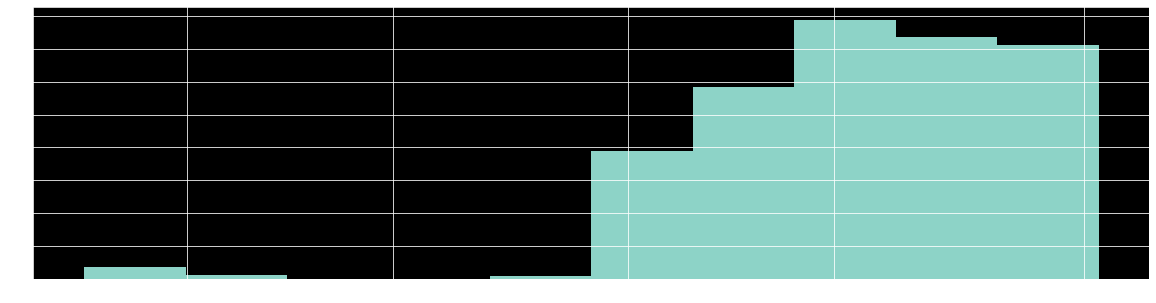

In [0]:
jobs.Posted.hist(figsize=(20,5))

In [0]:
oldest = min(jobs.Closing)
oldest

Timestamp('2020-06-01 00:00:00')

In [0]:
earliest = max(jobs.Closing)
earliest

Timestamp('2021-05-25 00:00:00')

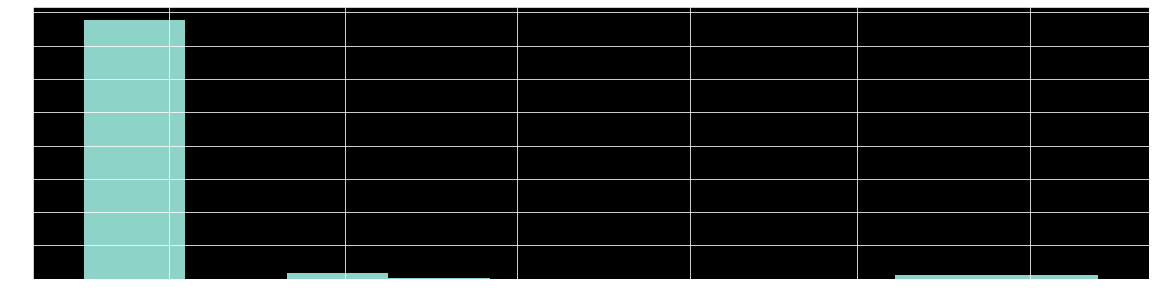

In [0]:
jobs.Closing.hist(figsize=(20,5))

In [0]:
jobs[jobs['Closing']>'2021-01-01 00:00:00']

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Posted,Closing,Skills
216,GOVERNMENT TECHNOLOGY...,DevOps Engineer (Ente...,"$5,000to$8,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-03-27,2021-03-26,Agile MethodologiesCC...
217,GOVERNMENT TECHNOLOGY...,DevOps Engineer (Ente...,"$5,000to$8,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-03-25,2021-03-24,Agile MethodologiesCC...
238,GOVERNMENT TECHNOLOGY...,#SGUnitedJobs Data Sc...,"$4,500to$5,500",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-25,2021-05-24,AlgorithmsAnalyticsAr...
241,GOVERNMENT TECHNOLOGY...,#SGUnitedJob Data Ana...,"$3,000to$4,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-25,2021-05-24,Agile MethodologiesAl...
242,GOVERNMENT TECHNOLOGY...,Business Analyst (Dat...,"$5,000to$7,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-25,2021-05-24,AnalysisBusiness Anal...
243,GOVERNMENT TECHNOLOGY...,#SGUnitedJobs Data En...,"$5,000to$6,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-25,2021-05-24,CablingCisco Technolo...
247,GOVERNMENT TECHNOLOGY...,#SGUnited Software En...,"$5,000to$9,000",Roles & Responsibilit...,Manager,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-22,2021-05-21,Agile MethodologiesCC...
394,GOVERNMENT TECHNOLOGY...,#SGUnitedJobs 3D Soft...,"$5,000to$10,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-05-20,2021-05-19,Agile MethodologiesCC...
576,GOVERNMENT TECHNOLOGY...,#SGUnitedJobs People ...,"$5,000to$8,000",Roles & Responsibilit...,NaN,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-04-02,2021-04-01,AnalysisBankingCommer...
577,GOVERNMENT TECHNOLOGY...,Data Scientist (Human...,"$5,000to$8,000",Roles & Responsibilit...,Middle Management,Full Time,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,2020-03-27,2021-03-26,Agile MethodologiesAl...


In [0]:
jobs.drop(['Posted','Closing'],axis=1,inplace=True)

### Salary

In [0]:
jobs.describe()

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
count,816,816,813,816,787,816,816,815,753,816
unique,329,665,286,787,11,17,103,235,77,745
top,NANYANG TECHNOLOGICAL...,Data Scientist,"$4,500to$9,000",Roles & Responsibilit...,Professional,Full Time,Information Technology,Islandwide,0 application,AnalysisBusiness Stra...
freq,101,17,46,2,295,309,216,139,103,11


In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Skills            816 non-null    object
dtypes: object(10)
memory usage: 70.1+ KB


Let's try to impute the salary of the missing numbers and find any weird looking numbers

In [0]:
jobs[jobs['Salary_Range'].isnull()]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
65,Singapore Polytechnic,Lecturer (Artificial ...,NaN,Roles & Responsibilit...,NaN,Contract,Information Technolog...,500 DOVER ROAD 139651,NaN,AnalysisBusiness Stra...
76,INFO-COMMUNICATIONS M...,#SGunitedJobs Manager...,NaN,Roles & Responsibilit...,NaN,Permanent,Information Technolog...,MAPLETREE BUSINESS CI...,NaN,Active DirectoryCloud...
838,DEFENCE SCIENCE AND T...,#SGUnited Senior Engi...,NaN,Roles & Responsibilit...,NaN,Permanent,"Engineering, Public /...",1 DEPOT ROAD 109679,NaN,Agile MethodologiesCC...


In [0]:
jobs[jobs['Title'].str.contains('Lecture',case=False)&jobs['Company'].str.contains('Poly',case=False)]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
65,Singapore Polytechnic,Lecturer (Artificial ...,NaN,Roles & Responsibilit...,NaN,Contract,Information Technolog...,500 DOVER ROAD 139651,NaN,AnalysisBusiness Stra...
842,Singapore Polytechnic,Lecturer - School of...,"$3,600to$8,000",Roles & Responsibilit...,NaN,Contract,"Engineering, Public /...",500 DOVER ROAD 139651,NaN,AnalysisBusiness Stra...


In [0]:
jobs.loc[65,'Salary_Range']='$3,600to$8,000'

In [0]:
jobs[jobs['Title'].str.contains('engineer',case=False)&jobs['Company'].str.contains('Defence Science',case=False)]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
39,DEFENCE SCIENCE AND T...,#SGUnitedJobs Senior ...,"$4,500to$6,000",Roles & Responsibilit...,Fresh/entry level,Permanent,Information Technolog...,1 DEPOT ROAD 109679,NaN,AnalysisAnalyticsBusi...
711,DEFENCE SCIENCE AND T...,#SGUnitedJobs Senior ...,"$3,600to$6,000",Roles & Responsibilit...,Fresh/entry level,Permanent,Information Technolog...,1 DEPOT ROAD 109679,NaN,CISSPComputer Forensi...
793,DEFENCE SCIENCE AND T...,#SGUnitedJobs Senior ...,"$3,000to$5,000",Roles & Responsibilit...,Manager,Permanent,Information Technolog...,1 DEPOT ROAD 109679,NaN,Agile MethodologiesCC...
818,DEFENCE SCIENCE AND T...,#SGunitedJobs Senior ...,"$5,000to$10,000",Roles & Responsibilit...,Fresh/entry level,Permanent,Information Technolog...,1 DEPOT ROAD 109679,NaN,Agile MethodologiesCC...
826,DEFENCE SCIENCE AND T...,#SGUnitedJobs Senior ...,"$5,000to$10,000",Roles & Responsibilit...,Fresh/entry level,Permanent,Information Technolog...,1 DEPOT ROAD 109679,NaN,.NETAgile Methodologi...
838,DEFENCE SCIENCE AND T...,#SGUnited Senior Engi...,NaN,Roles & Responsibilit...,NaN,Permanent,"Engineering, Public /...",1 DEPOT ROAD 109679,NaN,Agile MethodologiesCC...


In [0]:
jobs.loc[838,'Salary_Range']='$3,000to$6,000'

In [0]:
jobs.loc[76,'Salary_Range']='$2,800to$2,800'
# found the salary online of 2.8k per month
# https://www.google.com/search?q=%23SGunitedJobs+Manager+%E2%80%93+System+Architect+(TCESO)+(1%2B1+year+contract)&rlz=1C1CHBF_enSG871SG871&oq=%23SGunitedJobs+Manager+%E2%80%93+System+Architect+(TCESO)+(1%2B1+year+contract)&aqs=chrome..69i57.187j0j7&sourceid=chrome&ie=UTF-8&ibp=htl;jobs&sa=X&ved=2ahUKEwjG9cneoOXpAhVQU30KHelbBv0Qp4wCMAF6BAgNEAE#htidocid=iTeDglAnNZTRbIkaAAAAAA%3D%3D&sxsrf=ALeKk014bH0GFl5jaS5OX4H-pDFKHQB4WA:1591173912370

In [0]:
salary = jobs['Salary_Range'].str.split('to',1,expand=True)

In [0]:
salary.columns = ['Salary_Min', 'Salary_Max']

In [0]:
jobs = pd.concat([jobs, salary], axis = 'columns')

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      816 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Skills            816 non-null    object
 10  Salary_Min        816 non-null    object
 11  Salary_Max        816 non-null    object
dtypes: object(12)
memory usage: 122.9+ KB


In [0]:
jobs['Salary_Min'] = jobs['Salary_Min'].map(lambda x : x.replace('$',''))
jobs['Salary_Max'] = jobs['Salary_Max'].map(lambda x : x.replace('$',''))
jobs['Salary_Min'] = jobs['Salary_Min'].map(lambda x : x.replace(',',''))
jobs['Salary_Max'] = jobs['Salary_Max'].map(lambda x : x.replace(',',''))

In [0]:
jobs['Salary_Min'] = pd.to_numeric(jobs['Salary_Min'])
jobs['Salary_Max'] = pd.to_numeric(jobs['Salary_Max'])

In [0]:
jobs.drop('Salary_Range',axis=1,inplace=True)

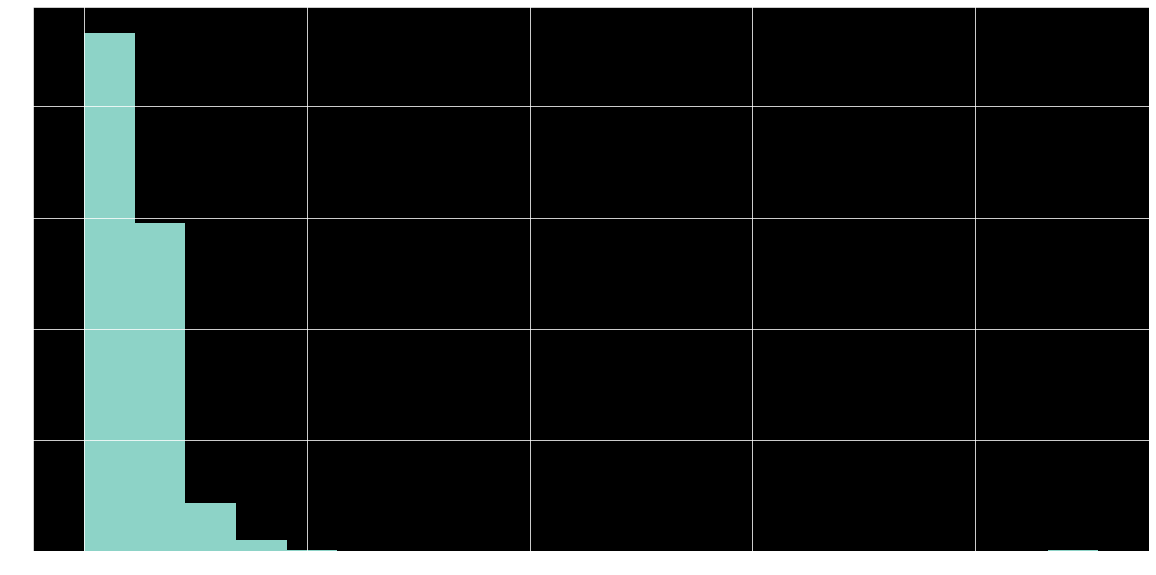

In [0]:
jobs.Salary_Min.hist(figsize=(20,10),bins=20)

In [0]:
jobs[jobs.Salary_Min>30000]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
598,CRITEO SINGAPORE PTE....,"Analytics Team Lead, ...",Roles & Responsibilit...,Manager,Full Time,Advertising / Media,"CAPITAGREEN, 138 MARK...",28 applications,Analytical AbilitiesA...,91040,152000


In [0]:
# likely annual salary listing
jobs.loc[598,'Salary_Min']=91040/12
jobs.loc[598,'Salary_Max']=152000/12

In [0]:
jobs[jobs.Salary_Min<20]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
208,BLUECHIP PLATFORMS AS...,AVP Business Planning...,Roles & Responsibilit...,Manager,Full Time,Accounting / Auditing...,Islandwide,10 applications,AnalysisBusiness Anal...,1.0,1.0
472,TRADINGPLC VENTURES P...,Proprietary Trader,Roles & Responsibilit...,Professional,Full Time,Banking and Finance,"FOO ANN BUILDING, 45 ...",53 applications,BloombergDerivativesE...,1.0,1.0


In [0]:
# trader and business planner seem irrelevant to data science so let's drop it
jobs.drop(472,inplace=True)
jobs.drop(208,inplace=True)

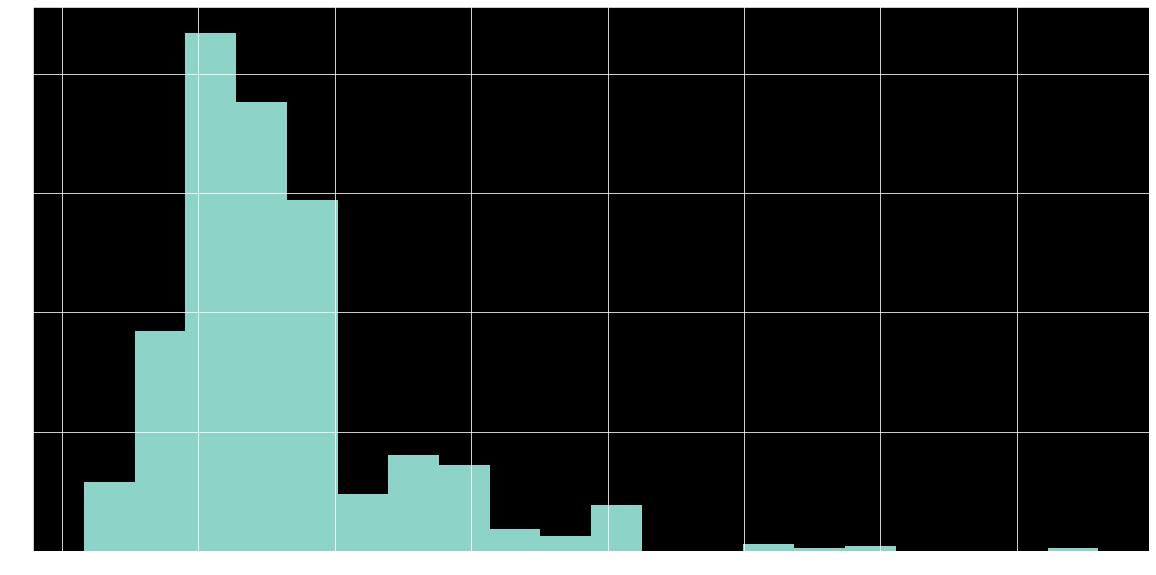

In [0]:
jobs.Salary_Max.hist(figsize=(20,10),bins=20)

In [0]:
jobs[jobs.Salary_Max<1000]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
751,LYTEHOUSE PTE. LTD.,Marketing Intern,Roles & Responsibilit...,Non-executive,Internship/Traineeship,Marketing / Public Re...,Islandwide,39 applications,CopywritingDigital Co...,500.0,800.0


In [0]:
# Marketing doesn't seem related to data science even though they are marketing ML
jobs.drop(751,inplace=True)

In [0]:
jobs[jobs.Salary_Max>20000]
# no annual remuneration listed

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
81,DBS BANK LTD.,"SVP, Solution Archite...",Roles & Responsibilit...,Senior Management,Full Time,Information Technology,Islandwide,14 applications,InnovationMicrosoft O...,15000.0,30000.0
183,CARGILL ASIA PACIFIC ...,Full Stack Solution A...,Roles & Responsibilit...,Professional,Permanent,Information Technology,"CAPITAGREEN, 138 MARK...",21 applications,Cloud ComputingConsul...,16000.0,20500.0
233,STANDARD CHARTERED BA...,Data Commercialization,Roles & Responsibilit...,Middle Management,Full Time,Banking and Finance,MARINA BAY FINANCIAL ...,5 applications,AdaptabilityBankingBu...,16000.0,25000.0
245,CAG REGIONAL SINGAPOR...,Engineer,Roles & Responsibilit...,Executive,Permanent,Information Technology,22A MOSQUE STREET 059502,6 applications,DataEngineeringLinuxM...,14000.0,28000.0
281,TIKTOK PTE. LTD.,Head of Product and P...,Roles & Responsibilit...,Senior Management,Full Time,Information Technology,"ASIA SQUARE TOWER 1, ...",18 applications,AnalysisEngineeringPo...,14000.0,21000.0
487,ENVISION DIGITAL INTE...,Business Development ...,Roles & Responsibilit...,Manager,Full Time,Sales / Retail,"KEPPEL BAY TOWER, 1 H...",22 applications,Account ManagementBus...,12000.0,25000.0
490,EXODUSPOINT CAPITAL M...,Portfolio Manager - Q...,Roles & Responsibilit...,Manager,Full Time,Banking and Finance,"ROBINSON 77, 77 ROBIN...",23 applications,AlgorithmsFinanceInve...,11833.0,29583.0
787,AMAZON WEB SERVICES S...,Principal IoT Solutio...,Roles & Responsibilit...,Professional,Full Time,Information Technology,"AIA TOWER, 1 ROBINSON...",14 applications,Business Intelligence...,20000.0,38000.0
815,SCIENTE INTERNATIONAL...,Head - Technology Inn...,Roles & Responsibilit...,Senior Management,Permanent,Information Technology,Islandwide,22 applications,Artificial Intelligen...,15000.0,25000.0


In [0]:
jobs.loc[245,'Salary_Min']=14000/12
jobs.loc[245,'Salary_Max']=28000/12

We create a new column for average salary

In [0]:
jobs['Salary_Average'] = (jobs['Salary_Min'] + jobs['Salary_Max'])/2
jobs['Salary_Average'] = jobs['Salary_Average'].round(1)

### Applications

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           813 non-null    object 
 1   Title             813 non-null    object 
 2   Responsibilities  813 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   813 non-null    object 
 5   Category          813 non-null    object 
 6   Address           812 non-null    object 
 7   Applications      750 non-null    object 
 8   Skills            813 non-null    object 
 9   Salary_Min        813 non-null    float64
 10  Salary_Max        813 non-null    float64
 11  Salary_Average    813 non-null    float64
dtypes: float64(3), object(9)
memory usage: 122.6+ KB


In [0]:
jobs['Applications'] = jobs['Applications'].str.replace(' applications','')
jobs['Applications'] = jobs['Applications'].str.replace(' application','')
jobs['Applications'] = pd.to_numeric(jobs['Applications'])

Text(0.5, 1.0, 'Frequency of Applications')

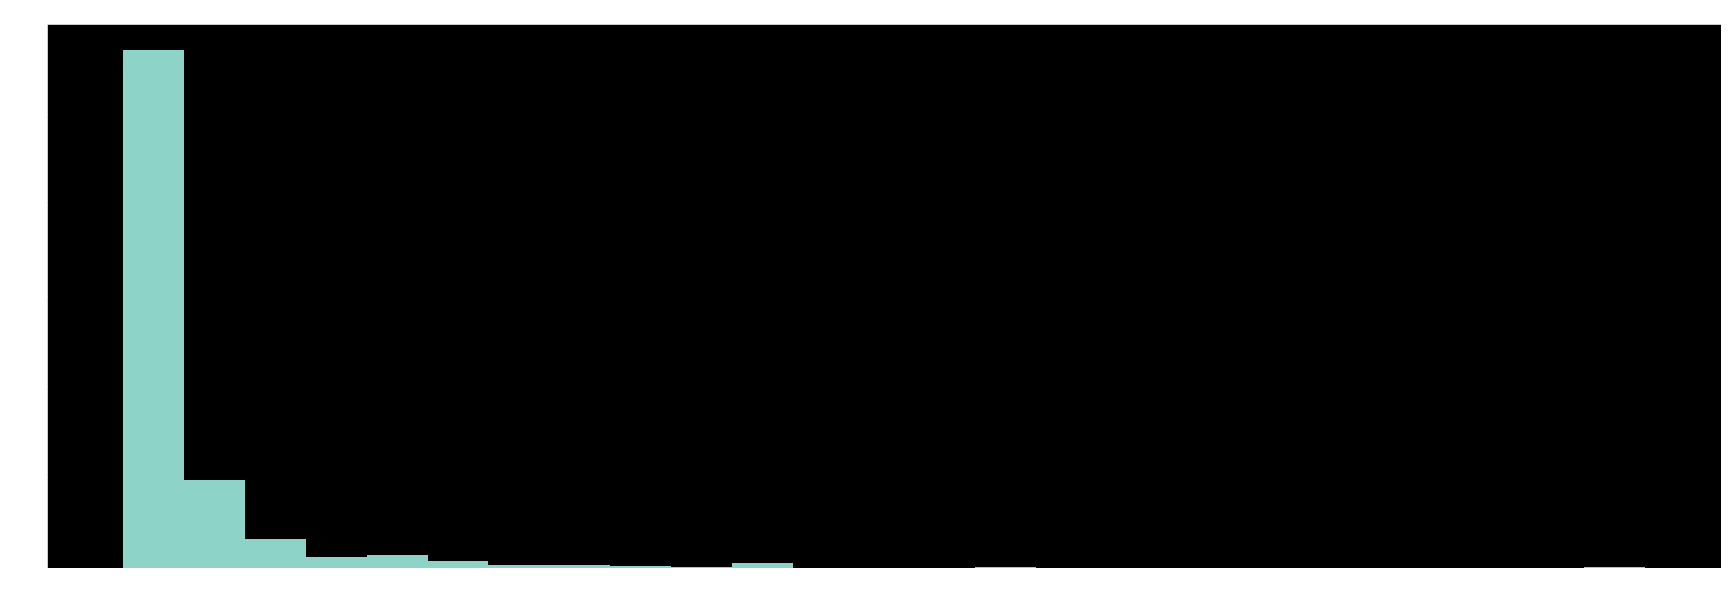

In [0]:
jobs['Applications'].plot(kind='hist', figsize=(30,10),bins=25)
plt.xlabel("Applications", fontsize=10)
plt.title("Frequency of Applications", fontsize=16)

In [0]:
jobs[jobs.Applications>75]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average
13,HANALYTICS PTE. LTD.,Machine Learning Asso...,Roles & Responsibilit...,Fresh/entry level,"Permanent, Full Time",Engineering,"NEW TECH PARK, 151 LO...",88.0,Artificial Intelligen...,3600.0,6000.0,4800.0
179,UBISOFT SINGAPORE PTE...,Data Scientist,Roles & Responsibilit...,Executive,Full Time,Information Technology,"SOLARIS, 1 FUSIONOPOL...",90.0,Big DataBiochemistryB...,5000.0,8500.0,6750.0
189,SALESFORCE.COM SINGAP...,Sales Strategy Future...,Roles & Responsibilit...,Fresh/entry level,Full Time,Sales / Retail,"SUNTEC TOWER FIVE, 5 ...",178.0,AdaptabilityAnalytica...,4200.0,4500.0,4350.0
196,SURBANA JURONG PRIVAT...,"Director, IT Applicat...",Roles & Responsibilit...,Middle Management,Permanent,Information Technology,"CONNECTION ONE, 168 J...",132.0,AutomationInformation...,10000.0,15000.0,12500.0
244,CANOPY PTE. LTD.,Graduate - Data Analy...,Roles & Responsibilit...,Fresh/entry level,Permanent,Others,"Manhattan House, 151 ...",138.0,DataData AnalysisFina...,3000.0,4000.0,3500.0
292,DELIVEROO SINGAPORE P...,Operations Director,Roles & Responsibilit...,Middle Management,Full Time,Others,Islandwide,103.0,DrivingEntrepreneursh...,11800.0,17800.0,14800.0
405,PHILLIP SECURITIES PT...,Trader,Roles & Responsibilit...,Junior Executive,"Permanent, Full Time",Banking and Finance,"RAFFLES CITY TOWER, 2...",118.0,CFDCommodityDerivativ...,2700.0,3800.0,3250.0
466,NINJA LOGISTICS PTE. ...,Regional Sales & Plan...,Roles & Responsibilit...,Professional,Full Time,Logistics / Supply Chain,"KEWALRAM HOUSE, 36 JA...",90.0,Account ManagementBus...,10000.0,11000.0,10500.0
478,DELIVEROO SINGAPORE P...,Operations Associate,Roles & Responsibilit...,Executive,Full Time,Others,Islandwide,78.0,Customer ServicePubli...,3000.0,4500.0,3750.0
500,DELIVEROO SINGAPORE P...,Operations Manager,Roles & Responsibilit...,Manager,Full Time,Others,Islandwide,130.0,Customer ServiceLeade...,3800.0,5700.0,4750.0


In [0]:
# dropping irrelevant jobs
jobs.drop([292,405,478,500,502,841,834,823],inplace=True)

Deliveroo, MyRepublic jobs all have alogorithm in the description and might be worth taking a look at to see if their postings are valid

In [0]:
jobs[jobs['Company'].str.contains('deliveroo',case=False)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average


In [0]:
jobs[jobs['Company'].str.contains('republic',case=False)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average


In [0]:
jobs.Applications.median()

4.0

In [0]:
# we will just assume that jobs that do not display any information have 4 applications which is the median anyway
jobs.Applications.fillna(4,inplace=True)

## Categorical Features

### Company

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           804 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.8+ KB


In [0]:
jobs.Company.unique()

array(['NANYANG TECHNOLOGICAL UNIVERSITY', 'AVNET ASIA PTE LTD',
       'ONEBERRY TECHNOLOGIES PTE. LTD.',
       'CAPITALAND BUSINESS SERVICES PTE. LTD.',
       'A*STAR RESEARCH ENTITIES', 'PALO IT SINGAPORE PTE. LTD.',
       'HANALYTICS PTE. LTD.', 'AMARIS.AI PTE. LTD.',
       'SINGTEL MOBILE SINGAPORE PTE. LTD.', 'STAFFONDEMAND PTE. LTD.',
       'ADECCO PERSONNEL PTE LTD', 'JABIL CIRCUIT (SINGAPORE) PTE. LTD.',
       'INSPIRE RECRUITMENT CONSULTING PTE. LTD.',
       'SCIENTE INTERNATIONAL PTE. LTD.',
       'HOESTAR PD TECHNOLOGY PTE. LTD.',
       'ST ENGINEERING LAND SYSTEMS LTD.',
       'TRANSFORMA ROBOTICS PTE. LTD.',
       'DEFENCE SCIENCE AND TECHNOLOGY AGENCY',
       'NATIONAL UNIVERSITY HEALTH SYSTEM PTE. LTD.',
       'EASYMILE PTE. LTD.', 'MEDIATEK SINGAPORE PTE. LTD.',
       'PANASONIC ASIA PACIFIC PTE. LTD.', 'GENIEBOOK PTE. LTD.',
       'SNAPHUNT PTE. LTD.', 'NATIONAL UNIVERSITY OF SINGAPORE',
       'TECHNOLOGY CENTRE FOR OFFSHORE AND MARINE, SINGAPORE LTD.'

We try to remove common words that might interfere with our data analysis later on

In [0]:
str_company =[' PTE. LTD.',' PTE. LIMITED',' PTE LTD', ' PRIVATE LIMITED', ' (PTE. LTD.)',
              ' LIMITED',' LTD.',' LTD',
              '(PTE)',
              ' INC.',
              ]

In [0]:
for i in str_company:
  jobs.Company = jobs.Company.str.replace(i,'')

In [0]:
jobs['Company']= jobs['Company'].str.title()

In [0]:
jobs.Company.unique()

array(['Nanyang Technological University', 'Avnet Asia',
       'Oneberry Technologies', 'Capitaland Business Services',
       'A*Star Research Entities', 'Palo It Singapore', 'Hanalytics',
       'Amaris.Ai', 'Singtel Mobile Singapore', 'Staffondemand',
       'Adecco Personnel', 'Jabil Circuit (Singapore)',
       'Inspire Recruitment Consulting', 'Sciente International',
       'Hoestar Pd Technology', 'St Engineering Land Systems',
       'Transforma Robotics', 'Defence Science And Technology Agency',
       'National University Health System', 'Easymile',
       'Mediatek Singapore', 'Panasonic Asia Pacific', 'Geniebook',
       'Snaphunt', 'National University Of Singapore',
       'Technology Centre For Offshore And Marine, Singapore',
       'Dso National Laboratories',
       'Inland Revenue Authority Of Singapore',
       'Infineon Technologies Asia Pacific',
       'Occutrack Medical Solutions', 'Infinium Robotics',
       'Singapore Polytechnic', 'Starhub',
       'Desay S

In [0]:
jobs.Company.value_counts().head(30)

Nanyang Technological University                        101
A*Star Research Entities                                 74
National University Of Singapore                         26
Government Technology Agency                             20
Jpmorgan Chase Bank, N.A.                                15
Dbs Bank                                                 11
Technology Centre For Offshore And Marine, Singapore     10
Institute Of Technical Education                         10
Ministry Of Home Affairs                                  9
Adecco Personnel                                          8
Defence Science And Technology Agency                     8
Staffondemand                                             8
Ernst & Young Advisory                                    7
Goldman Sachs Services (Singapore)                        7
Sciente International                                     6
Dso National Laboratories                                 6
Tiktok                                  

### Address
We try to make a new feature - Postal Code

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           804 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.8+ KB


In [0]:
jobs[jobs.Address.isnull()]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average
620,Smart Nation And Digi...,Manager / Senior Mana...,Roles & Responsibilit...,NaN,Permanent,Public / Civil Service,NaN,4.0,Business StrategyChan...,4000.0,7500.0,5750.0


In [0]:
jobs.Address.fillna('109 North Bridge Road, #06-01 Funan O2 Office, Singapore 179097',inplace=True)

In [0]:
jobs.Address.unique()

array(['NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG AVENUE 639798',
       'NEW TECH PARK, 151 LORONG CHUAN 556741', 'Islandwide',
       'Connexis, 1 Fusionopolis Way 138632',
       'GOLDEN AGRI PLAZA, 108 PASIR PANJANG ROAD 118535',
       'COMCENTRE, 31 EXETER ROAD 239732', '81 VICTORIA STREET 188065',
       'SHAW CENTRE, 1 SCOTTS ROAD 228208',
       '16 TAMPINES INDUSTRIAL CRESCENT 528604',
       'MACTECH BUILDING, 2 KALLANG PUDDING ROAD 349307',
       'UOB PLAZA, 80 RAFFLES PLACE 048624', '249 JALAN BOON LAY 619523',
       'Immunos, 8A Biomedical Grove 138648', '2 CLEANTECH LOOP 637144',
       '1 DEPOT ROAD 109679', '1E KENT RIDGE ROAD 119228',
       '173A TELOK AYER STREET 068622',
       'SOLARIS, 1 FUSIONOPOLIS WALK 138628',
       '202 BEDOK SOUTH AVENUE 1 469332',
       'LINK@AMK, 3 ANG MO KIO STREET 62 569139',
       'Cuppage Terrace, 29A Cuppage Road 229456',
       '21 LOWER KENT RIDGE ROAD 119077',
       'THE MENDEL, 12 SCIENCE PARK DRIVE 118225',
       'REVE

Lets extract the **postal code** using regex and use that instead of **Address**


In [0]:
import re

In [0]:
search = []    
for values in jobs['Address']:
    try:
      search.append(re.search(r'\d{1,6}', values).group())
    except:
      search.append('undisclosed')
jobs['Postal'] = search

In [0]:
jobs.Address[jobs.Postal=='undisclosed'].value_counts()
# these data were not going to give any direct address anyway

Islandwide    133
Name: Address, dtype: int64

###Seniority

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           805 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
 12  Postal            805 non-null    object 
dtypes: float64(4), object(9)
memory usage: 88.0+ KB


In [0]:
jobs.Seniority.value_counts(dropna=False)

Professional          294
Executive             135
Senior Executive       96
Fresh/entry level      76
Manager                57
Middle Management      41
Junior Executive       36
NaN                    29
Non-executive          21
Senior Management      19
Manager, Executive      1
Name: Seniority, dtype: int64

Attempting to group similar roles together

In [0]:
jobs[jobs.Seniority=='Manager, Executive']

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
746,Staffondemand,Marketing Technology ...,Roles & Responsibilit...,"Manager, Executive",Full Time,Marketing / Public Re...,77 ROBINSON ROAD 068896,22.0,Excellent Communicati...,5000.0,7000.0,6000.0,77


In [0]:
jobs.loc[746,'Seniority']='Manager'

Based on the salary ranges, the progression seems to be as follows:

In [0]:
avg_salary=jobs.groupby('Seniority').agg({'Salary_Average':'mean'})
avg_salary

,Salary_Average
Seniority,
Executive,5988.885185
Fresh/entry level,3867.098684
Junior Executive,4754.722222
Manager,8464.391379
Middle Management,7797.560976
Non-executive,5643.404762
Professional,6649.782313
Senior Executive,7154.286458
Senior Management,12615.973684


In [0]:
progression = ['Fresh/entry level','Junior Executive','Non-executive','Executive','Professional','Senior Executive','Middle Management','Manager','Senior Management']

I'm going to estimate missing values for seniority based on their pay range

In [0]:
jobs.Salary_Average[jobs.Seniority.isnull()]

60      9500.0
65      5800.0
76      2800.0
80     16000.0
89      6000.0
124     4500.0
132     4500.0
133     4500.0
205     4400.0
284     4250.0
510     5000.0
547     4750.0
548     5250.0
576     6500.0
608     4500.0
620     5750.0
633     4800.0
744     2100.0
770    10000.0
773     5000.0
774     4600.0
775     3750.0
776     2850.0
794     2750.0
795     5250.0
798     9500.0
804     4500.0
838     4500.0
842     5800.0
Name: Salary_Average, dtype: float64

In [0]:
jobs.loc[60,'Seniority']='Manager'
jobs.loc[65,'Seniority']='Executive'
jobs.loc[76,'Seniority']='Fresh/entry level'
jobs.loc[80,'Seniority']='Senior Management'
jobs.loc[89,'Seniority']='Executive'
jobs.loc[124,'Seniority']='Junior Executive'
jobs.loc[132,'Seniority']='Junior Executive'
jobs.loc[133,'Seniority']='Junior Executive'
jobs.loc[205,'Seniority']='Junior Executive'
jobs.loc[284,'Seniority']='Junior Executive'
jobs.loc[510,'Seniority']='Junior Executive'
jobs.loc[547,'Seniority']='Junior Executive'
jobs.loc[548,'Seniority']='Non-executive'
jobs.loc[576,'Seniority']='Professional'
jobs.loc[608,'Seniority']='Junior Executive'
jobs.loc[620,'Seniority']='Non-executive'
jobs.loc[633,'Seniority']='Junior Executive'
jobs.loc[744,'Seniority']='Fresh/entry level'
jobs.loc[770,'Seniority']='Senior Management'
jobs.loc[773,'Seniority']='Non-executive'
jobs.loc[774,'Seniority']='Junior Executive'
jobs.loc[775,'Seniority']='Fresh/entry level'
jobs.loc[776,'Seniority']='Fresh/entry level'
jobs.loc[794,'Seniority']='Fresh/entry level'
jobs.loc[795,'Seniority']='Non-executive'
jobs.loc[798,'Seniority']='Manager'
jobs.loc[804,'Seniority']='Junior Executive'
jobs.loc[838,'Seniority']='Junior Executive'
jobs.loc[842,'Seniority']='Executive'

In [0]:
jobs.Seniority.value_counts(dropna=False)

Professional         295
Executive            138
Senior Executive      96
Fresh/entry level     81
Manager               60
Junior Executive      48
Middle Management     41
Non-executive         25
Senior Management     21
Name: Seniority, dtype: int64

### Employment Type

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         805 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           805 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
 12  Postal            805 non-null    object 
dtypes: float64(4), object(9)
memory usage: 128.0+ KB


In [0]:
jobs.Employment_Type.value_counts()

Full Time                                                                                   301
Contract, Full Time                                                                         168
Permanent, Full Time                                                                        111
Permanent                                                                                    88
Contract                                                                                     79
Internship/Traineeship                                                                       24
Contract, Permanent, Full Time                                                               12
Temporary                                                                                     8
Full Time, Internship/Traineeship                                                             3
Temporary, Contract, Part Time, Permanent, Full Time, Flexi-work, Internship/Traineeship      2
Part Time, Full Time                    

Going to assume in the order of Permanent, Contract, Internship 

In [0]:
jobs.Employment_Type = jobs.Employment_Type.replace(
    {
    'Full Time':'Permanent',
    'Permanent, Full Time':'Permanent',
    'Permanent, Full Time ':'Permanent',
    'Contract, Permanent  ': 'Permanent',
    'Contract, Permanent, Full Time':'Permanent',
    'Permanent, Full Time, Flexi-work':'Permanent',
    'Temporary, Part Time, Freelance, Permanent, Full Time, Flexi-work, Internship/Traineeship':'Permanent',
    'Temporary, Contract, Part Time, Permanent, Full Time, Internship/Traineeship':'Permanent',
    'Contract, Permanent':'Permanent',
    'Part Time, Permanent':'Permanent',
    'Part Time, Full Time':'Permanent',
    'Temporary, Contract, Part Time, Permanent, Full Time, Flexi-work, Internship/Traineeship':'Permanent',
      
    'Contract, Full Time':'Contract',
    'Temporary':'Contract',
    'Temporary, Contract, Full Time':'Contract',
    'Part Time':'Contract',
    'Contract, Part Time':'Contract',
    'Temporary, Contract':'Contract',
    'Contract, Internship/Traineeship':'Contract',
    'Part Time, Full Time, Flexi-work':'Contract',
    'Temporary, Full Time':'Contract',
     
    'Full Time, Internship/Traineeship':'Internship',
    'Internship/Traineeship':'Internship'
    }
)
jobs.Employment_Type.value_counts()

Permanent     519
Contract      259
Internship     27
Name: Employment_Type, dtype: int64

### Title

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         805 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           805 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
 12  Postal            805 non-null    object 
dtypes: float64(4), object(9)
memory usage: 128.0+ KB


In [0]:
jobs.Title.unique()

array(['Research Engineer (Computer Science / Computer Engineering)',
       'Design Engineer',
       'Research Assistant (Computer Science  /  Engineering)',
       'Research Assistant (Computer Science / Engineering)',
       'Research Associate (Natural Language Processing)',
       'Engineer (Proof of Concepts) #SGUNITEDJOBS',
       'Assistant Vice President, Data & Insights',
       '#SGUnitedJobs Scientist (Neuromorphic Programme), Robotics & Autonomous Systems, I2R',
       '#SGUnitedJobs Senior /  Research Engineer (Visual Intelligence), I2R',
       'Data Scientist',
       '#SGUnitedJobs Scientist (Neuromorphic Computing / AI), Robotics & Autonomous Systems, I2R',
       '#SGUnitedJobs Scientist (Visual Intelligence), I2R',
       'Machine Learning Associate / Engineer',
       'Data Applications Engineer / Manager',
       'Research Fellow (contract ending 31 March 2021), LARC',
       'Research Associate (Computer Science & Engineering) (R00002124)',
       'Research Fell

Let's replace some common words that might interfere with the analysis later

In [0]:
replacements=['#SGUnitedJobs','SGUnitedJobs','SGUnited Jobs','#SGUnited Jobs',
              '#SGUnited Traineeships','#SGUnitedTraineeships','SGUnited Traineeships','SGUnitedTraineeships',
              'SgUnitedJobs']
for i in replacements:
  jobs['Title'] = jobs['Title'].str.replace(i,'')
# remove SGUnited!

In [0]:
jobs['Title'] = jobs['Title'].str.replace('[\d]','')
# remove digits

In [0]:
jobs['Title'] = jobs['Title'].str.title()
# remove caps

In [0]:
for i in range(len(jobs.Title)):
  jobs.iloc[i,1]=re.sub(r"\s\s+"," ",jobs.iloc[i,1])
  jobs.iloc[i,1]=re.sub(r"^\s","",jobs.iloc[i,1])
  jobs.iloc[i,1]=re.sub(r"\s$","",jobs.iloc[i,1])
# remove spacing

Data Science has distinct roles, let's try to separate them into those e.g Analyst vs Engineer vs Devops

In [0]:
jobs['Roles'] = jobs['Title']

In [0]:
# we replace more specific roles first then slowly get broader
jobs.loc[jobs['Roles'].str.contains('lecture',case=False), 'Roles'] = 'Lecturer'
jobs.loc[jobs['Roles'].str.contains('research',case=False), 'Roles'] = 'Researcher'
jobs.loc[jobs['Roles'].str.contains('devops',case=False), 'Roles'] = 'DevOps'
jobs.loc[jobs['Roles'].str.contains('consultant',case=False), 'Roles'] = 'Consultant'
jobs.loc[jobs['Roles'].str.contains('UI',case=False)|jobs['Roles'].str.contains('UX',case=False), 'Roles'] = 'UI UX'
jobs.loc[jobs['Roles'].str.contains('rpa',case=False), 'Roles'] = 'RPA Dvloper'
jobs.loc[jobs['Roles'].str.contains('business development',case=False), 'Roles'] = 'Business Dvlopement'
jobs.loc[jobs['Roles'].str.contains('business intelligence',case=False)|jobs['Roles'].str.contains(' BI ',case=False), 'Roles'] = 'Business Intelligence'
jobs.loc[jobs['Roles'].str.contains('business',case=False)&jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Business Anlyst'
jobs.loc[jobs['Roles'].str.contains('product',case=False)&jobs['Roles'].str.contains('manager',case=False), 'Roles'] = 'Product Manager'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Data Eng'
jobs.loc[jobs['Roles'].str.contains('machine learning',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Machine Learning Eng'
jobs.loc[jobs['Roles'].str.contains('software',case=False)&jobs['Roles'].str.contains('developer',case=False), 'Roles'] = 'Software Dvloper'
jobs.loc[jobs['Roles'].str.contains('software',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Software Eng'
jobs.loc[jobs['Roles'].str.contains(' AI ',case=False)|jobs['Roles'].str.contains('natural lang',case=False), 'Roles'] = 'AI'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('analytic',case=False), 'Roles'] = 'Data Anlyst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Data Anlyst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('science',case=False), 'Roles'] = 'Data Scientst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('scientist',case=False), 'Roles'] = 'Data Scientst'
jobs.loc[jobs['Roles'].str.contains('project',case=False), 'Roles'] = 'Project Management'
jobs.loc[jobs['Roles'].str.contains('analytic',case=False), 'Roles'] = 'Analyst'
jobs.loc[jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Analyst'
jobs.loc[jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Engineer'
jobs.loc[jobs['Roles'].str.contains('program',case=False), 'Roles'] = 'Programmer'
jobs.loc[jobs['Roles'].str.contains('developer',case=False), 'Roles'] = 'Developer'
jobs.loc[jobs['Roles'].str.contains('scientist',case=False), 'Roles'] = 'Researcher'
jobs.loc[jobs['Roles'].str.contains('architect',case=False), 'Roles'] = 'Engineer'
jobs.loc[jobs['Roles'].str.contains('statis',case=False), 'Roles'] = 'Statistician'
jobs.loc[jobs['Roles'].str.contains('tech',case=False)|jobs['Roles'].str.contains('lead',case=False), 'Roles'] = 'TechLd'
jobs.loc[jobs['Roles'].str.contains('market',case=False)|jobs['Roles'].str.contains('seo',case=False), 'Roles'] = 'SEO'
jobs.loc[jobs['Roles'].str.contains('chief',case=False)|jobs['Roles'].str.contains('director',case=False), 'Roles'] = 'Head'
jobs.loc[jobs['Roles'].str.contains('president',case=False)|jobs['Roles'].str.contains('lead',case=False), 'Roles'] = 'Head'
jobs.loc[jobs['Roles'].str.contains('head',case=False)|jobs['Roles'].str.contains('head',case=False), 'Roles'] = 'Head'

In [0]:
jobs.Roles.value_counts(1)

Researcher                                                        0.248447
Engineer                                                          0.103106
Software Eng                                                      0.086957
Data Scientst                                                     0.072050
Developer                                                         0.069565
                                                                    ...   
Trader                                                            0.001242
Database Administrator (Dba)                                      0.001242
# Senior Bioinformatician (Computational Phenomics Lab, Eddc)     0.001242
Specialist (Automated Experiments), Electronic Materials, Imre    0.001242
Data Commercialization                                            0.001242
Name: Roles, Length: 67, dtype: float64

In [0]:
jobs.Roles.value_counts().index.to_list()

['Researcher',
 'Engineer',
 'Software Eng',
 'Data Scientst',
 'Developer',
 'Data Anlyst',
 'Data Eng',
 'Analyst',
 'Project Management',
 'Machine Learning Eng',
 'Software Dvloper',
 'Consultant',
 'TechLd',
 'Head',
 'Business Anlyst',
 'UI UX',
 'Lecturer',
 'Business Intelligence',
 'DevOps',
 'Programmer',
 'AI',
 'RPA Dvloper',
 'Product Manager',
 'Business Dvlopement',
 'SEO',
 'Data Advocate (Temp) - Ref: Ie /',
 'Statistician',
 'Trainee (Met Applications)',
 'Observability Sme (Elk)',
 'Product Development Executive',
 'Kafka And Nifi Admin ( Months Contract)',
 'Application Manager',
 'Manager, Operations Digitalisation',
 'Product Owner',
 'It Access Management Support - Up To $K',
 'Online Shop Manager / Executive',
 'Regional Sales & Planning Manager',
 'Product Controller (Contract)',
 'Global Issue Owner',
 'Principal Trainer',
 'Business Strategy And Operations Manager',
 'Exchange Ops Trainee',
 'Accounts And Admin Assistant',
 'Accounting Assistant',
 'Sales Str

In [0]:
titles_todrop = ['Associate Director Controls Regulatory Attestations And Testing',
 'Trainee Met Applications',
 'Observability Sme Elk',
 'Principal Trainer',
 'Sales Director',
 'Exchange Ops Trainee',
 'Forensics Integrity Services Investigation And Compliance Manager',
 'Senior Manager Advanced Analytics Marketing And Sales Outperformance',
 'Accounts And Admin Assistant',
 'Finance Executive',
 'Global Issue Owner',
 'Business Strategy And Operations Manager',
 'Digital Marketing Executive Manager Seo Ppc',
 'Product Controller Contract',
 'Senior Human Resource Officer',
 'Gis Gis Fellow',
 'Trader',
 'Head Of Strategic Partnerships',
 'Account Manager',
 'Database Administrator Dba',
 'Senior Sales Manager',
 'Product Development Executive',
 'Financial Strategy Business Partner',
 'It Access Management Support Up To K',
 'C Team Leader',
 'Sales Strategy Futureforce Associate',
 'Regional Sales Planning Manager',
 'Senior Bioinformatician Computational Phenomics Lab Eddc',
 'Observability Sme',
 'Postdoctoral Associate Smart Camp Nanopore Sensors For Fingerprinting Microbial Contaminants Ref Irg_Camp__',
 'Associate Director Of Sales',
 'Online Shop Manager Executive',
 'Product Owner',
 'Kafka And Nifi Admin Months Contract',
 'Manager Commercial Evaluation And Analytics',
 'Finance Specialist',
 'Regional Salesforce Administrator',
 'Sgunited Trainee Rsu Energy Technology Data',
 'Analytics Team Lead Large Customers South Apac',
 'Manager Senior Manager Standards Cybersecurity Quality Assurance Policy And Governance',
 'Accounting Assistant',
 'Regional Financial Planning And Analysis Manager']

Remaining job titles that do not seem related to banking can be dropped

In [0]:
jobs = jobs[~jobs['Title'].isin(titles_todrop)]
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           784 non-null    object 
 1   Title             784 non-null    object 
 2   Responsibilities  784 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   784 non-null    object 
 5   Category          784 non-null    object 
 6   Address           784 non-null    object 
 7   Applications      784 non-null    float64
 8   Skills            784 non-null    object 
 9   Salary_Min        784 non-null    float64
 10  Salary_Max        784 non-null    float64
 11  Salary_Average    784 non-null    float64
 12  Postal            784 non-null    object 
 13  Roles             784 non-null    object 
dtypes: float64(4), object(10)
memory usage: 91.9+ KB


### Category

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           784 non-null    object 
 1   Title             784 non-null    object 
 2   Responsibilities  784 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   784 non-null    object 
 5   Category          784 non-null    object 
 6   Address           784 non-null    object 
 7   Applications      784 non-null    float64
 8   Skills            784 non-null    object 
 9   Salary_Min        784 non-null    float64
 10  Salary_Max        784 non-null    float64
 11  Salary_Average    784 non-null    float64
 12  Postal            784 non-null    object 
 13  Roles             784 non-null    object 
dtypes: float64(4), object(10)
memory usage: 91.9+ KB


In [0]:
jobs['Category']=jobs['Category'].str.replace('and','')

In [0]:
for i in range(len(jobs.Category)):
  col = 5
  jobs.iloc[i,col]=re.sub(r"\s\s+"," ",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"^\s","",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"\s$","",jobs.iloc[i,col])
# remove spacing

In [0]:
jobs.Category.value_counts()

Information Technology                                                          215
Sciences / Laboratory / R&D                                                     174
Engineering                                                                      71
Banking Finance                                                                  41
Information Technology, Public / Civil Service                                   39
                                                                               ... 
Accounting / Auditing / Taxation, Public / Civil Service                          1
Building Construction, Information Technology                                     1
General Management                                                                1
Engineering, Healthcare / Pharmaceutical, Medical / Therapy Services, Others      1
Building Construction, Information Technology, Others                             1
Name: Category, Length: 97, dtype: int64

### Skills

In [0]:
jobs.Skills.value_counts()

Agile MethodologiesCC#C++CSSEclipseGitHTMLJavaJavaScriptjQueryLinuxMySQLPHPPythonSoftware DevelopmentSoftware EngineeringSQLWeb ServicesXML                                                                                                        11
AnalysisBusiness StrategyCurriculum DesignData AnalysisE-LearningEnglishHigher EducationLeadershipLecturingManagementMatlabProgrammingProject ManagementPublic SpeakingQualitative ResearchResearchScienceStatisticsTeachingUniversity Teaching    11
Computer EngineeringComputer ScienceInnovationResearchconduct researchCatering workAICutting-edgeDevelop solutionsDeep learning                                                                                                                     9
AlgorithmsC++Computer ScienceData AnalysisLaTeXMachine LearningMatlabProgrammingResearchTeaching                                                                                                                                                    3
Computer Enginee

In [0]:
search = []    
for values in jobs['Skills']:
    try:
      search.append(re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', values)).split())
    except:
      search.append('')
jobs['Skills'] = search

In [0]:
jobs['Skills']

0      [Analytics, Classific...
1      [Artificial, Intellig...
2      [Collaboration, Commu...
3      [Collaboration, Commu...
4      [Analytics, Computer,...
                 ...           
843    [Internet, of, Things...
844    [Artificial, Intellig...
845    [Big, Data, Data, Dat...
846    [Acquisitions, Analyt...
847    [Product, Development...
Name: Skills, Length: 784, dtype: object

In [0]:
jobs['Skills']=jobs['Skills'].apply(', '.join)

In [0]:
from collections import Counter
Counter(" ".join(jobs["Skills"]).split()).most_common(20)

[('Data,', 666),
 ('Development,', 365),
 ('Management,', 347),
 ('Java,', 323),
 ('Analysis,', 315),
 ('Software,', 307),
 ('Research,', 239),
 ('Learning,', 229),
 ('Engineering,', 225),
 ('Business,', 222),
 ('Machine,', 220),
 ('Python,', 210),
 ('Computer,', 203),
 ('Science,', 188),
 ('Microsoft,', 172),
 ('SQL,', 157),
 ('Information,', 132),
 ('Analytics,', 121),
 ('Intelligence,', 121),
 ('Technology,', 116)]

In [0]:
jobs.Skills

0      Analytics, Classifica...
1      Artificial, Intellige...
2      Collaboration, Commun...
3      Collaboration, Commun...
4      Analytics, Computer, ...
                 ...           
843    Internet, of, Things,...
844    Artificial, Intellige...
845    Big, Data, Data, Data...
846    Acquisitions, Analyti...
847    Product, Development,...
Name: Skills, Length: 784, dtype: object

In [0]:
len(jobs.Skills.unique())

713

### Responsibilities

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           784 non-null    object 
 1   Title             784 non-null    object 
 2   Responsibilities  784 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   784 non-null    object 
 5   Category          784 non-null    object 
 6   Address           784 non-null    object 
 7   Applications      784 non-null    float64
 8   Skills            784 non-null    object 
 9   Salary_Min        784 non-null    float64
 10  Salary_Max        784 non-null    float64
 11  Salary_Average    784 non-null    float64
 12  Postal            784 non-null    object 
 13  Roles             784 non-null    object 
dtypes: float64(4), object(10)
memory usage: 111.9+ KB


In [0]:
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Roles  Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Requirements', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Qualifications', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Job Description', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Job Description and Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Key Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Main responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Experience', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Candidates', '',case=False)
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Shortlisted', '',case=False)
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Notified', '',case=False)
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Regret', '',case=False)
# Delete common words

In [0]:
for i in range(len(jobs.Responsibilities)):
  col = 2
  jobs.iloc[i,col]=re.sub(r"\s\s+"," ",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"^\s","",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"\s$","",jobs.iloc[i,col])
# remove spacing

In [291]:
Counter(" ".join(jobs["Responsibilities"]).split()).most_common(20)
# checking no other common words

[('and', 14261),
 ('to', 6606),
 ('in', 5567),
 ('of', 5408),
 ('the', 5403),
 ('with', 3542),
 ('a', 2907),
 ('for', 2666),
 ('data', 2320),
 ('or', 1842),
 ('&', 1519),
 ('on', 1476),
 ('as', 1396),
 ('will', 1378),
 ('experience', 1360),
 ('is', 1334),
 ('be', 1218),
 ('·', 1168),
 ('team', 986),
 ('our', 954)]

In [0]:
jobs.Responsibilities

0      Alibaba NTU Singapore Joint Research Institute invites applications for the position of Research Engineer\nKey Carry out research in the field of automatic diabetic retinopathy classification\nImplement machine learning algorithms and analytics techniques to perform automatic diabetic retinopathy classification\nWrite papers and reports based on the requirements of the projects\nPresent research outputs at academic conferences seminars and workshops Job Masters degree in Computer Science or Computer Engineering\nGood background in deep learning transfer learning and reinforcement learning with good knowledge of common deep leaning models such as ANN CNN and computationally efficient CNN\nGood knowledge and understanding about the pathology and diagnosis of diabetes and prior research experiences in automatic diabetic retinopathy classification\nGood communication and writing in English We regret that only shortlisted candidates will be notified                                   

## Saving the clean file

In [292]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           784 non-null    object 
 1   Title             784 non-null    object 
 2   Responsibilities  784 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   784 non-null    object 
 5   Category          784 non-null    object 
 6   Address           784 non-null    object 
 7   Applications      784 non-null    float64
 8   Skills            784 non-null    object 
 9   Salary_Min        784 non-null    float64
 10  Salary_Max        784 non-null    float64
 11  Salary_Average    784 non-null    float64
 12  Postal            784 non-null    object 
 13  Roles             784 non-null    object 
dtypes: float64(4), object(10)
memory usage: 111.9+ KB


In [0]:
jobs.to_csv('AIjobsclean.csv') 
files.download('AIjobsclean.csv')

In [0]:
jobs = pd.read_csv('AIjobsclean.csv',index_col=0)

# 4. Visualizing Overall Market

In [272]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import re
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf

%config InlineBackend.figure_format ='retina'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [0]:
jobs.Roles.value_counts().head(10)

Researcher              200
Engineer                83 
Software Eng            70 
Data Scientst           58 
Developer               56 
Data Anlyst             40 
Data Eng                28 
Analyst                 27 
Project Management      21 
Machine Learning Eng    16 
Name: Roles, dtype: int64

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 88.6+ KB


In [0]:
jobs.describe()

,Applications,Salary_Min,Salary_Max,Salary_Average
count,756.000000,756.000000,756.000000,756.000000
mean,9.037037,5018.452381,8079.310847,6548.881614
std,15.200948,2372.407943,4137.810823,3181.184350
min,0.000000,1400.000000,1500.000000,1450.000000
25%,2.000000,3500.000000,5500.000000,4500.000000
50%,4.000000,4500.000000,7000.000000,5850.000000
75%,10.000000,6000.000000,9000.000000,7500.000000
max,139.000000,20000.000000,38000.000000,29000.000000


In [0]:
jobs['Salary_Average'].value_counts().head(10)

6750.0    54
5000.0    43
6000.0    40
4500.0    32
7500.0    31
5500.0    28
3750.0    25
6500.0    23
4250.0    22
4750.0    19
Name: Salary_Average, dtype: int64

## Salary Distribution

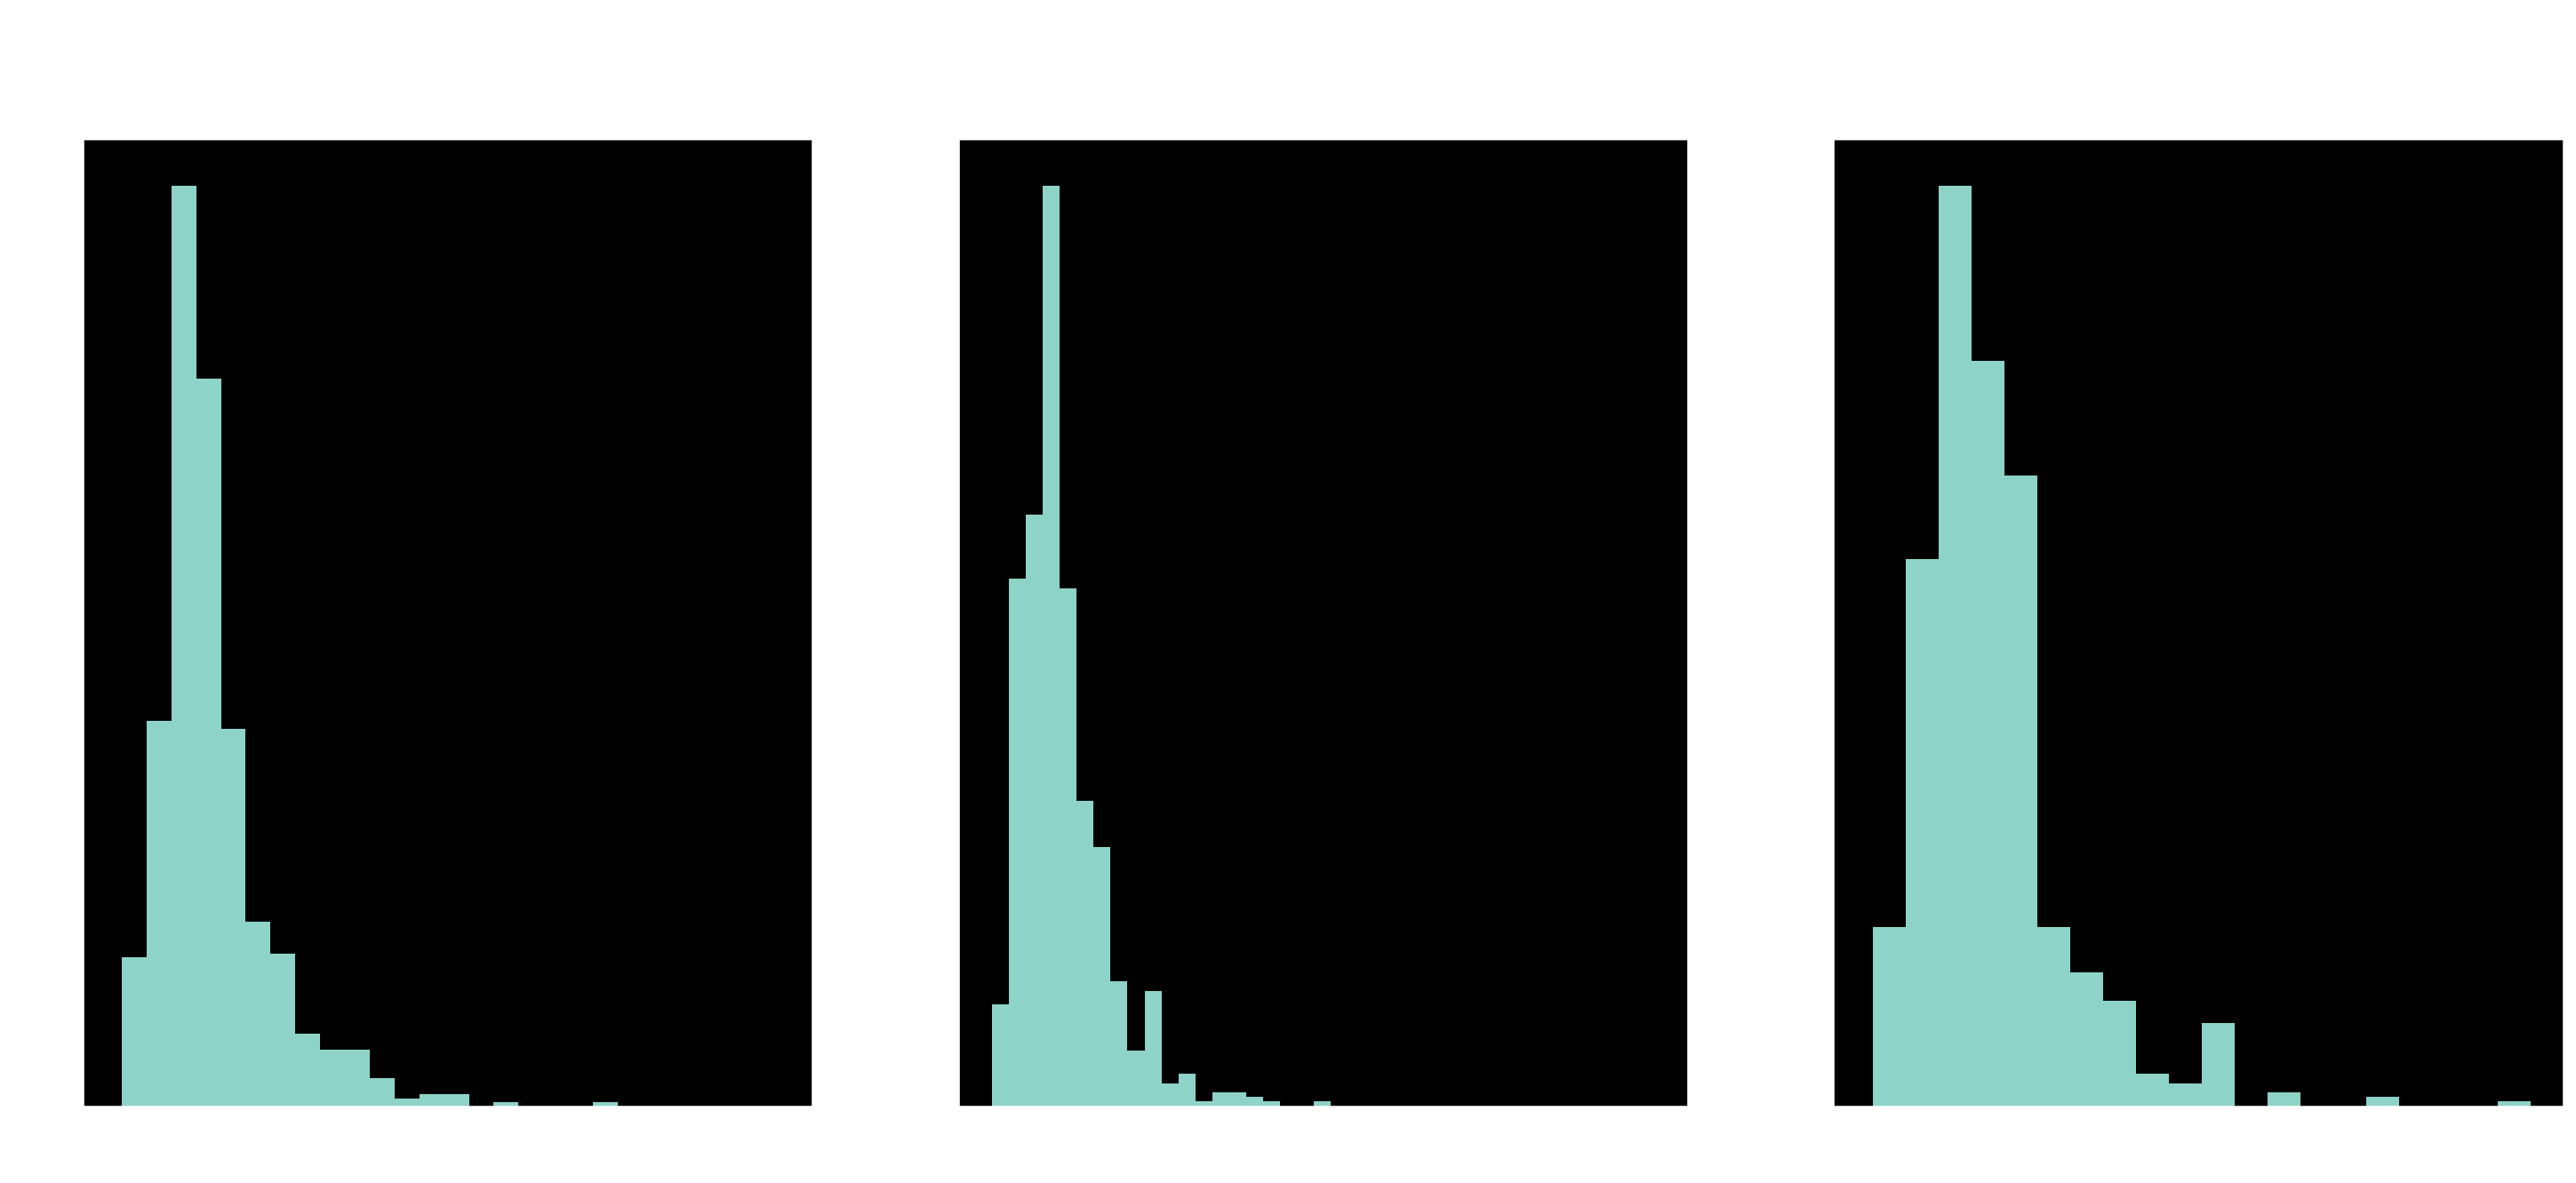

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
jobs["Salary_Average"].plot(kind="hist", ax=axs[0],bins=20)
jobs["Salary_Min"].plot(kind="hist", ax=axs[1],bins=20)
jobs["Salary_Max"].plot(kind="hist", ax=axs[2],bins=20)
fig.suptitle(
    "(L-R) Distribution of Average, Minimum and Maximum Salaries offered in job postings",
    fontsize=20,
)
plt.xlabel(
    "Monthly pay in Sing Dollars", fontsize=16, horizontalalignment="center", x=-0.8
)
plt.show()

## Salary vis-a-vis Other Features

Some interesting roles with above average salary noted: DevOps,Business Intelligence, Machine Learning Engineer, Data Scientist

In [0]:
x = jobs.Roles.value_counts().head(20).index
data = jobs[jobs['Roles'].isin(x)]

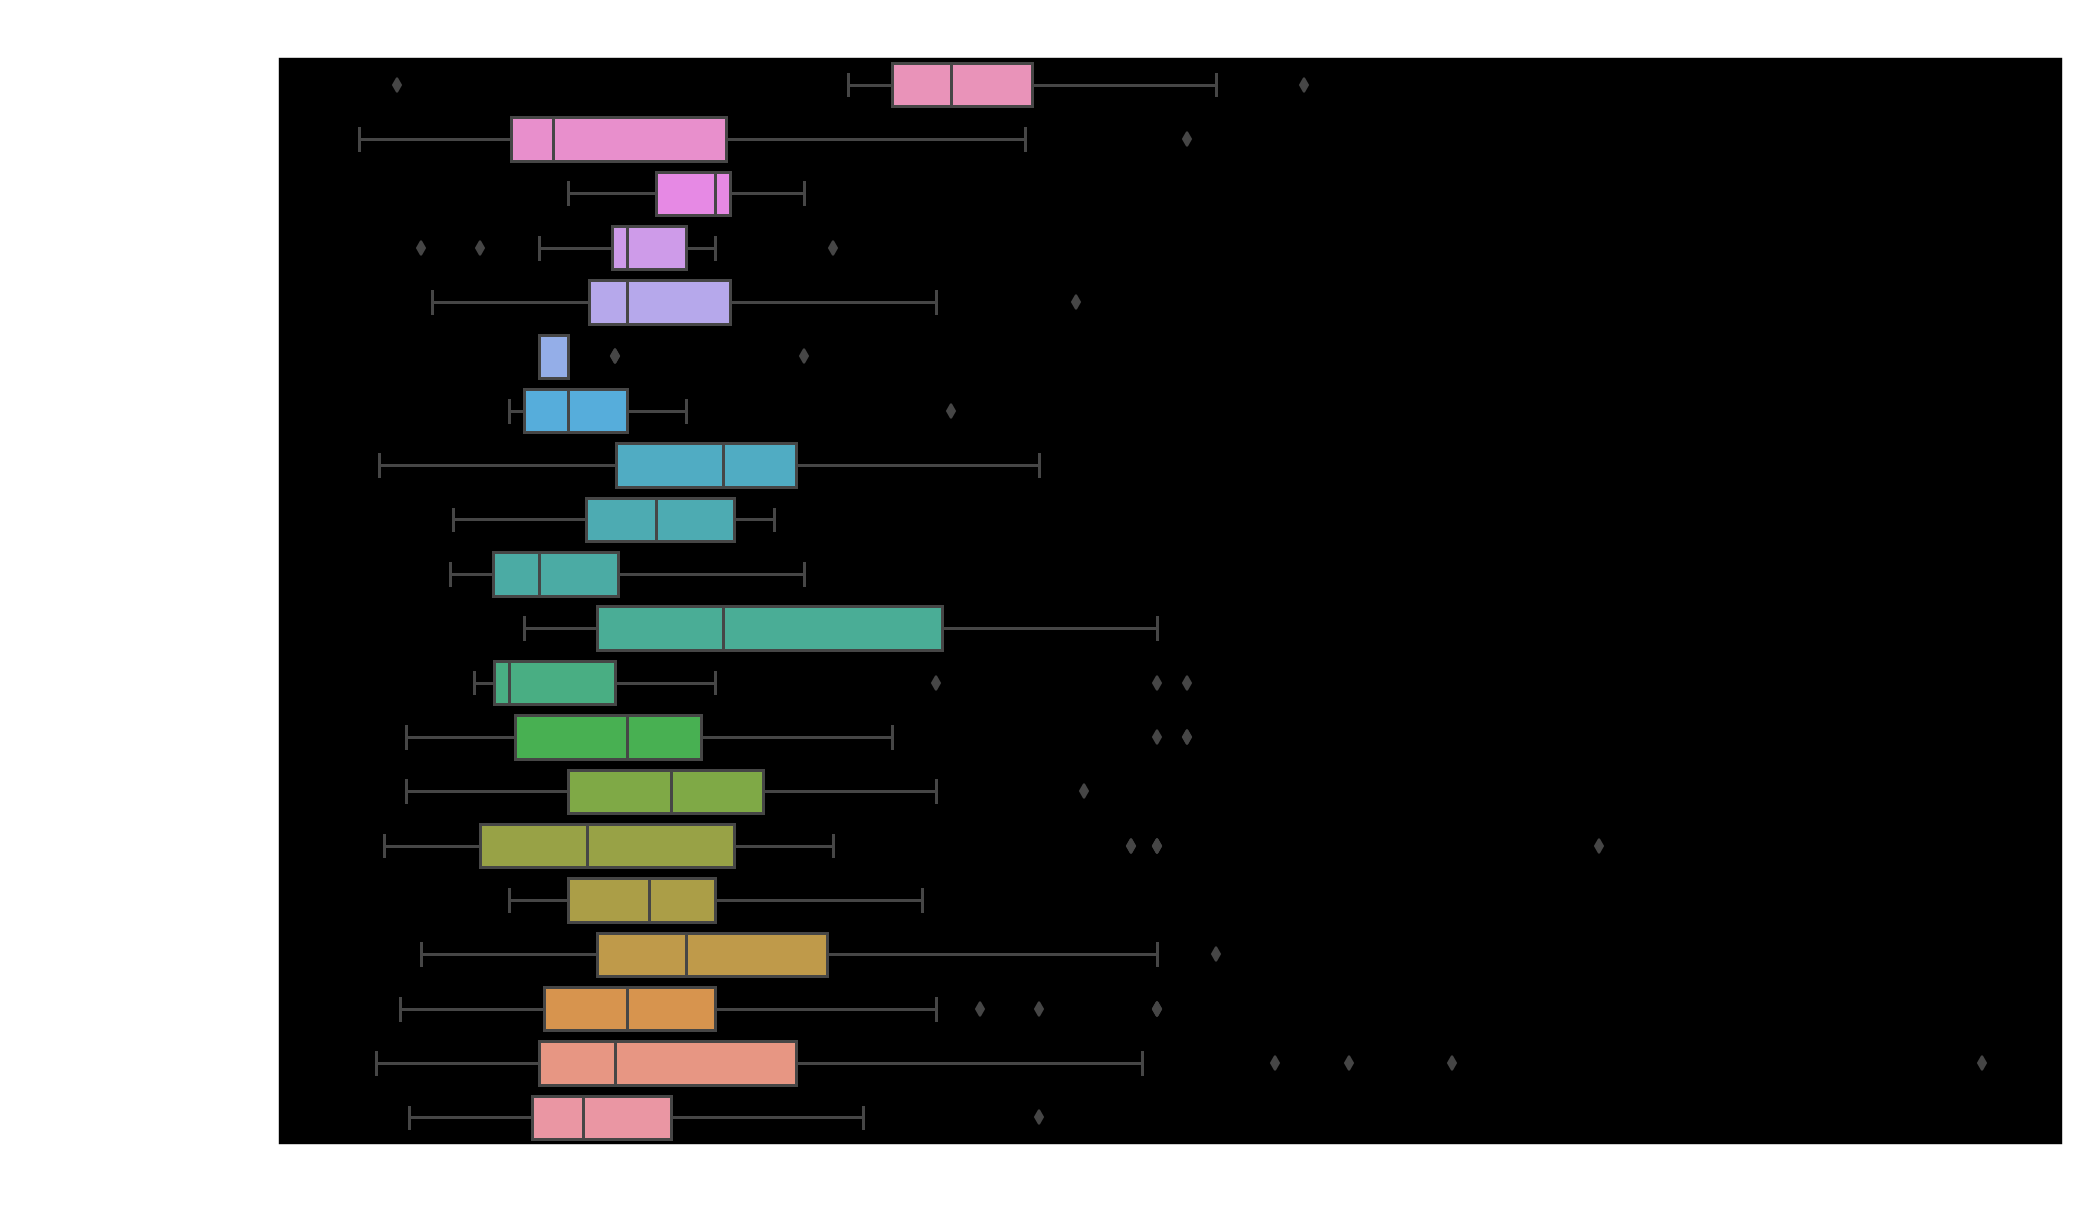

In [0]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x="Salary_Average", y="Roles", data=data, order=x)

plt.title('Distribution of average salary by job roles', fontsize=20)
plt.ylim(-0.5, 19.5)
plt.show()

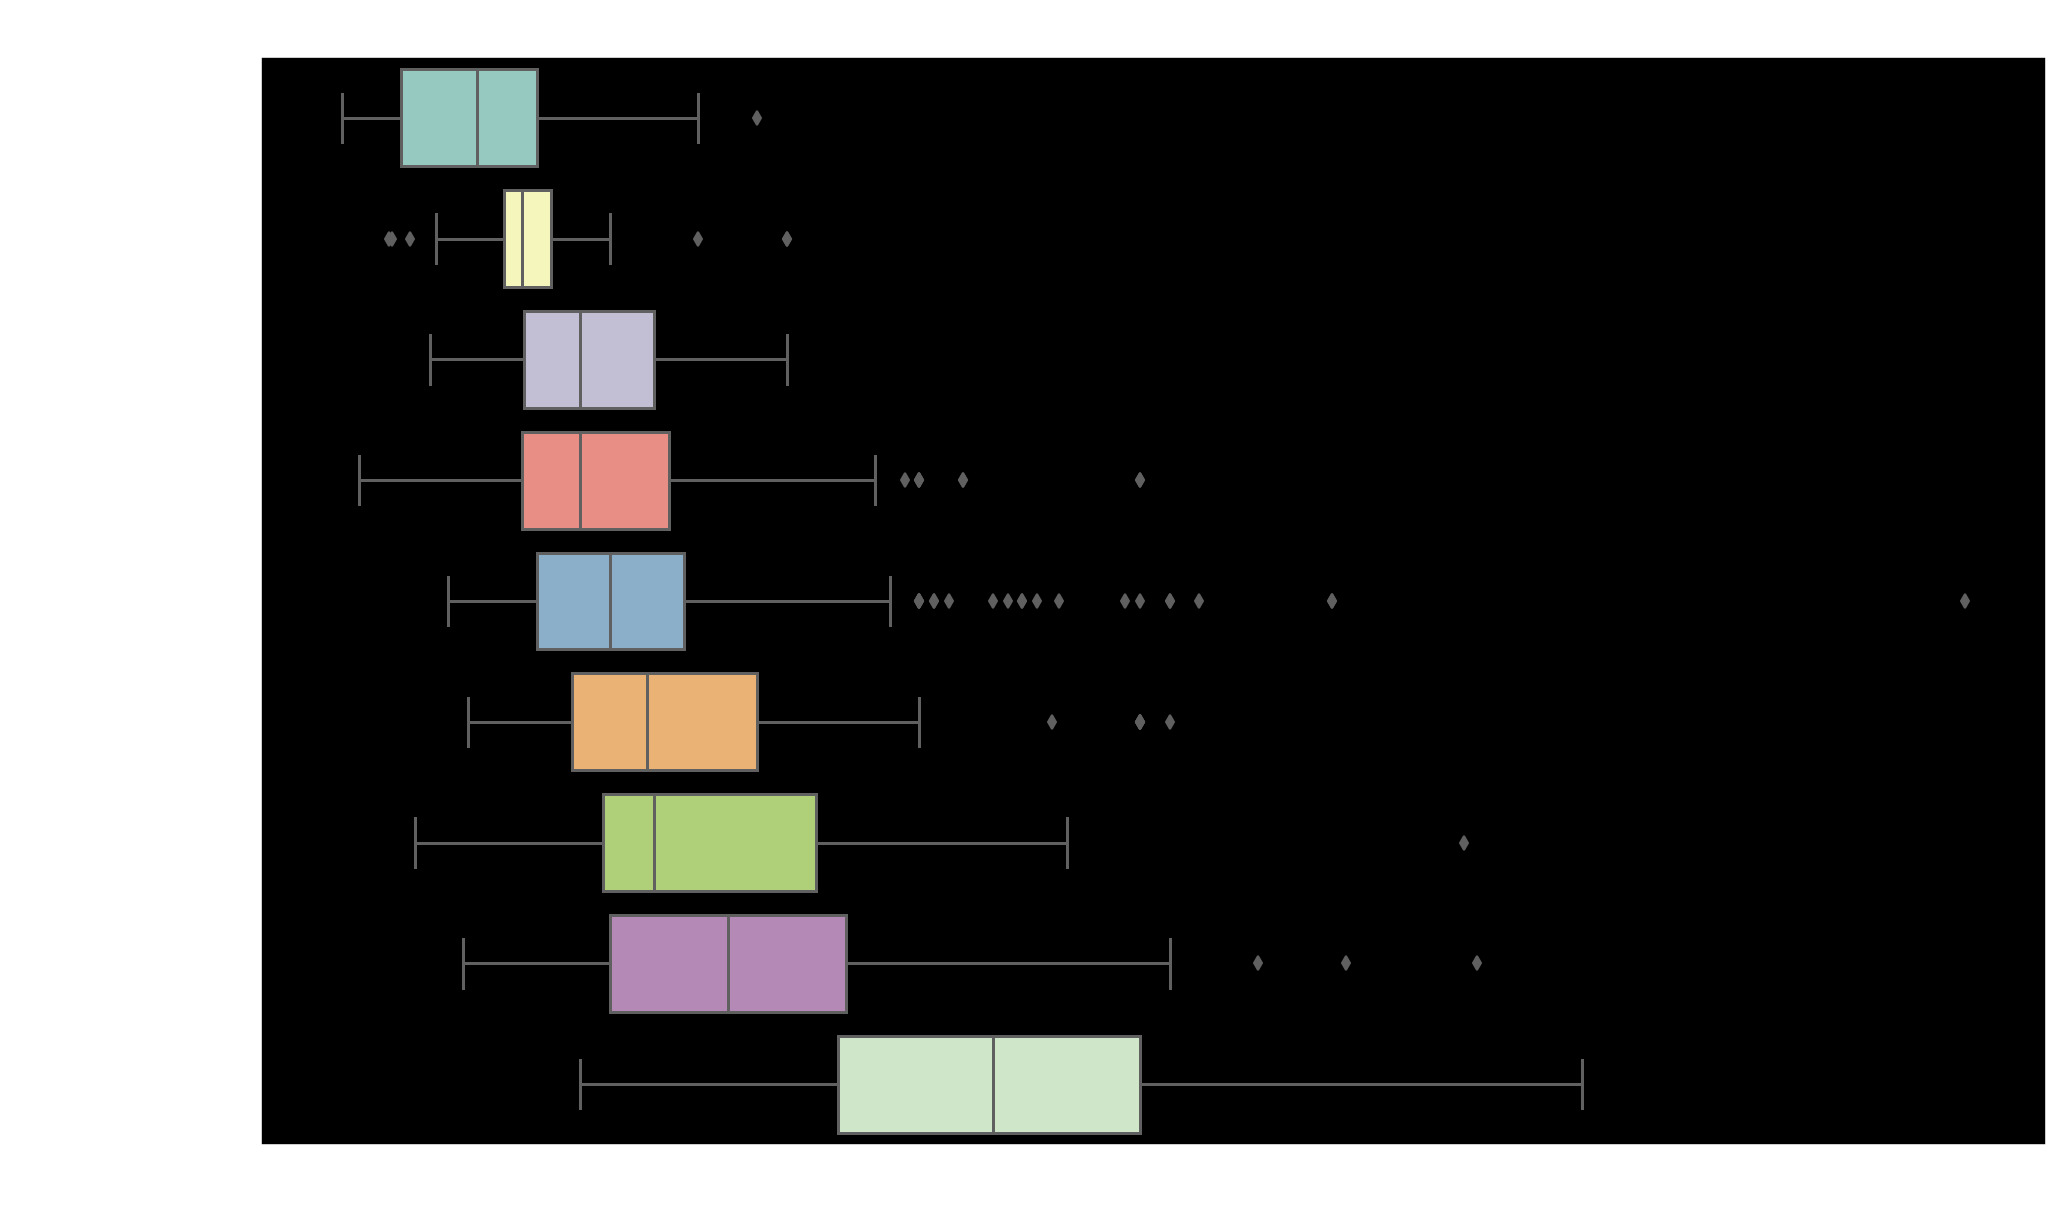

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Seniority", data=jobs,order=progression)
plt.title('Distribution of average salary by seniority', fontsize=20)
plt.show()

No surprises here, permanent jobs always offer higher salary

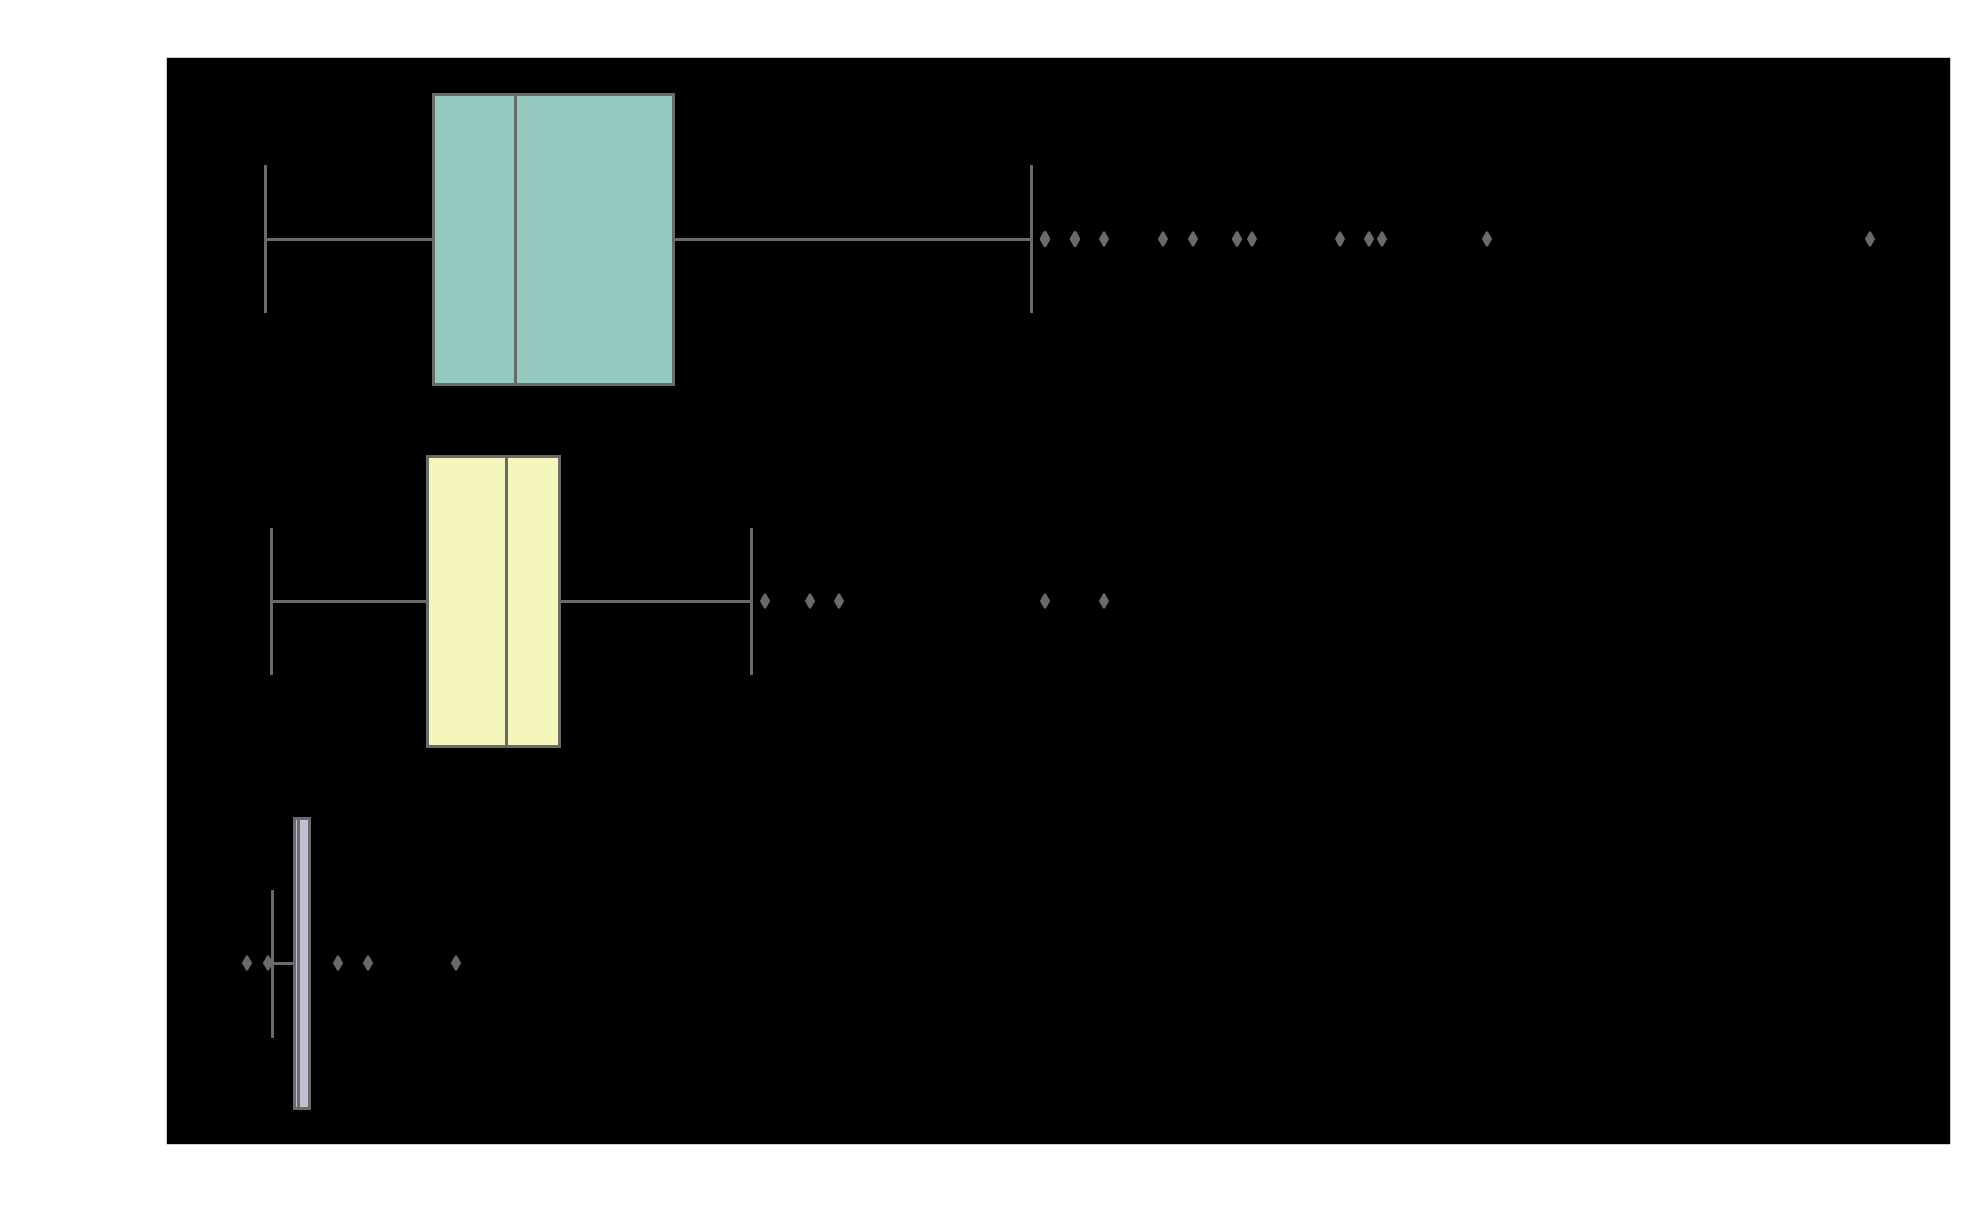

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Employment_Type", data=jobs)
plt.title('Distribution of average salary by employment type', fontsize=20)
plt.show()

## Seniority/Roles Postings

In [0]:
test=jobs["Seniority"].value_counts()
test=test.reindex(progression)
x=progression
y=test.values.tolist()

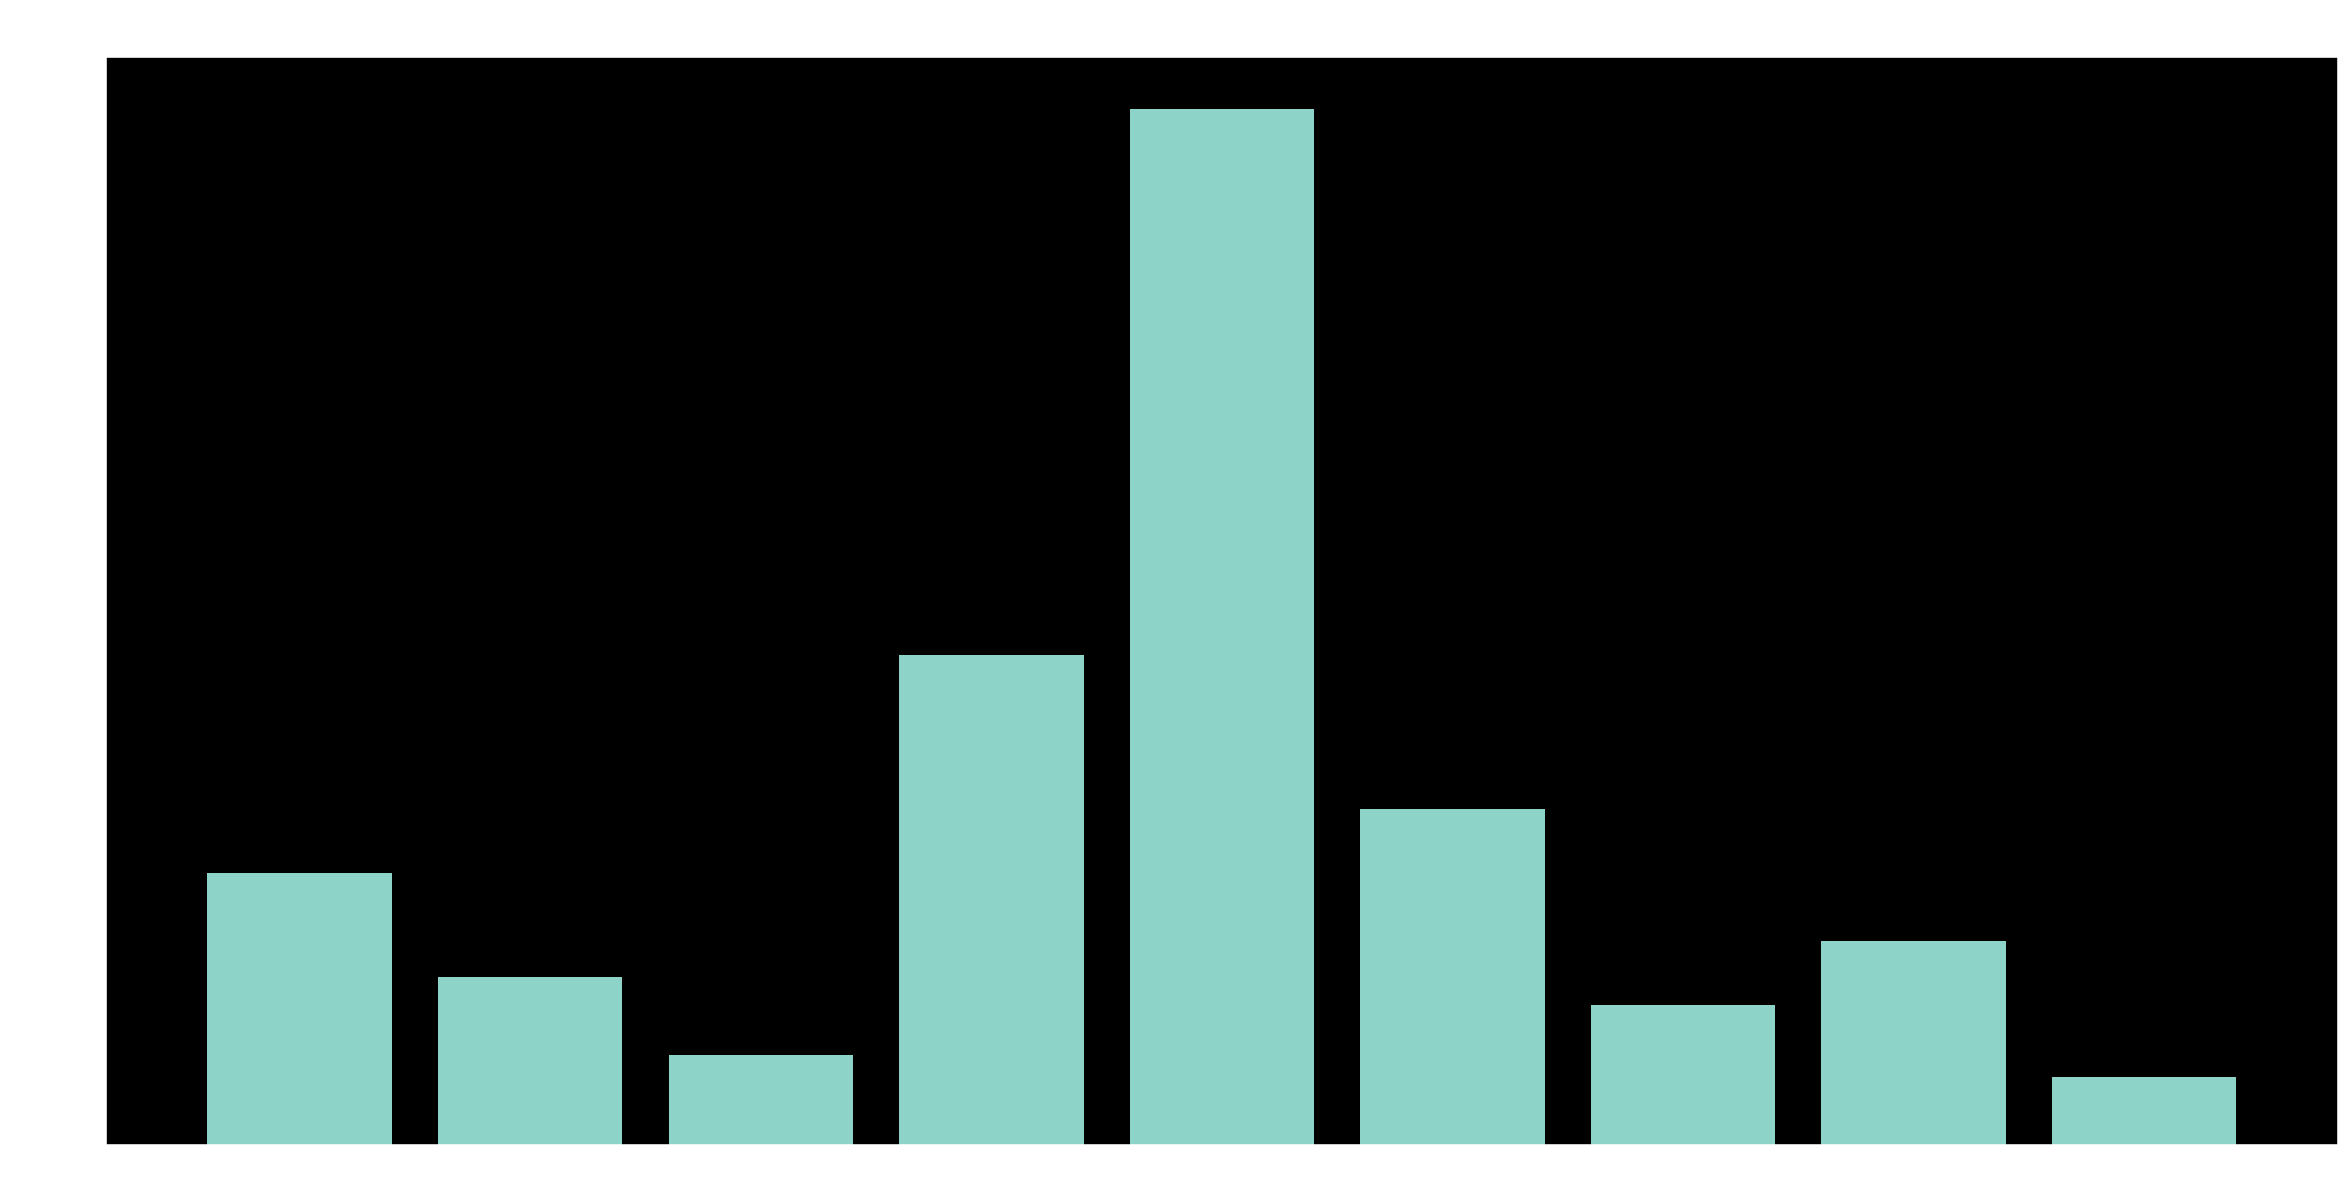

In [0]:
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)
plt.bar(x,y)
plt.title('Levels of seniority most commonly seen in job postings', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.show()

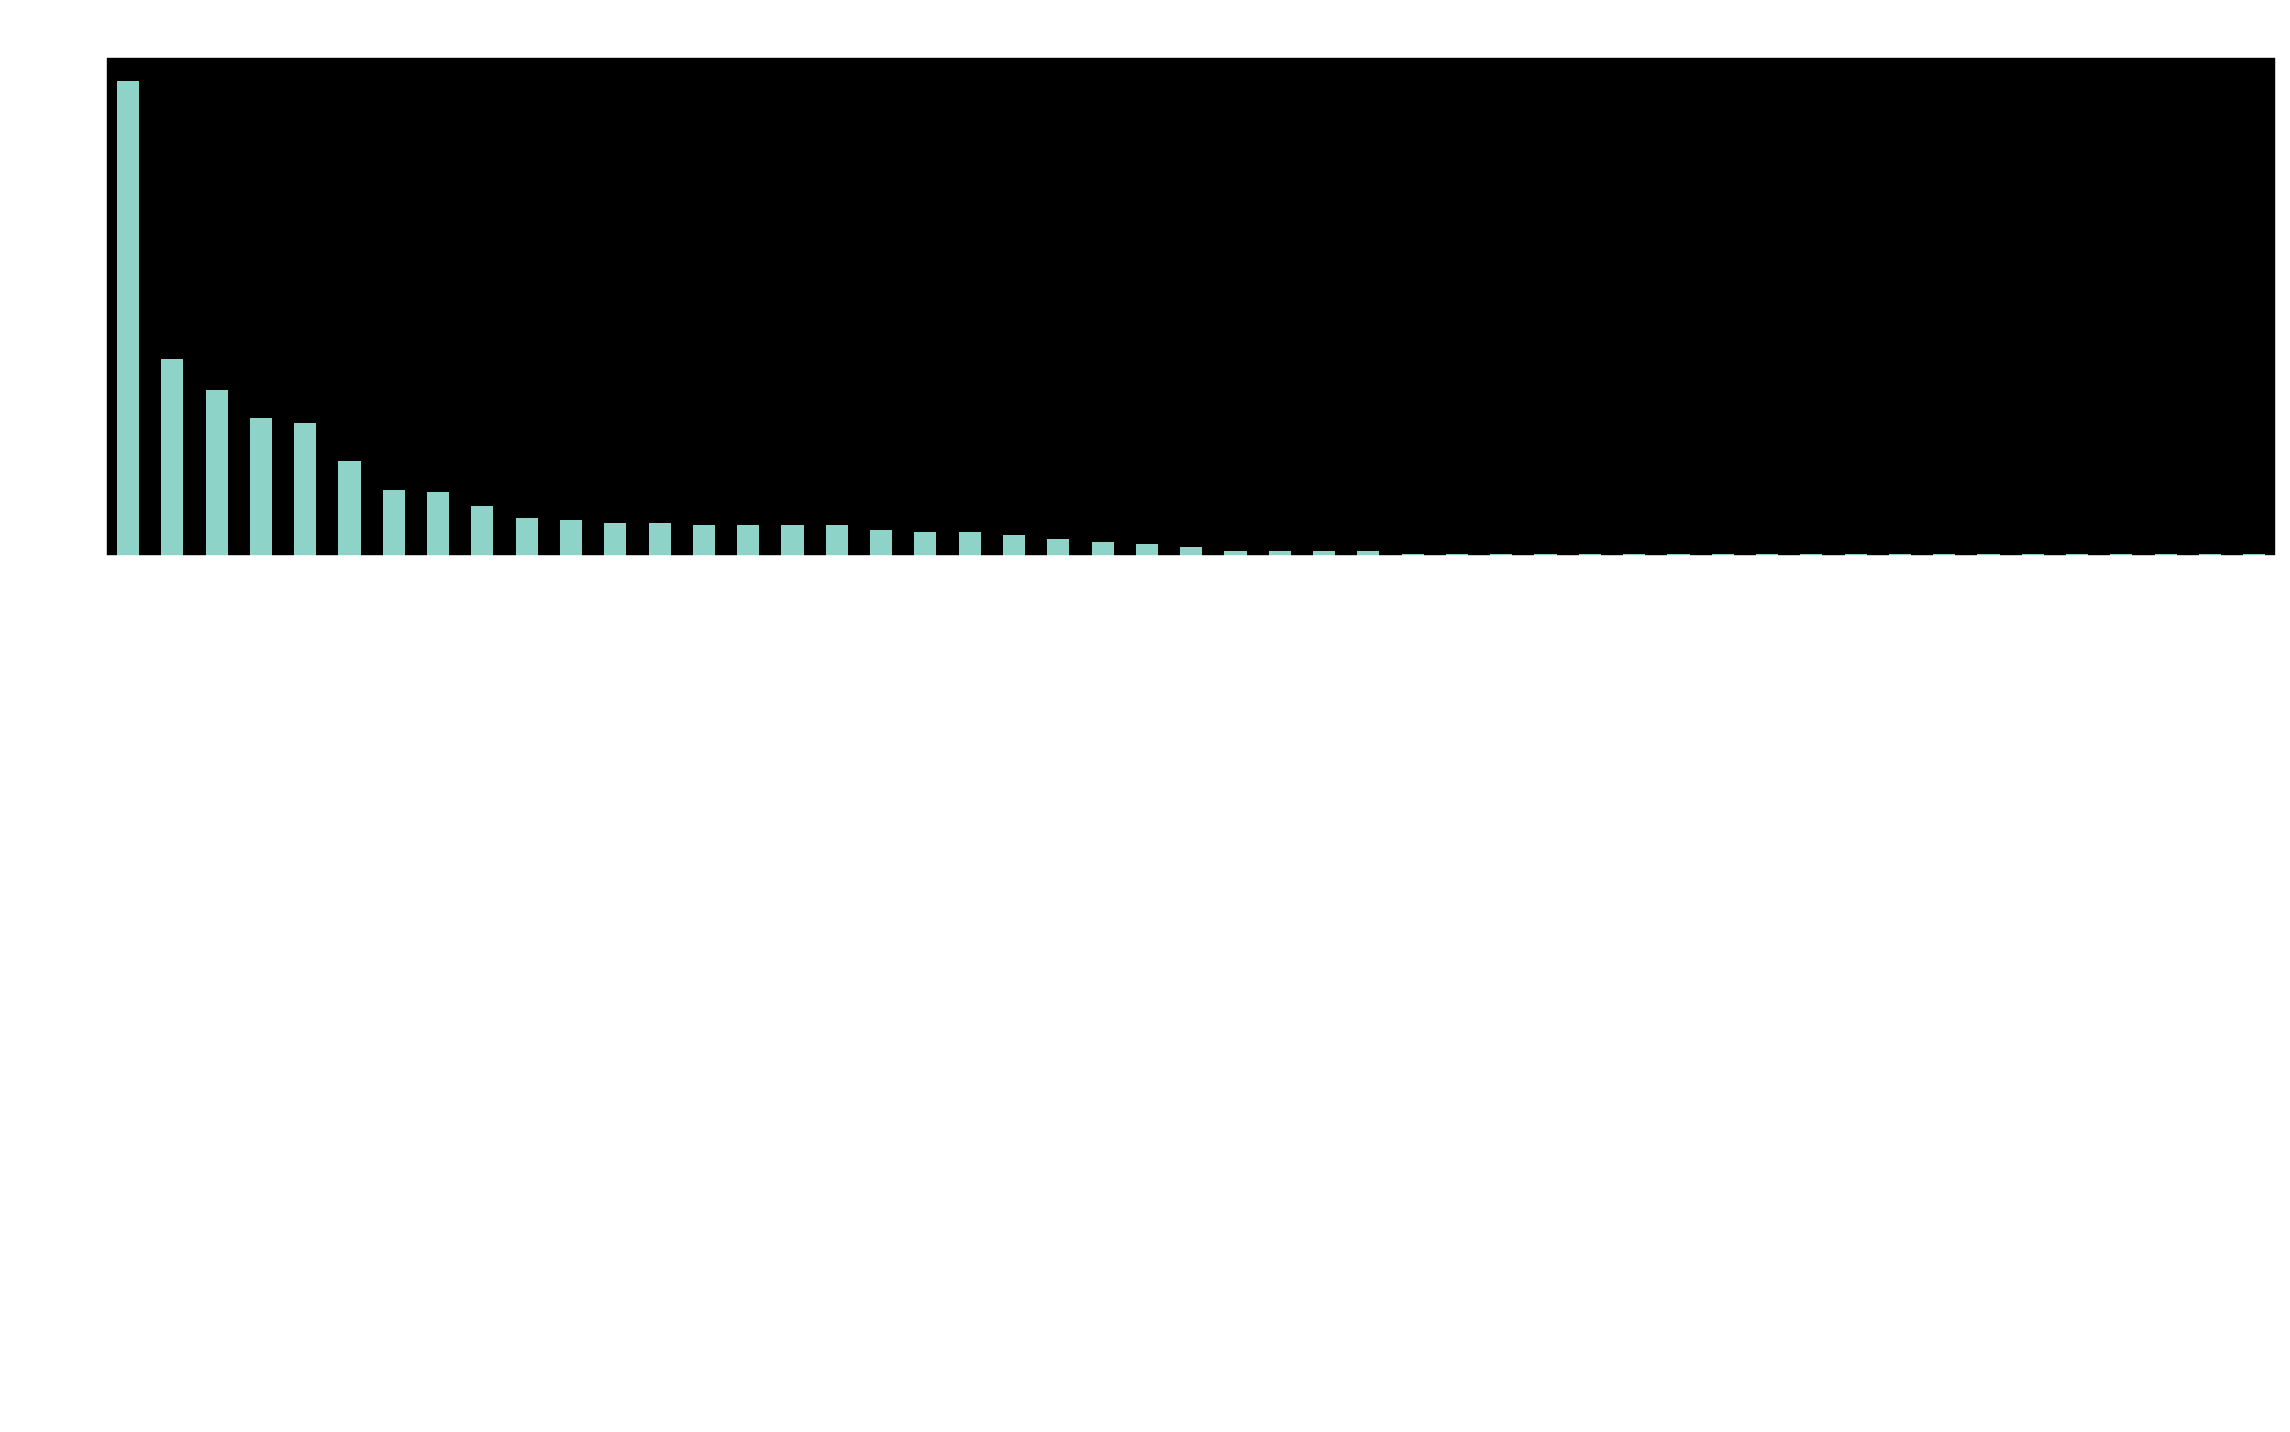

In [0]:
jobs["Roles"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
  "Roles most commonly seen in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Employment Type Postings

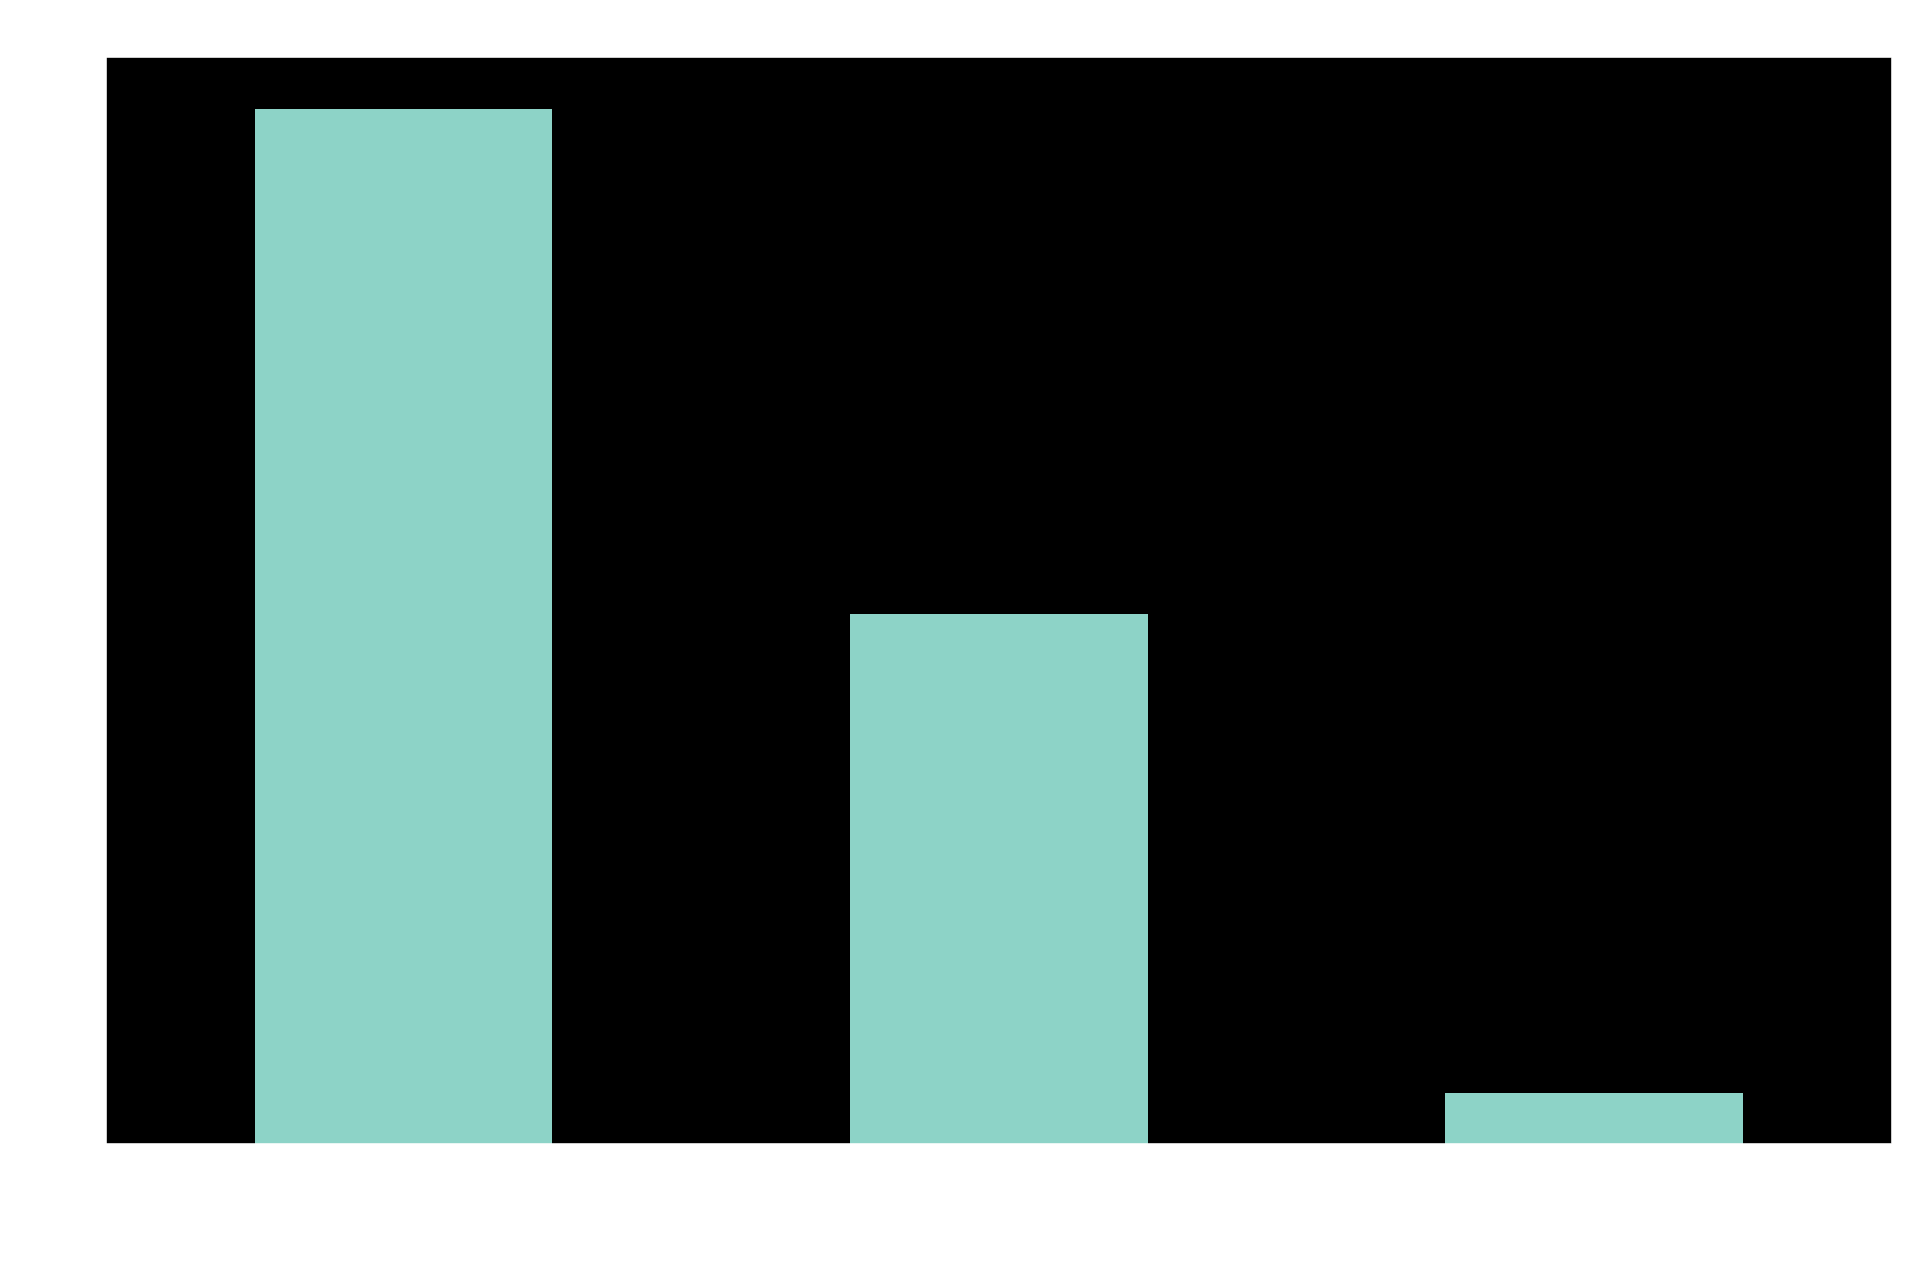

In [0]:
jobs["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Most frequently cited employment conditions in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)

plt.show()

 ## Qualitative Measures

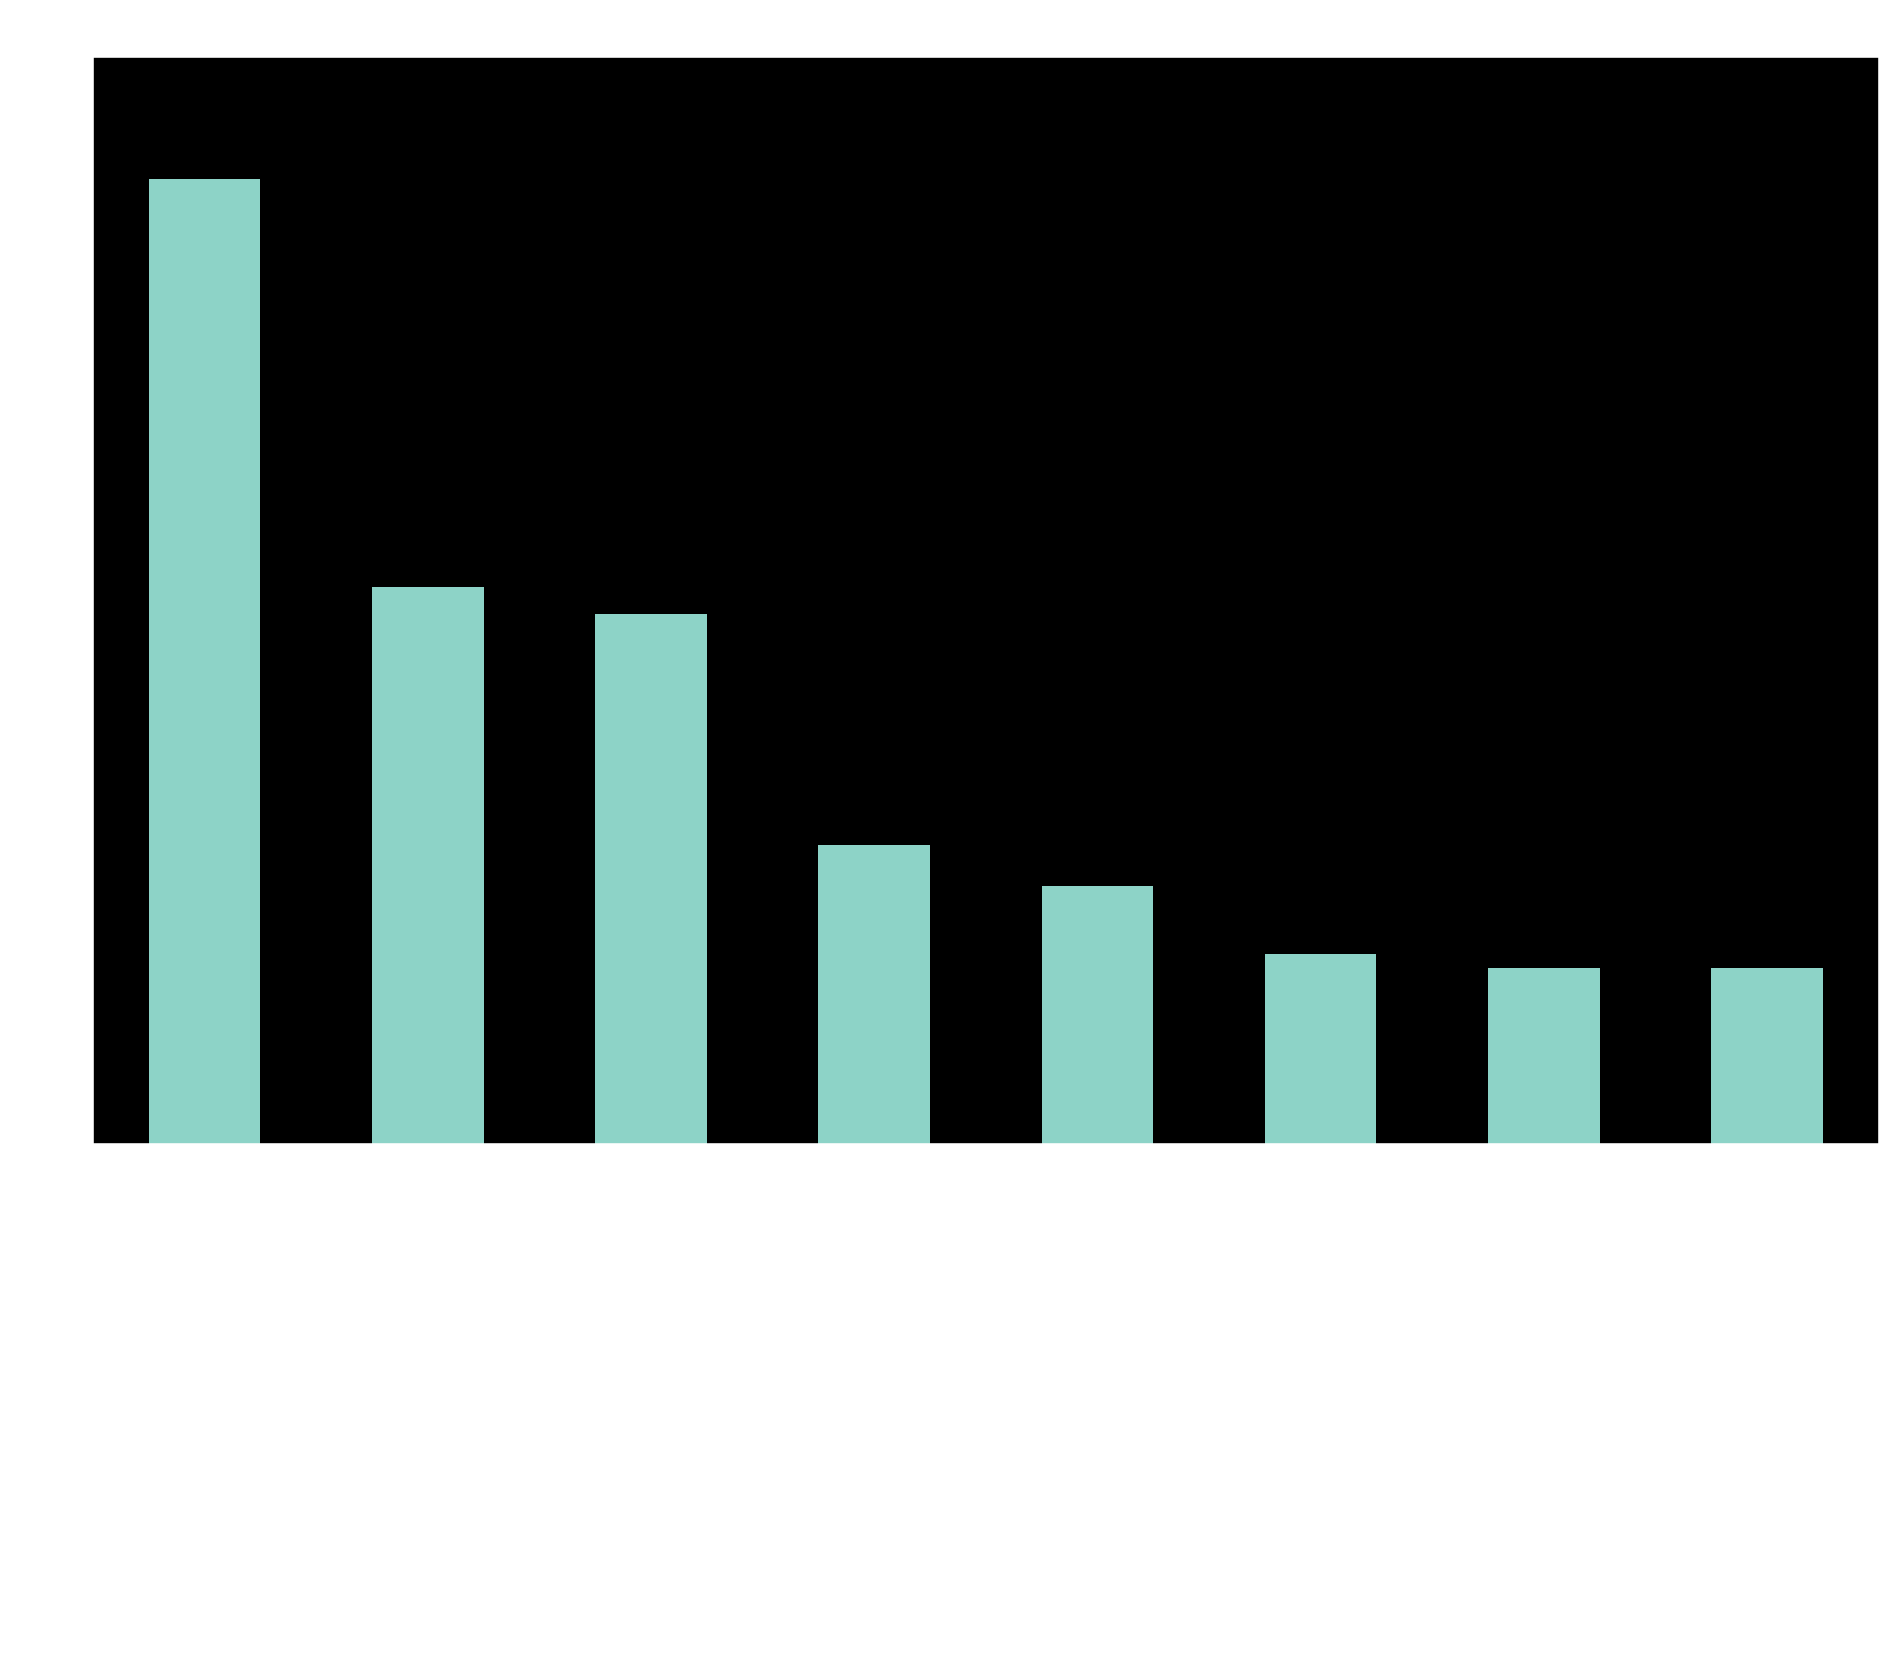

In [277]:
jobs["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Industries related to roles", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.xlim(1.5, 9.5)
plt.ylim(0,80)
plt.show()

In [319]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(2,2))
vect.fit(jobs['Responsibilities'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 1265


In [0]:
responsibility = vect.get_feature_names()

In [0]:
resp = pd.DataFrame(vect.transform(jobs['Responsibilities']).todense(),
                       columns=responsibility)

In [322]:
responsibility_count = resp.sum(axis=0)
responsibility_count.sort_values(ascending = False).head(30)

machine learning           778
computer science           474
data analytics             298
big data                   257
data science               255
communication skills       236
deep learning              234
software development       193
artificial intelligence    187
problem solving            184
degree computer            183
years experience           182
bachelor degree            151
computer vision            130
business intelligence      130
work closely               125
computer engineering       123
programming languages      119
skills ability             115
working experience         114
team player                114
ability work               113
solving skills             109
work independently         101
learning algorithms         97
science engineering         97
data analysis               94
end end                     93
hands experience            92
years relevant              90
dtype: int64

In [0]:
top_responsibility = responsibility_count.sort_values(ascending = False).head(30)

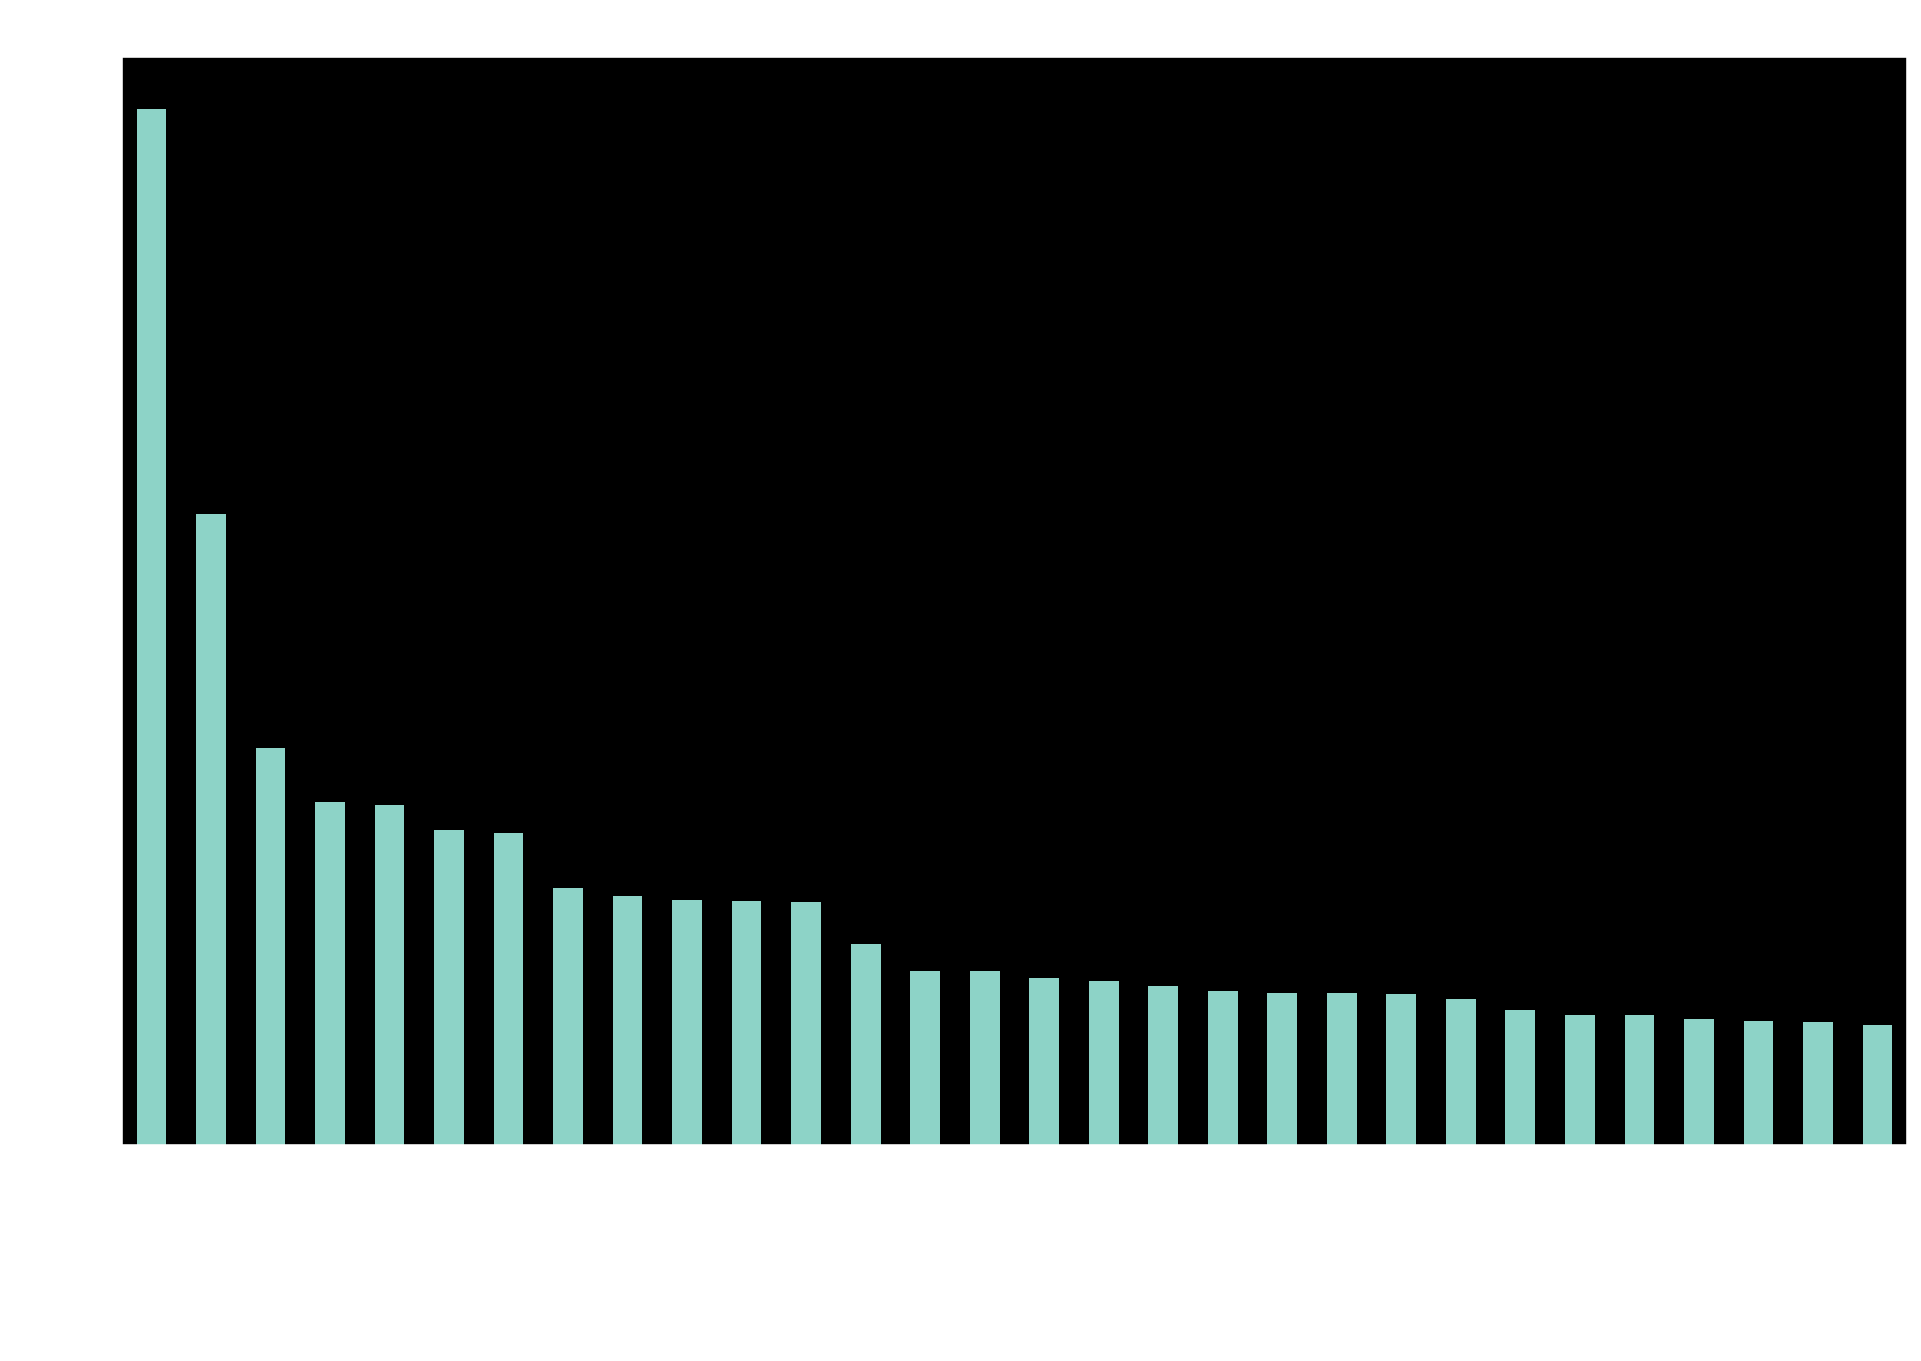

In [324]:
top_responsibility.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe responsibilities', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

In [331]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(jobs['Skills'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 392


In [0]:
skills = vect.get_feature_names()

In [0]:
resp = pd.DataFrame(vect.transform(jobs['Skills']).todense(),
                       columns=skills)

In [334]:
skills_count = resp.sum(axis=0)
skills_count.sort_values(ascending = False).head(30)

data                      687
development               402
management                368
software                  329
analysis                  326
java                      323
learning                  274
research                  262
engineering               256
business                  236
machine                   220
machine learning          215
python                    212
computer                  203
science                   189
microsoft                 172
sql                       159
software development      141
information               137
technology                129
project                   126
analytics                 123
intelligence              121
design                    120
data analysis             116
algorithms                112
programming               111
data data                 111
information technology    109
computer science          101
dtype: int64

In [0]:
top_skills = skills_count.sort_values(ascending = False).head(30)

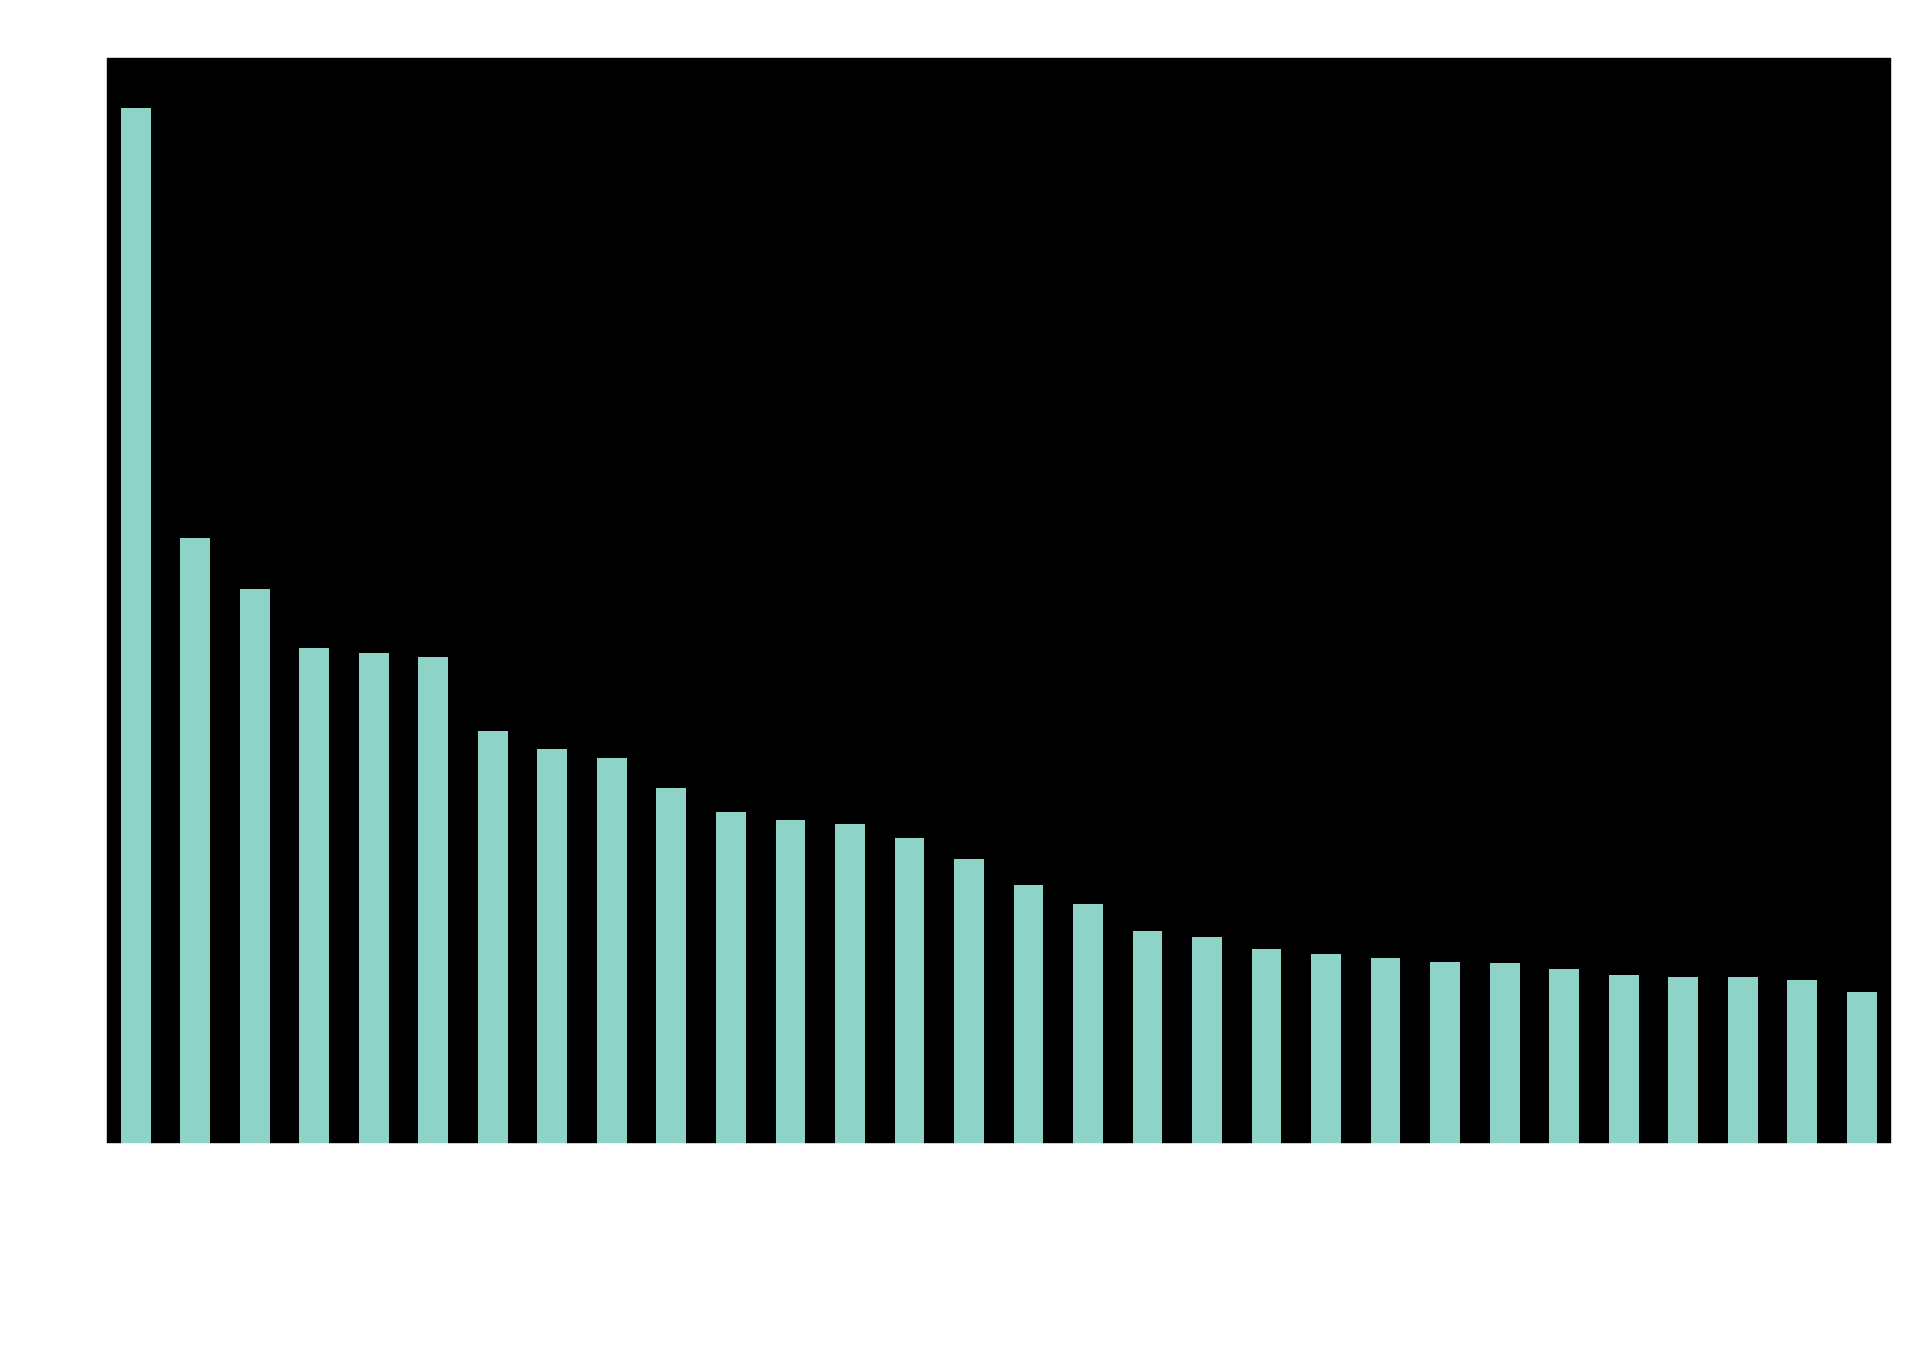

In [336]:
top_skills.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe skills', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

#5. Visualizing Machine Learning Opportunities

In [0]:
interested_roles = ['Data Anlyst','Data Eng','Machine Learning Eng','AI','Data Scientst']

In [0]:
MLjobs = jobs[jobs['Roles'].isin(interested_roles)]

In [342]:
MLjobs.Roles.value_counts().head(10)

Data Scientst           58
Data Anlyst             40
Data Eng                28
Machine Learning Eng    16
AI                       9
Name: Roles, dtype: int64

In [343]:
MLjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 10 to 845
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           151 non-null    object 
 1   Title             151 non-null    object 
 2   Responsibilities  151 non-null    object 
 3   Seniority         151 non-null    object 
 4   Employment_Type   151 non-null    object 
 5   Category          151 non-null    object 
 6   Address           151 non-null    object 
 7   Applications      151 non-null    float64
 8   Skills            151 non-null    object 
 9   Salary_Min        151 non-null    float64
 10  Salary_Max        151 non-null    float64
 11  Salary_Average    151 non-null    float64
 12  Postal            151 non-null    object 
 13  Roles             151 non-null    object 
dtypes: float64(4), object(10)
memory usage: 17.7+ KB


## Salary Distribution

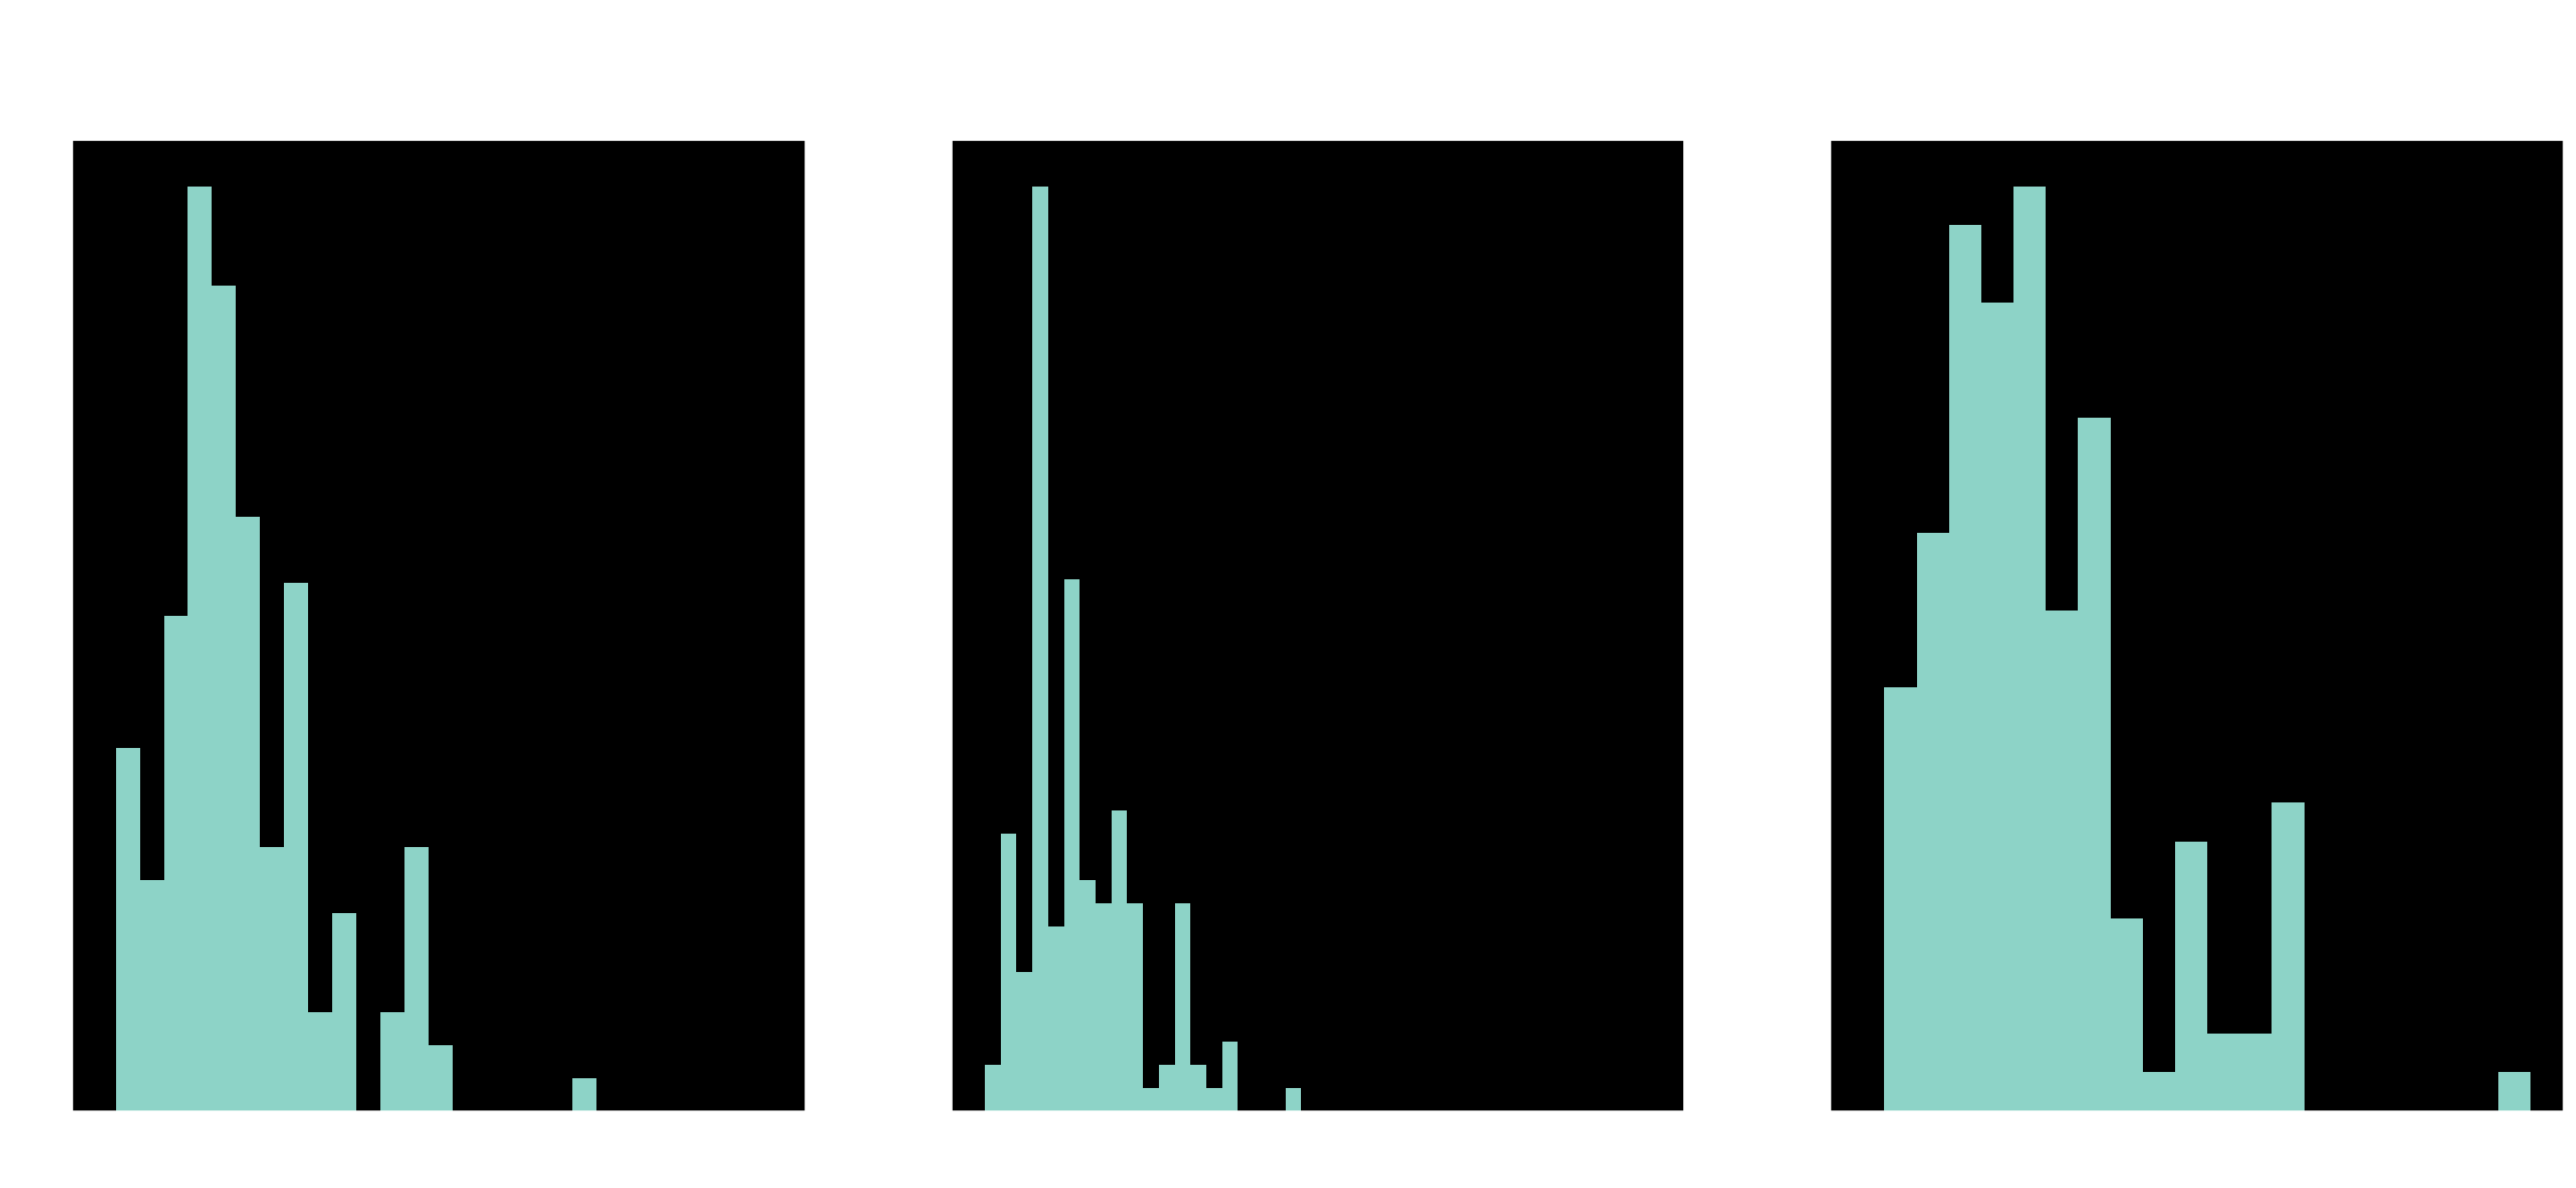

In [344]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
MLjobs["Salary_Average"].plot(kind="hist", ax=axs[0],bins=20)
MLjobs["Salary_Min"].plot(kind="hist", ax=axs[1],bins=20)
MLjobs["Salary_Max"].plot(kind="hist", ax=axs[2],bins=20)
fig.suptitle(
    "(L-R) Distribution of Average, Minimum and Maximum Salaries offered in ML job postings",
    fontsize=20,
)
plt.xlabel(
    "Monthly pay in Sing Dollars", fontsize=16, horizontalalignment="center", x=-0.8
)
plt.show()

## Salary vis-a-vis Other Features

Some interesting roles with above average salary noted: DevOps,Business Intelligence, Machine Learning Engineer, Data Scientist

In [0]:
x = MLjobs.Roles.value_counts().head(5).index
data = MLjobs[MLjobs['Roles'].isin(x)]

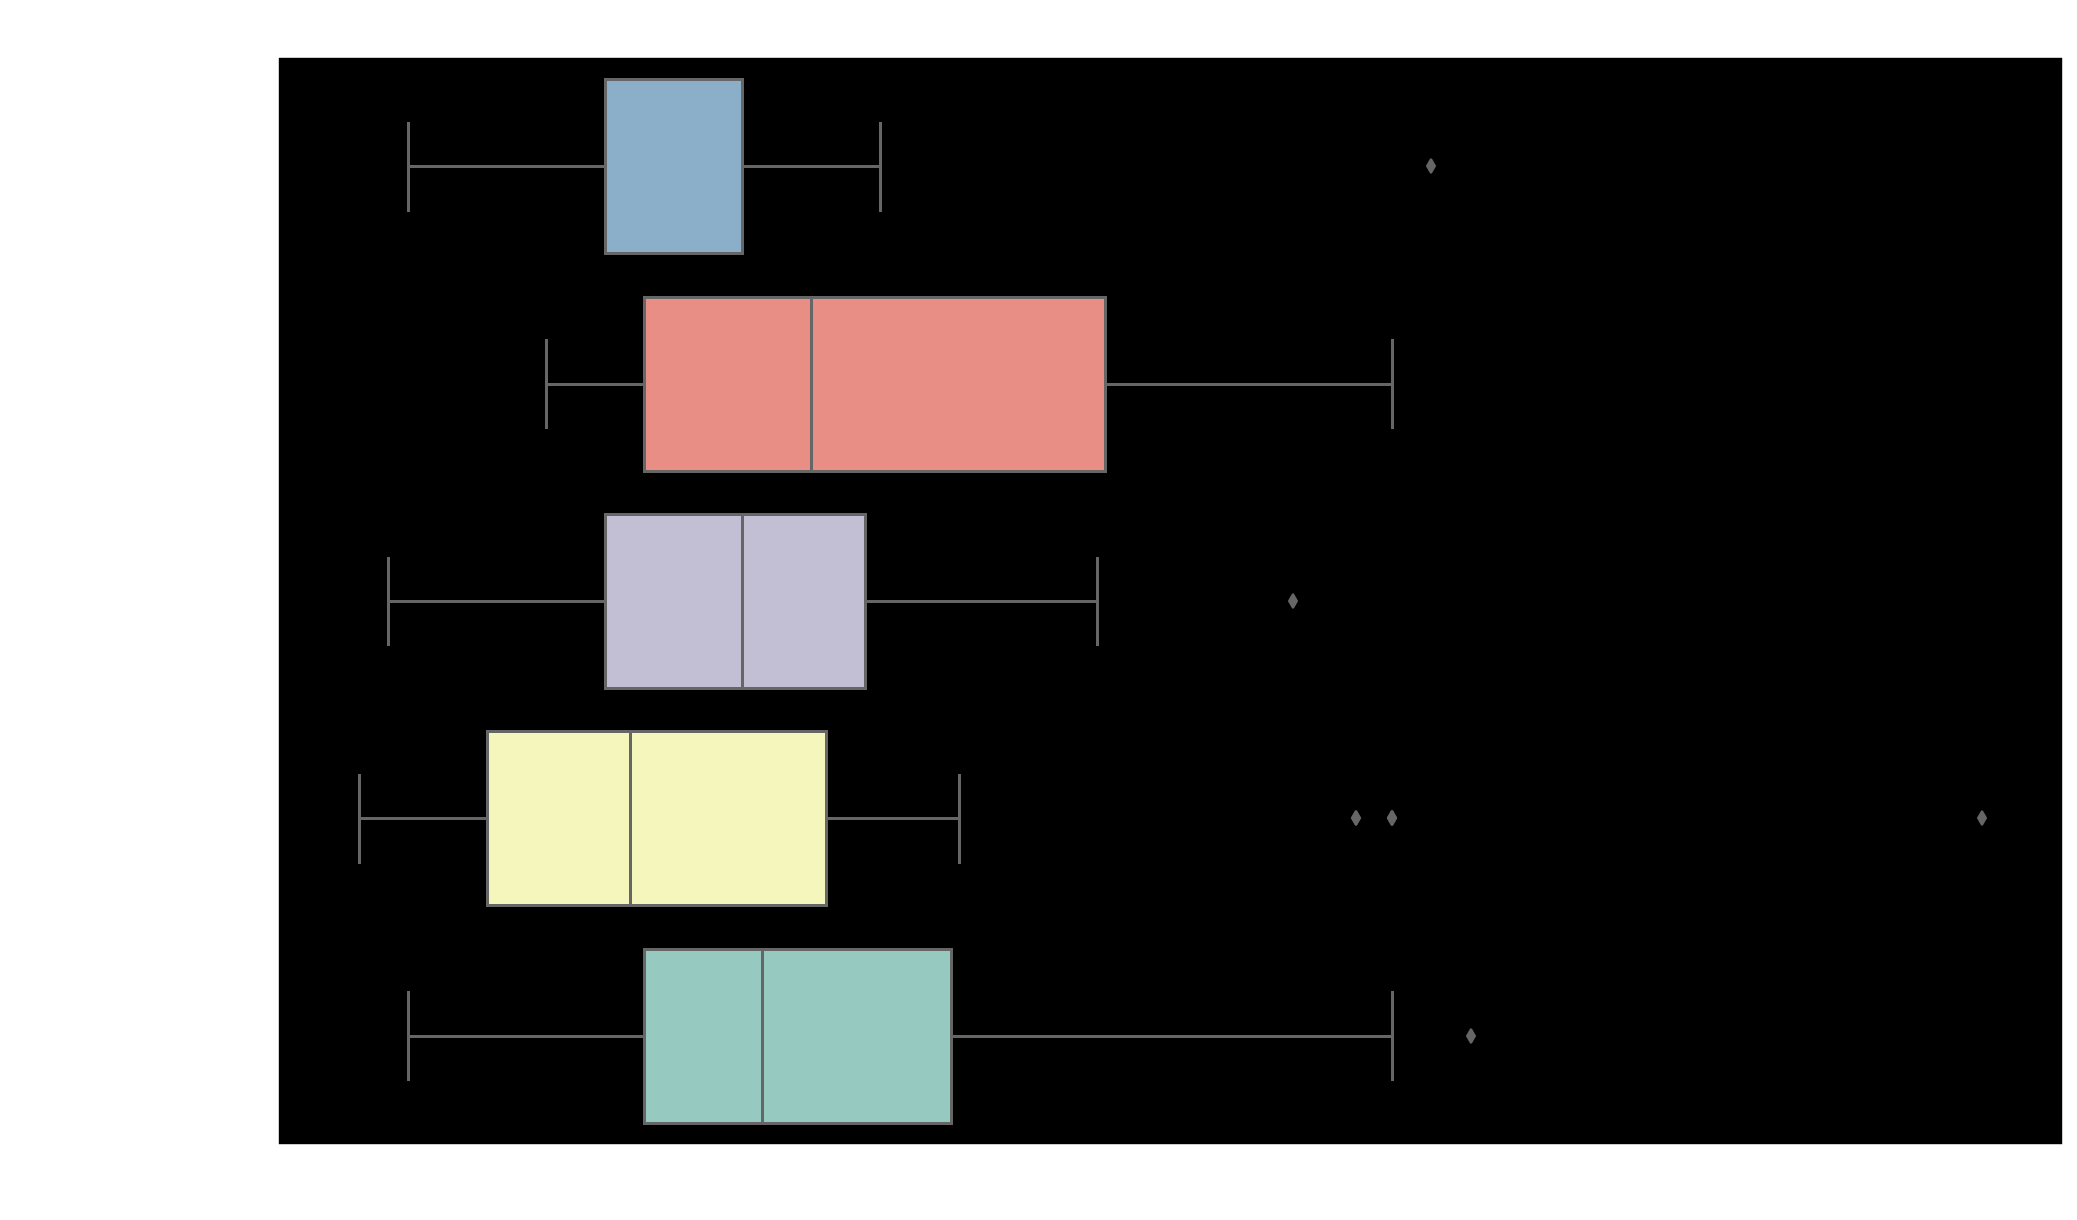

In [347]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x="Salary_Average", y="Roles", data=data, order=x)

plt.title('Distribution of average salary by ML job roles', fontsize=20)
plt.ylim(-0.5, 4.5)
plt.show()

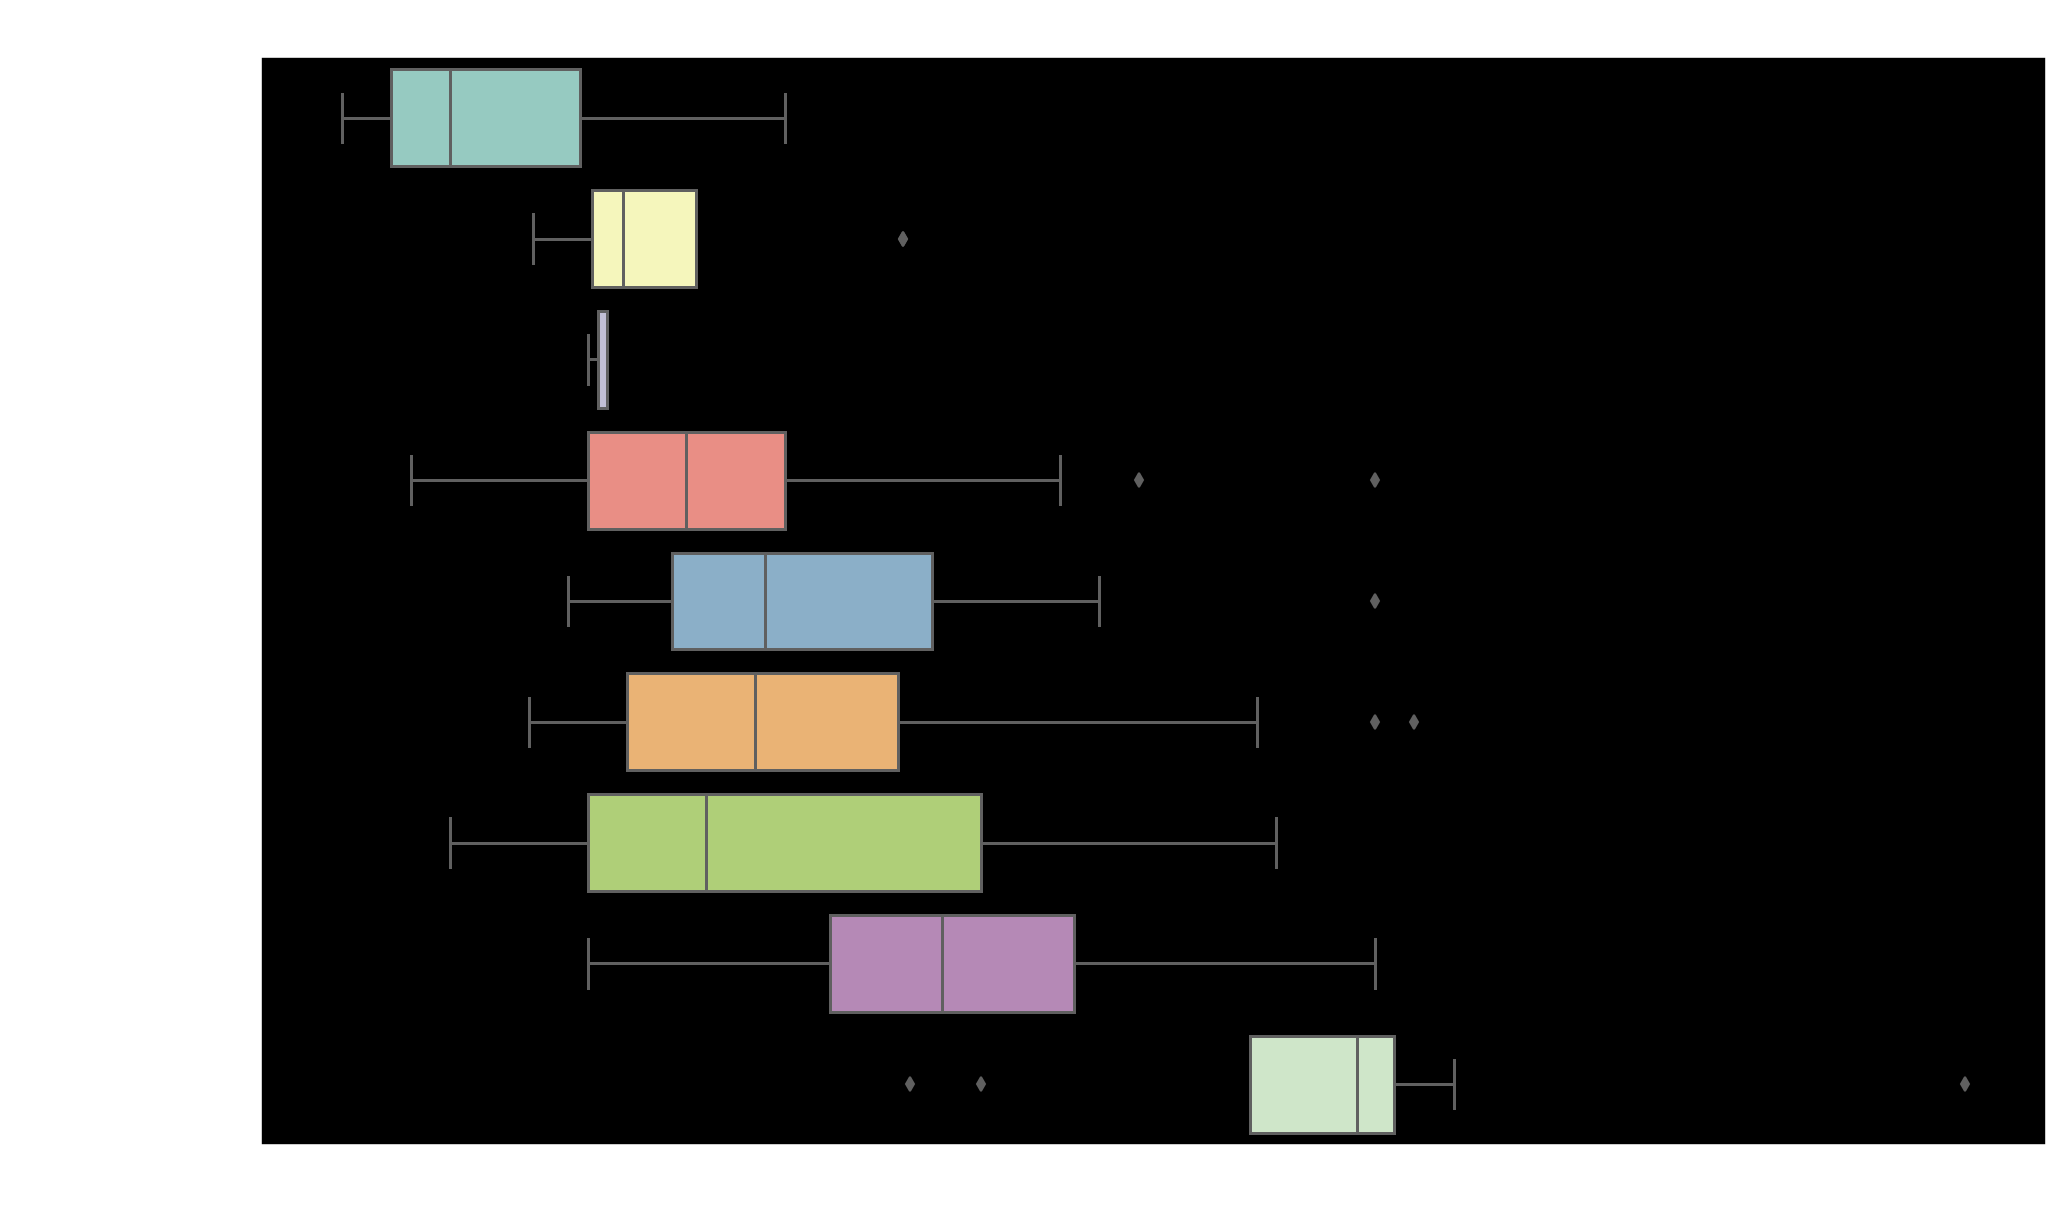

In [348]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Seniority", data=MLjobs,order=progression)
plt.title('Distribution of average salary by seniority', fontsize=20)
plt.show()

No surprises here, permanent jobs always offer higher salary

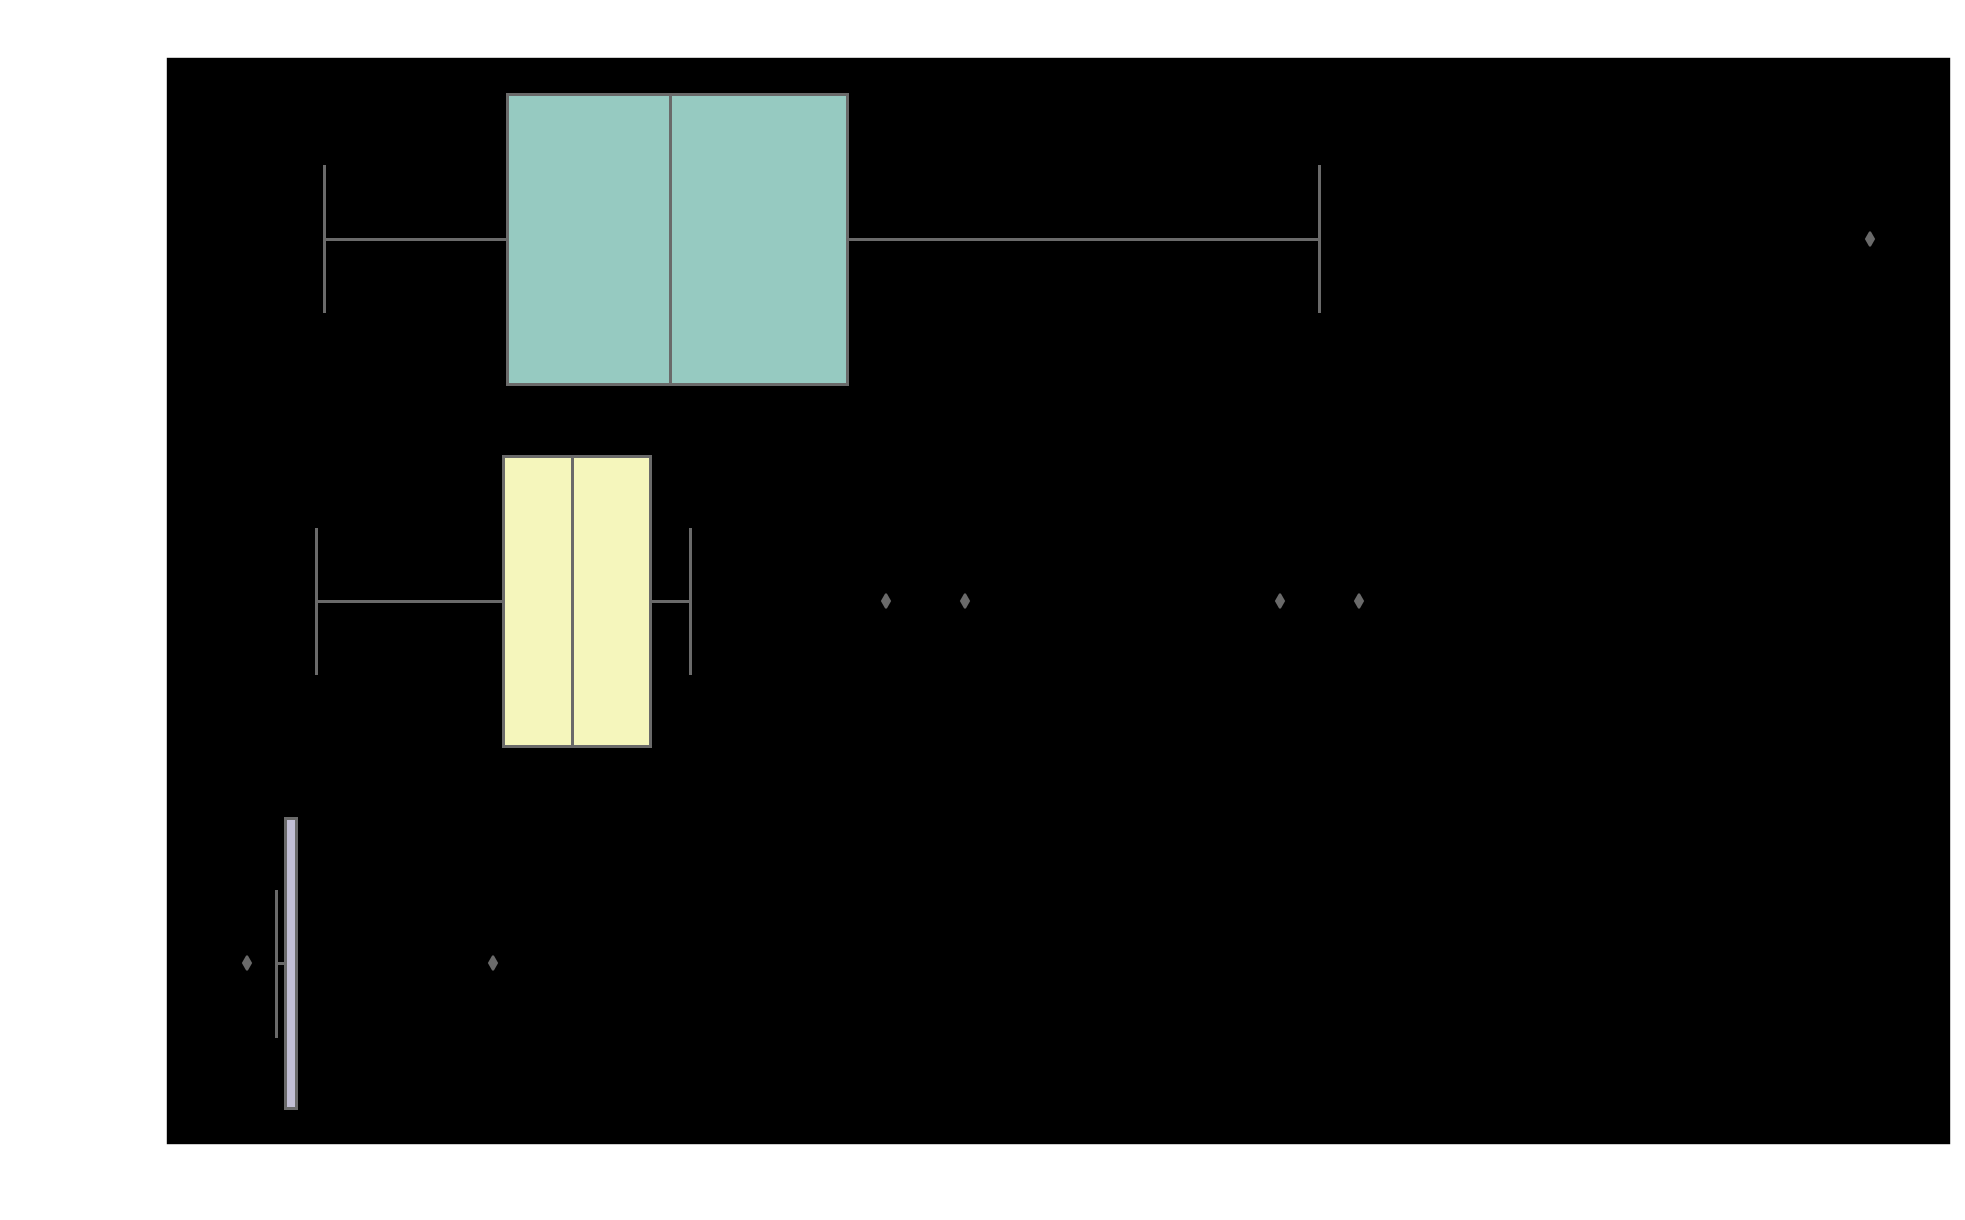

In [349]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Employment_Type", data=MLjobs)
plt.title('Distribution of average salary by employment type', fontsize=20)
plt.show()

## Seniority/Roles Postings

In [0]:
test=MLjobs["Seniority"].value_counts()
test=test.reindex(progression)
x=progression
y=test.values.tolist()

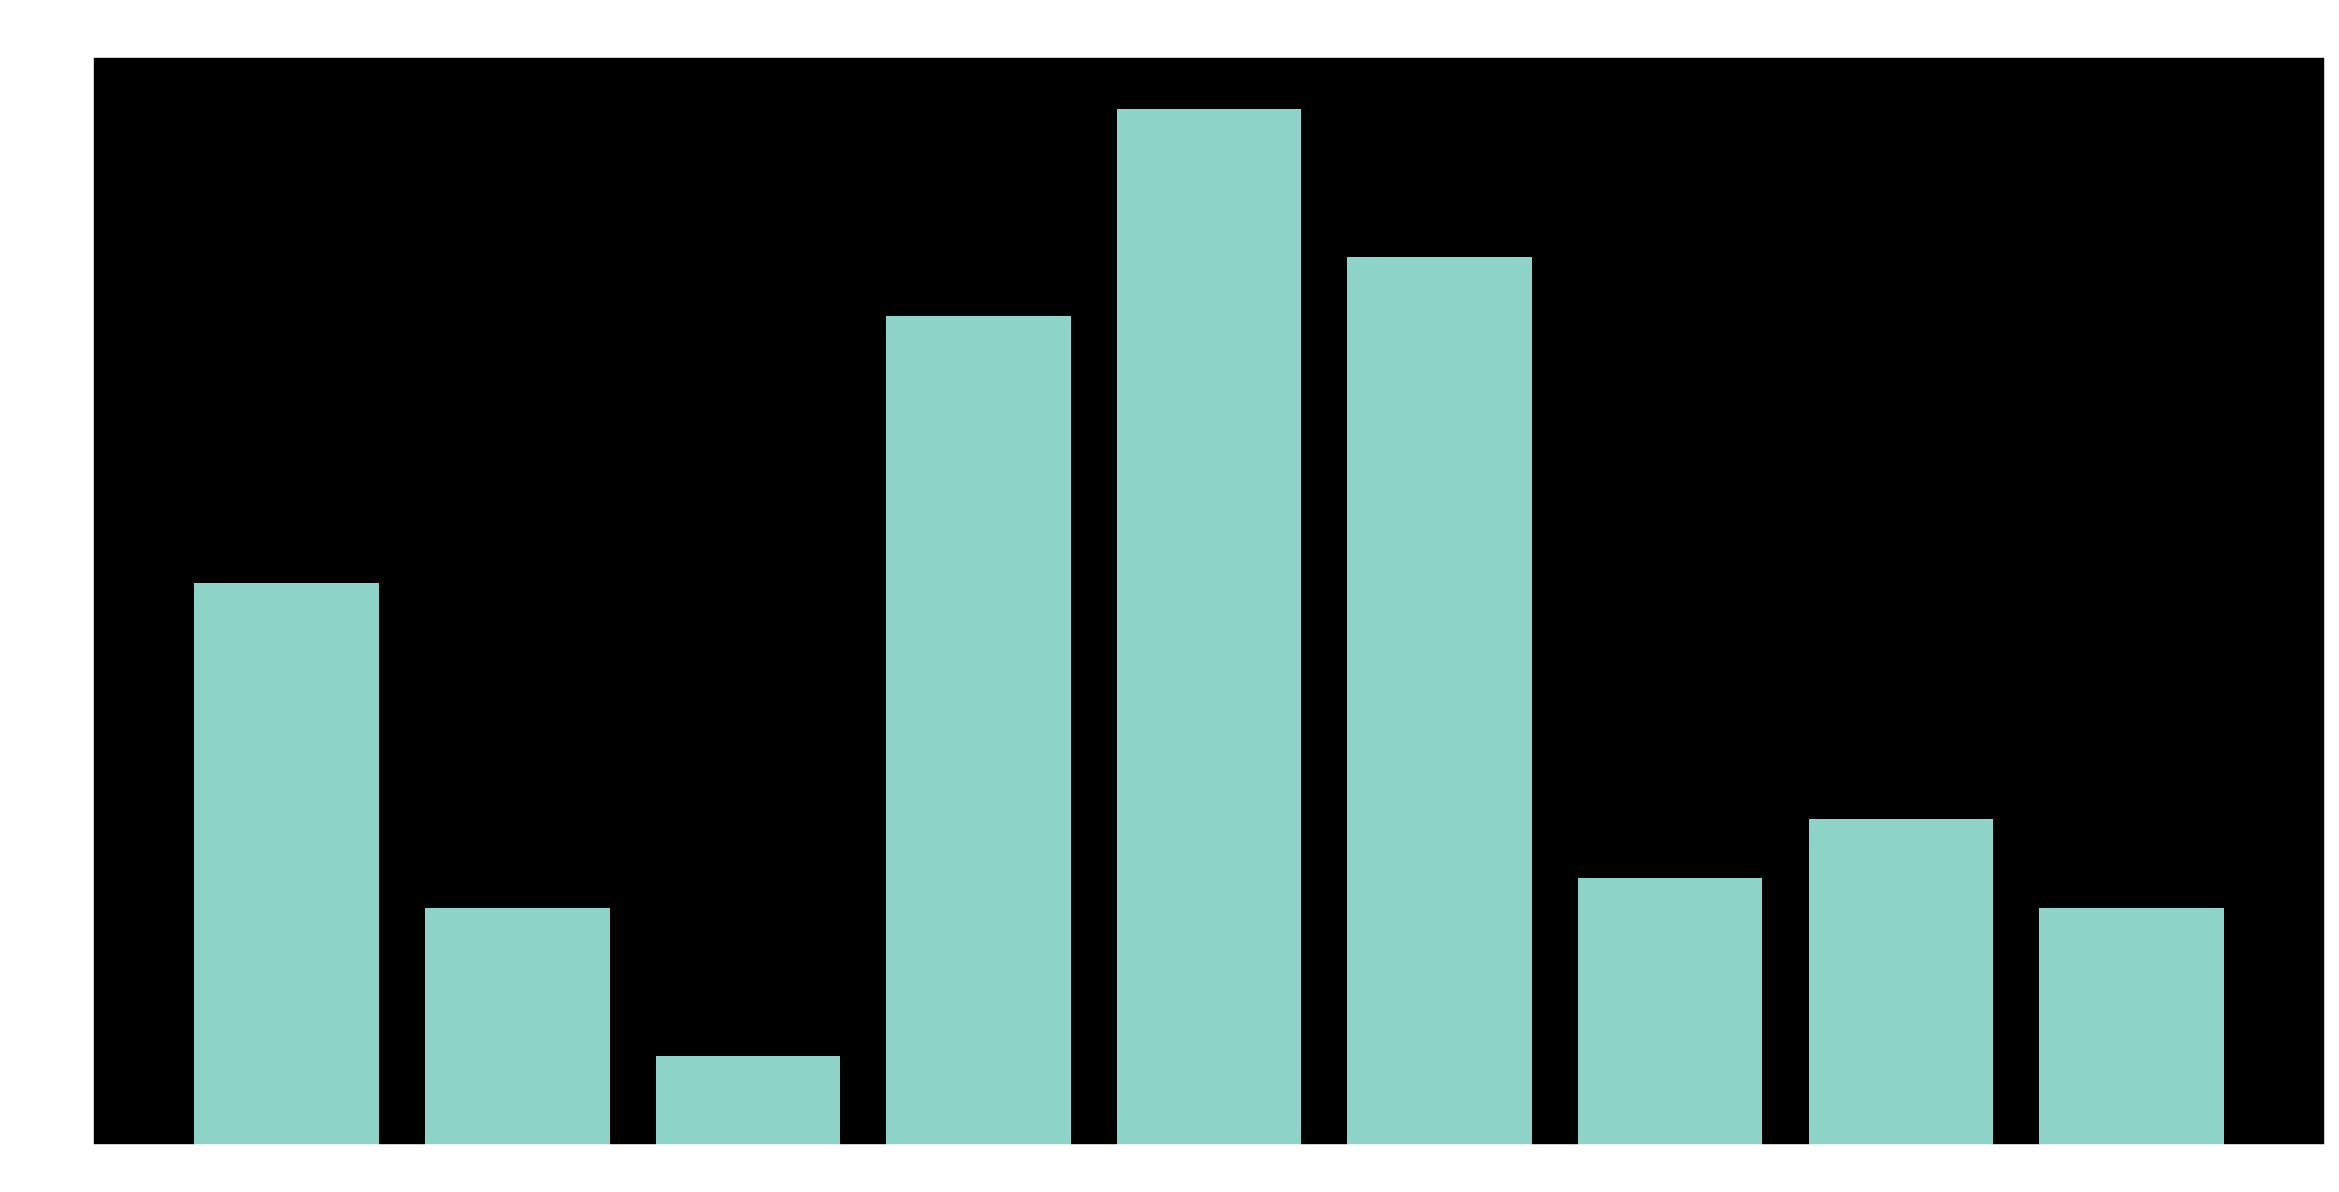

In [351]:
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)
plt.bar(x,y)
plt.title('Levels of seniority most commonly seen in job postings', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.show()

## Employment Type Postings

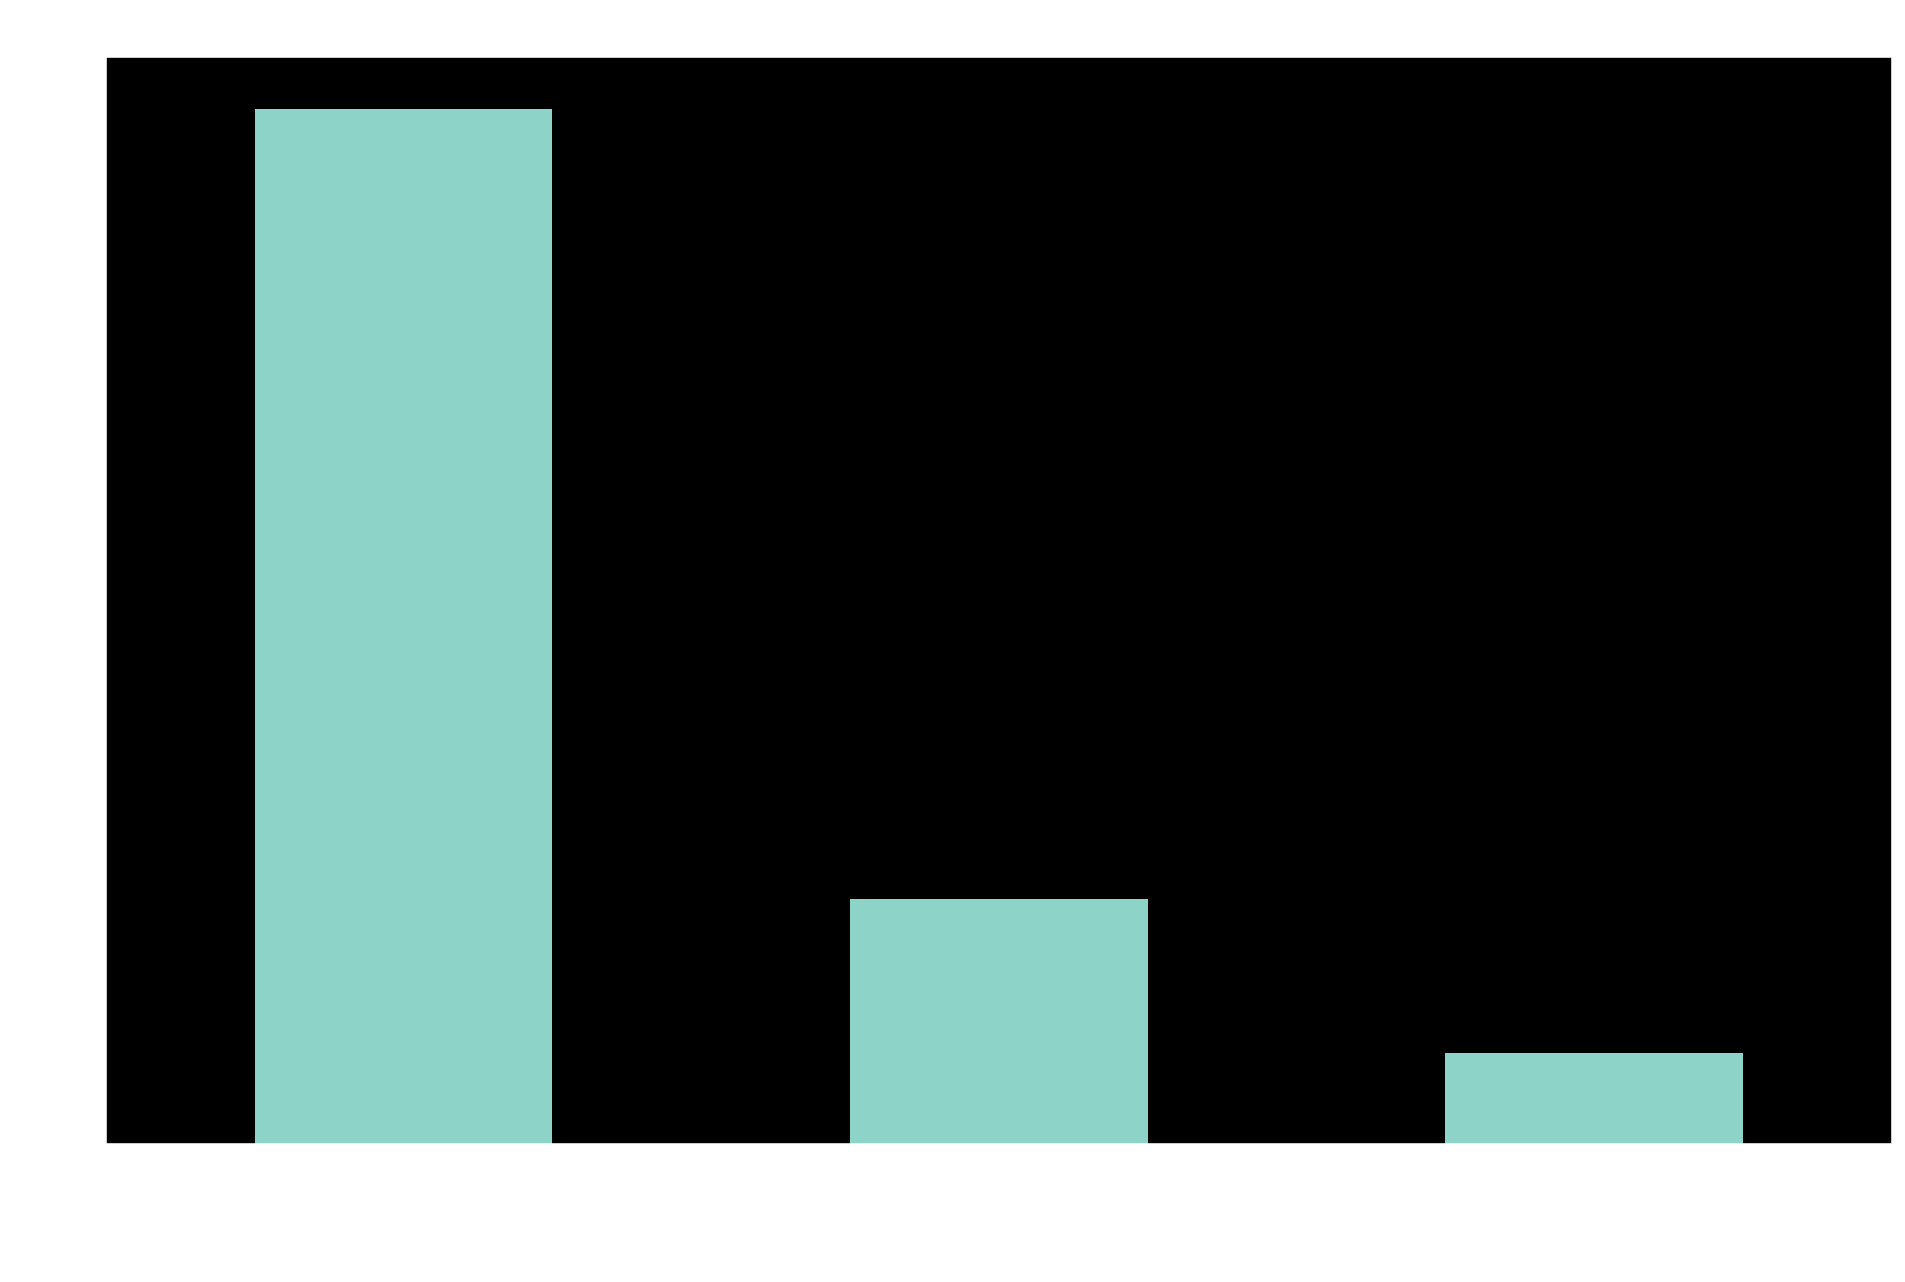

In [352]:
MLjobs["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Most frequently cited employment conditions in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)

plt.show()

 ## Qualitative Measures

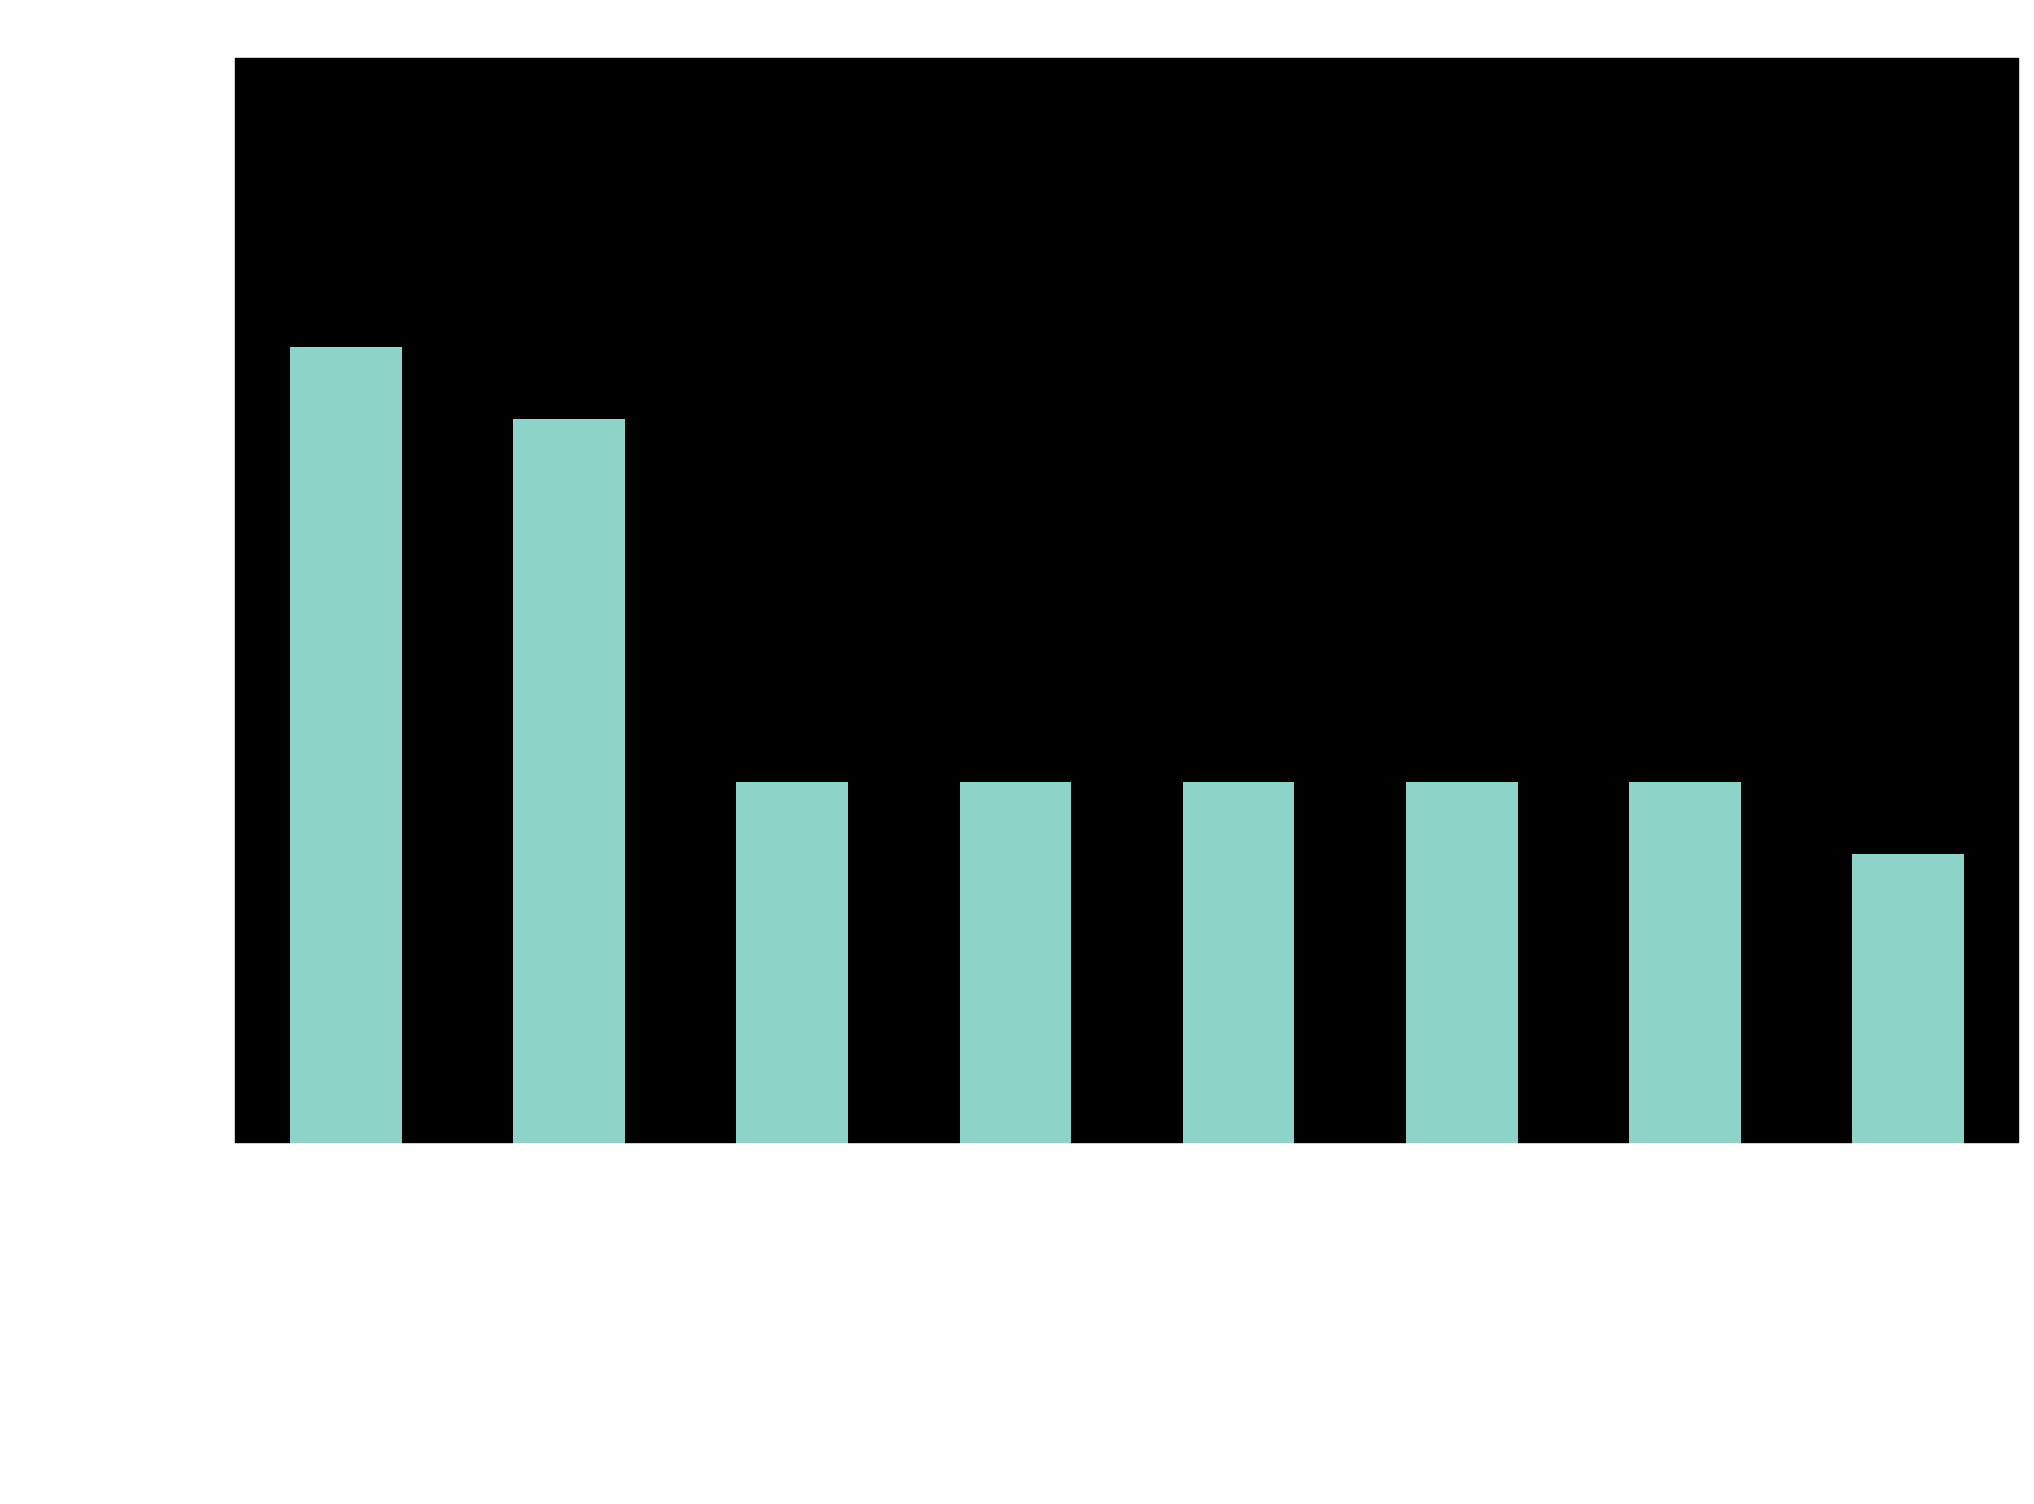

In [355]:
MLjobs["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Industries related to roles", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.xlim(1.5, 9.5)
plt.ylim(0,15)
plt.show()

In [356]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(2,2))
vect.fit(MLjobs['Responsibilities'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 160


In [0]:
responsibility = vect.get_feature_names()

In [0]:
resp = pd.DataFrame(vect.transform(MLjobs['Responsibilities']).todense(),
                       columns=responsibility)

In [359]:
responsibility_count = resp.sum(axis=0)
responsibility_count.sort_values(ascending = False).head(30)

machine learning           282
data science               142
data analytics             130
big data                   130
computer science            93
communication skills        52
deep learning               49
problem solving             49
data sets                   49
data mining                 45
data scientist              42
artificial intelligence     40
natural language            40
business intelligence       39
experience data             39
work closely                37
years experience            35
language processing         34
data sources                33
data analysis               33
data driven                 33
degree computer             31
data scientists             31
bachelor degree             30
skills ability              30
working experience          30
programming languages       29
large data                  28
knowledge experience        27
solving skills              27
dtype: int64

In [0]:
top_responsibility = responsibility_count.sort_values(ascending = False).head(30)

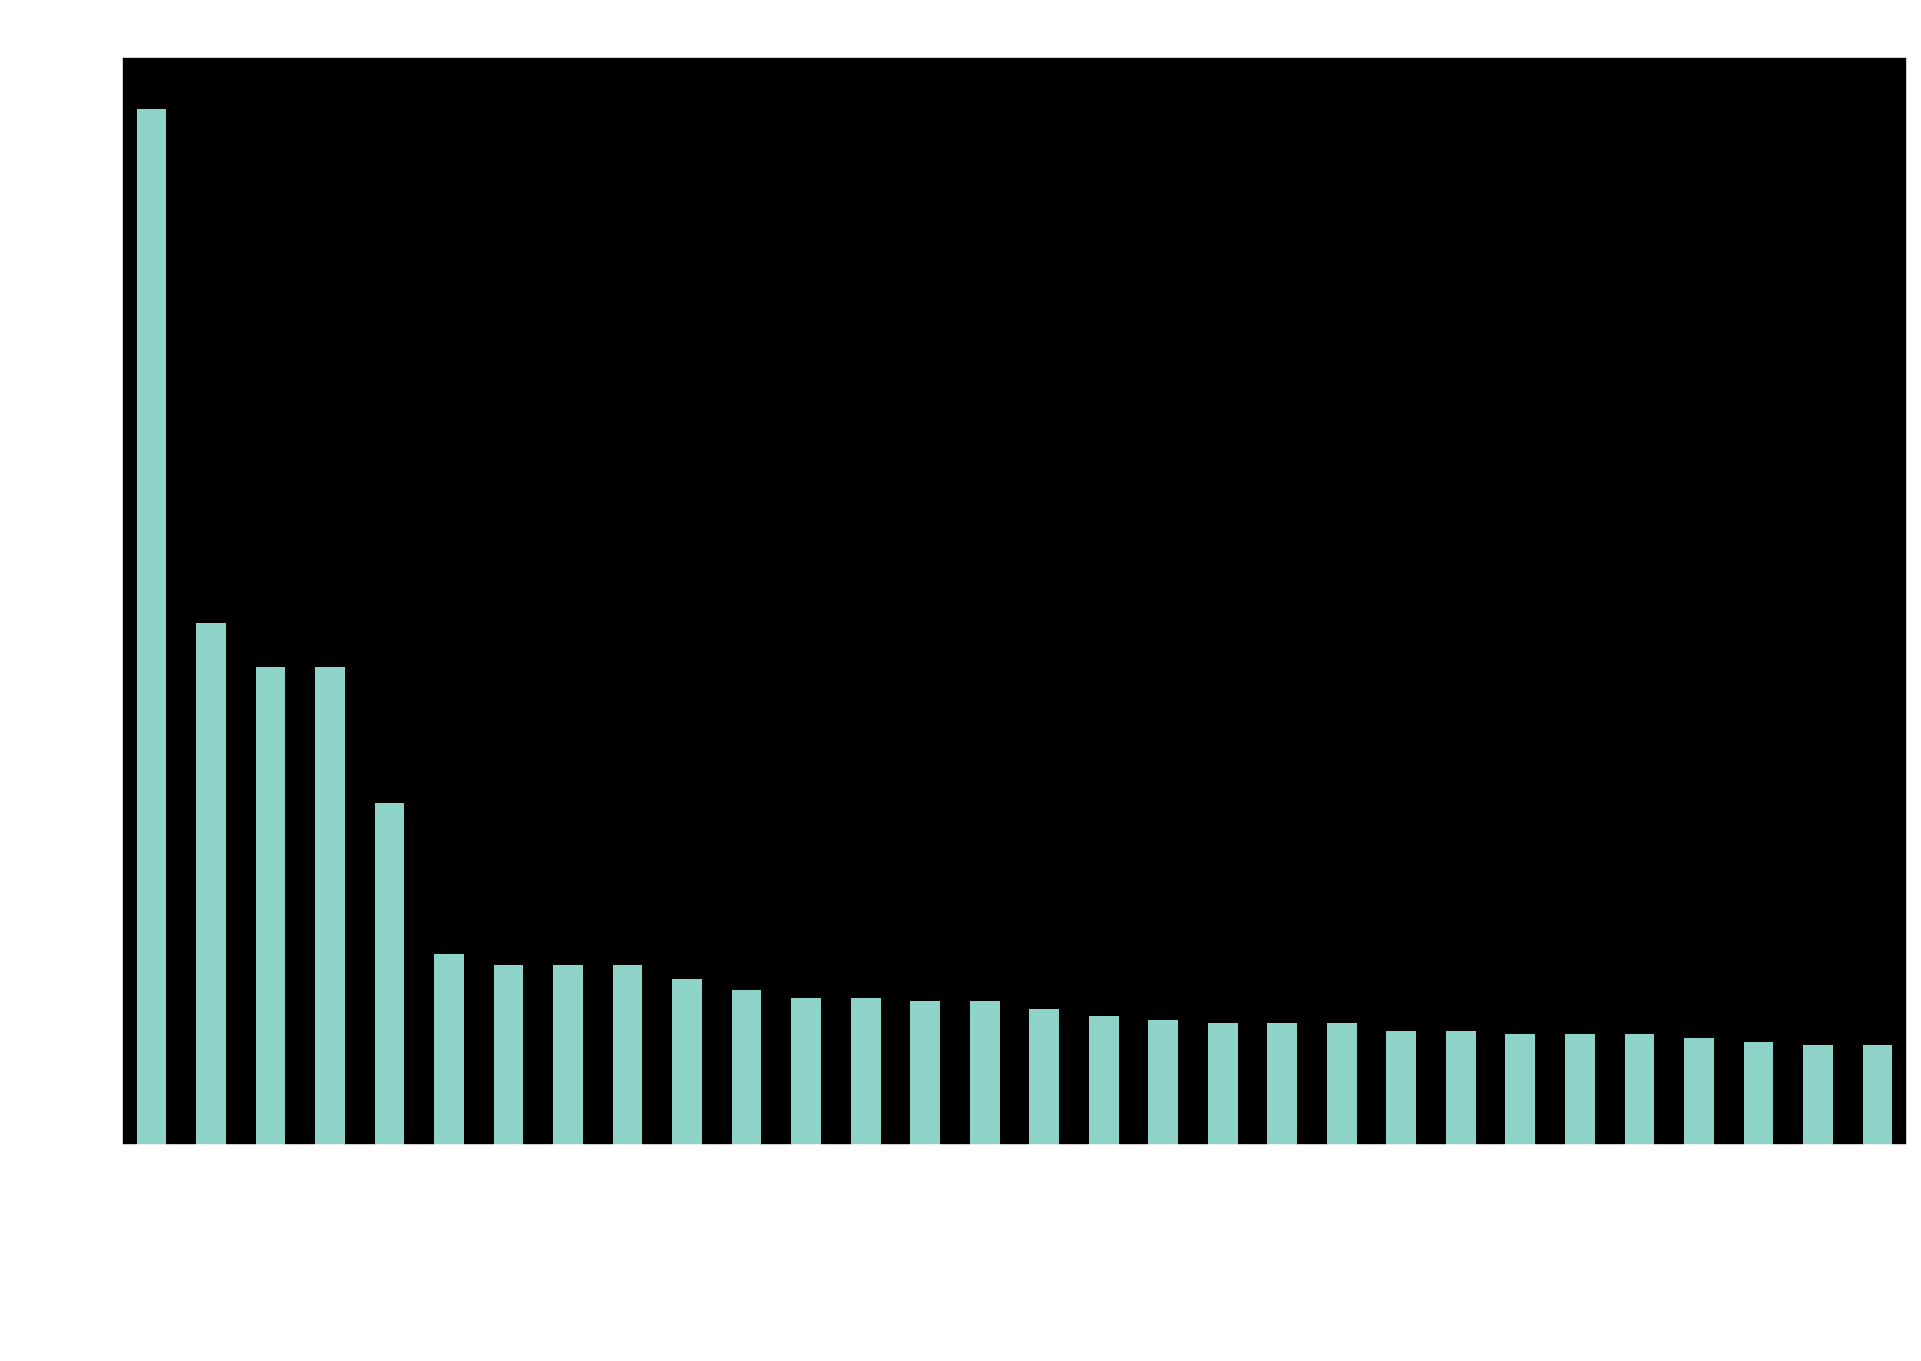

In [361]:
top_responsibility.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe responsibilities in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

In [362]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(MLjobs['Skills'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 75


In [0]:
skills = vect.get_feature_names()

In [0]:
resp = pd.DataFrame(vect.transform(MLjobs['Skills']).todense(),
                       columns=skills)

In [365]:
skills_count = resp.sum(axis=0)
skills_count.sort_values(ascending = False).head(30)

data                341
analysis            113
learning             80
data data            76
python               76
machine learning     76
machine              76
management           65
analysis data        59
analytics            58
data analysis        57
data mining          57
mining               57
science              55
java                 54
business             50
big                  47
big data             47
microsoft            46
development          40
hadoop               40
intelligence         39
data science         38
algorithms           32
software             31
statistics           28
mining data          25
artificial           25
engineering          24
sql                  24
dtype: int64

In [0]:
top_skills = skills_count.sort_values(ascending = False).head(30)

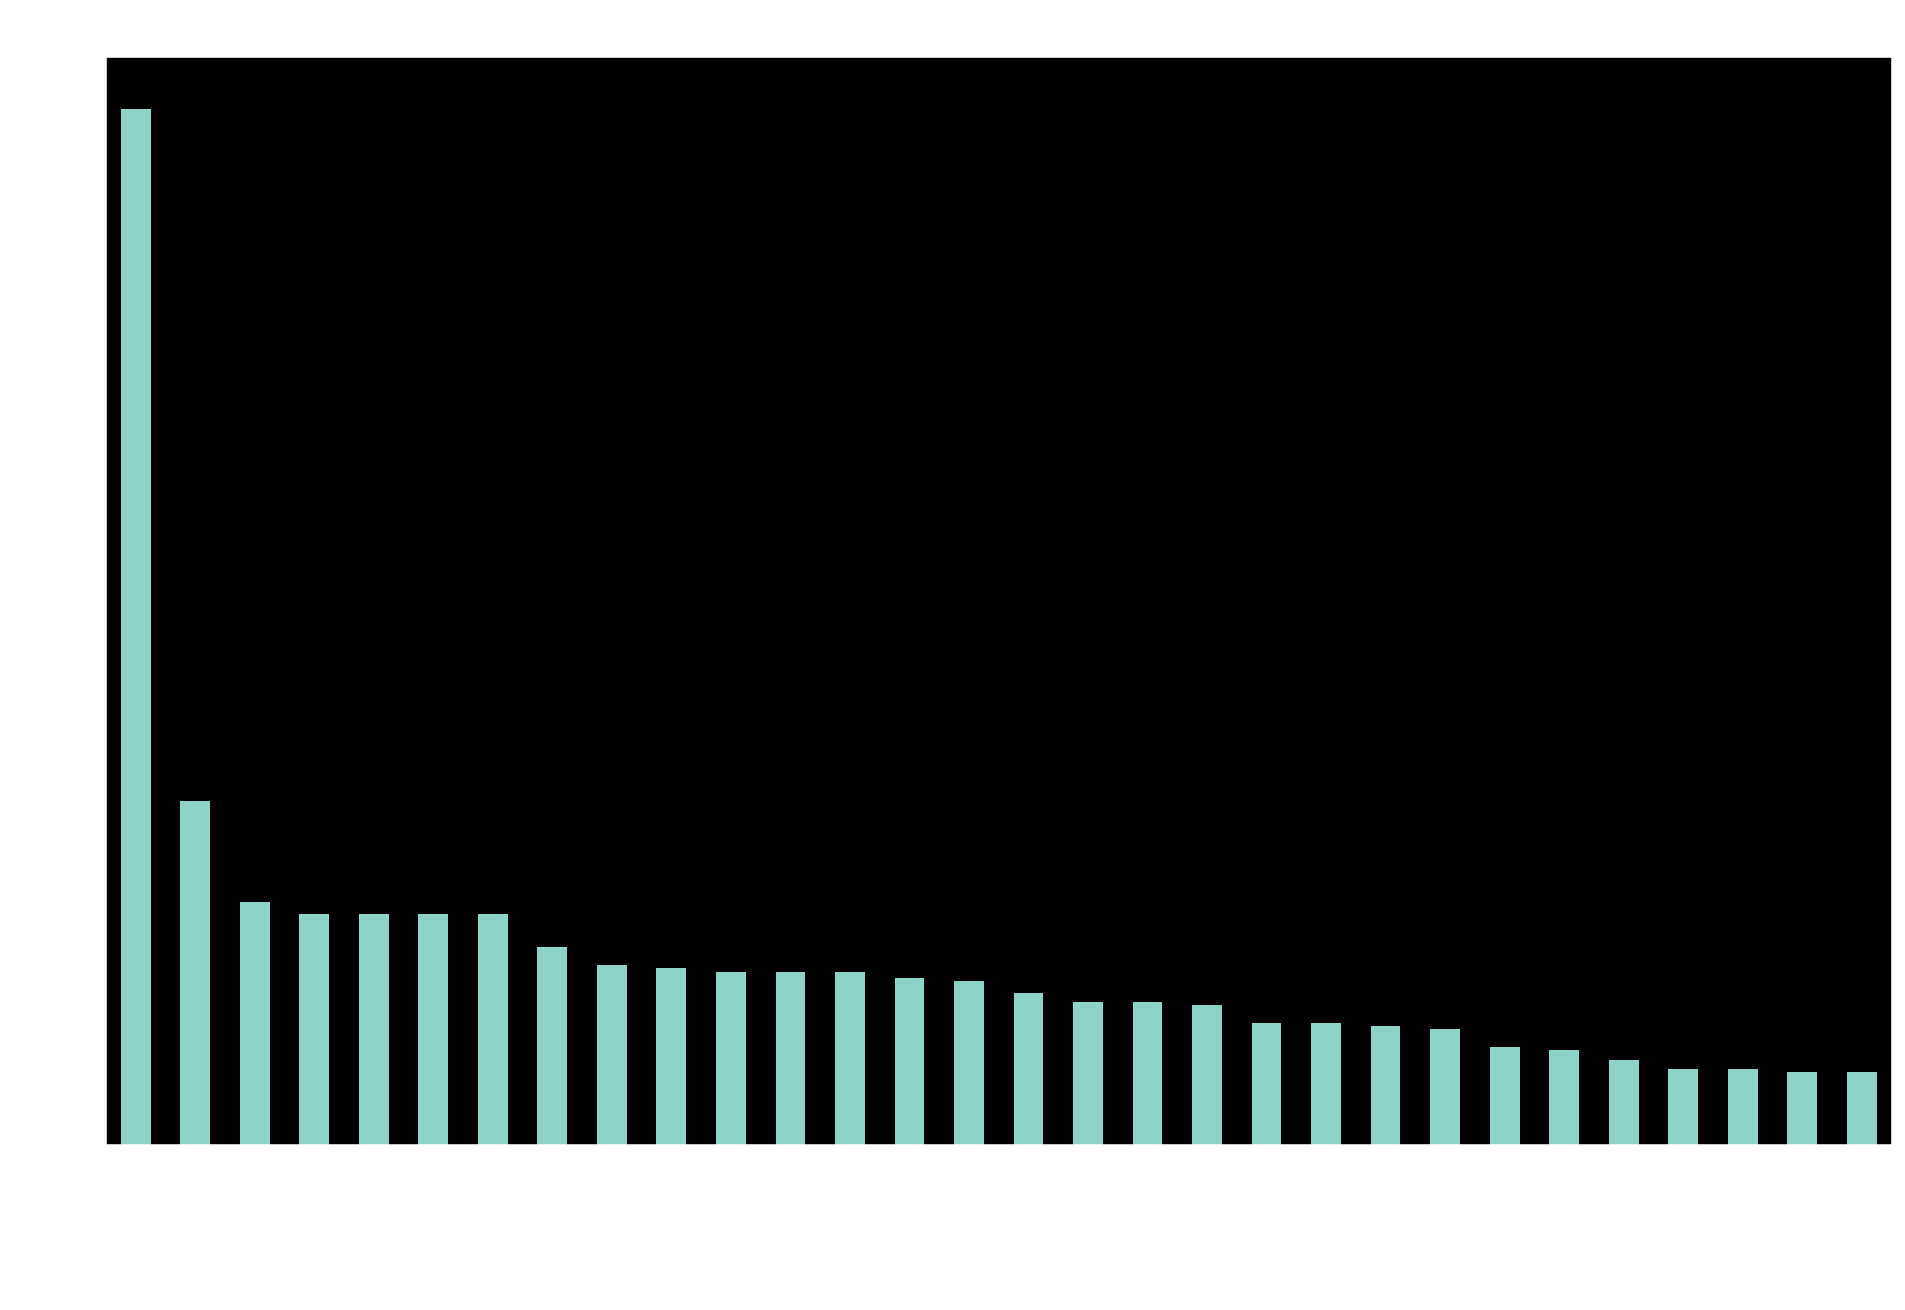

In [367]:
top_skills.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe skills in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()